In [142]:
import pandas as pd

file_path = r'C:\Users\hp\Downloads\car details v4.csv'
car_details = pd.read_csv(file_path)
car_details.head()

Make                            Model    Price  Year  Kilometer  \
0          Honda              Amaze 1.2 VX i-VTEC   505000  2017      87150   
1  Maruti Suzuki                  Swift DZire VDI   450000  2014      75000   
2        Hyundai             i10 Magna 1.2 Kappa2   220000  2011      67000   
3         Toyota                         Glanza G   799000  2019      37500   
4         Toyota  Innova 2.4 VX 7 STR [2016-2020]  1950000  2018      69000   

  Fuel Type Transmission   Location   Color   Owner Seller Type   Engine  \
0    Petrol       Manual       Pune    Grey   First   Corporate  1198 cc   
1    Diesel       Manual   Ludhiana   White  Second  Individual  1248 cc   
2    Petrol       Manual    Lucknow  Maroon   First  Individual  1197 cc   
3    Petrol       Manual  Mangalore     Red   First  Individual  1197 cc   
4    Diesel       Manual     Mumbai    Grey   First  Individual  2393 cc   

            Max Power              Max Torque Drivetrain  Length   Width  \
0   87 bhp @ 6000 rpm       109 Nm @ 4500 rpm        FWD  3990.0  1680.0   
1   74 bhp @ 4000 rpm       190 Nm @ 2000 rpm        FWD  3995.0  1695.0   
2   79 bhp @ 6000 rpm  112.7619 Nm @ 4000 rpm        FWD  3585.0  1595.0   
3   82 bhp @ 6000 rpm       113 Nm @ 4200 rpm        FWD  3995.0  1745.0   
4  148 bhp @ 3400 rpm       343 Nm @ 1400 rpm        RWD  4735.0  1830.0   

   Height  Seating Capacity  Fuel Tank Capacity  
0  1505.0               5.0                35.0  
1  1555.0               5.0                42.0  
2  1550.0               5.0                35.0  
3  1510.0               5.0                37.0  
4  1795.0               7.0                55.0

In [3]:
car_details.columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')

## Extracting all the numerical columns

In [4]:
numerical_cols = car_details[['Price','Year','Kilometer','Length','Width','Height','Seating Capacity','Fuel Tank Capacity']]

### Removing null values

In [5]:
numerical_cols = numerical_cols[~numerical_cols['Fuel Tank Capacity'].isnull()]

In [6]:
numerical_cols['Price'] = numerical_cols['Price'] / 100000

### Checking outliers in Year

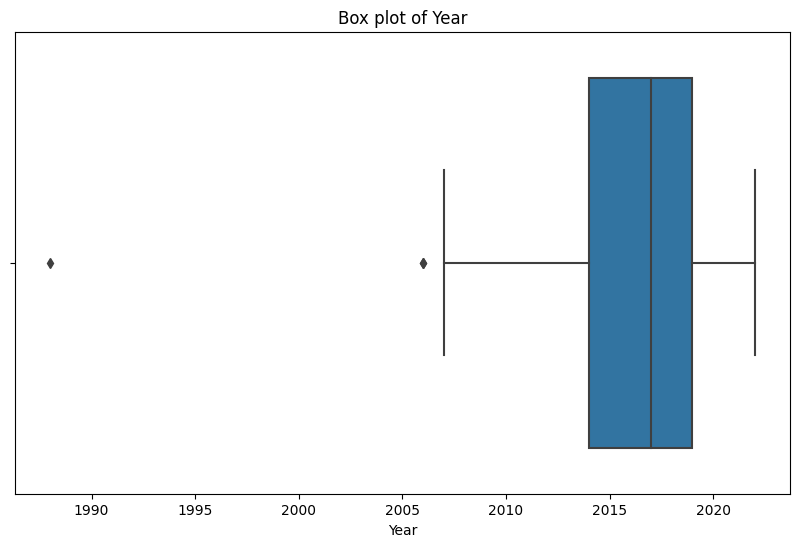

In [7]:
import seaborn as sns

import matplotlib.pyplot as plt

# Bar plot of 'Year'
plt.figure(figsize=(10, 6))
sns.boxplot(x=numerical_cols['Year'])
plt.xlabel('Year')
plt.title('Box plot of Year')
plt.show()

# Identifying outliers
Q1 = numerical_cols['Year'].quantile(0.25)
Q3 = numerical_cols['Year'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = numerical_cols[(numerical_cols['Year'] < lower_bound) | (numerical_cols['Year'] > upper_bound)]

In [8]:
numerical_cols = numerical_cols.drop(outliers.index)

In [9]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate residuals
residuals = y - y_pred

# Create residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=X['Year'], y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.title('Residual Plot for Year')
plt.show()

NameError: name 'y' is not defined

In [10]:
from datetime import datetime

# Get the current year
current_year = datetime.now().year

# Calculate the age
numerical_cols['Age'] = current_year - numerical_cols['Year']

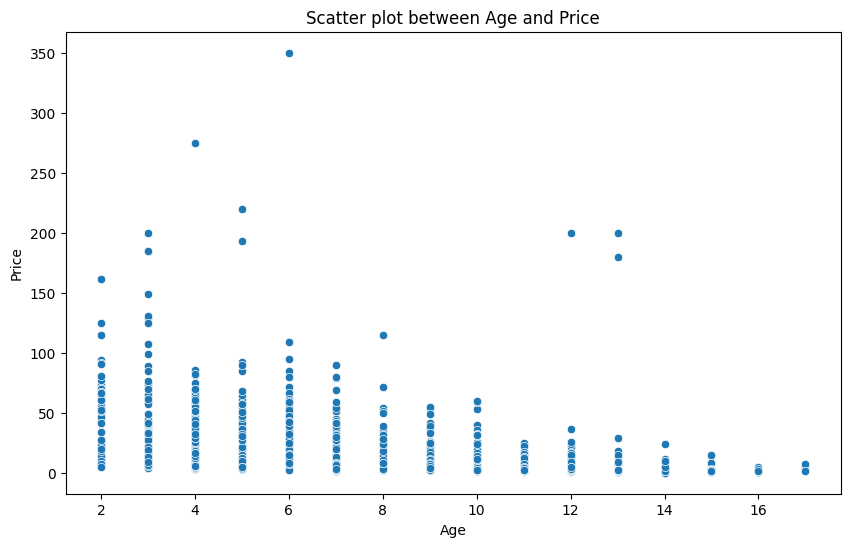

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Price', data=numerical_cols)
plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Scatter plot between Age and Price')
plt.show()

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import statsmodels.api as sm

# Define the dependent and independent variables
X_age = numerical_cols[['Age']]
y_price = numerical_cols['Price']

# Scale the independent variable
scaler = StandardScaler()
X_age_scaled = scaler.fit_transform(X_age)

# Add a constant to the scaled independent variable
X_age_scaled = sm.add_constant(X_age_scaled)

# Fit the linear regression model
model_age = sm.OLS(y_price, X_age_scaled).fit()

# Show the model results
print(model_age.summary())

# Get the p-values
p_values_age = model_age.pvalues
print("P-values:\n", p_values_age)

# Get the R-squared value
r_squared_age = model_age.rsquared
print("R-squared:", r_squared_age)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     232.0
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           1.44e-49
Time:                        01:40:10   Log-Likelihood:                -8818.5
No. Observations:                1943   AIC:                         1.764e+04
Df Residuals:                    1941   BIC:                         1.765e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8009      0.514     32.695      0.0

### Checking outliers in Price

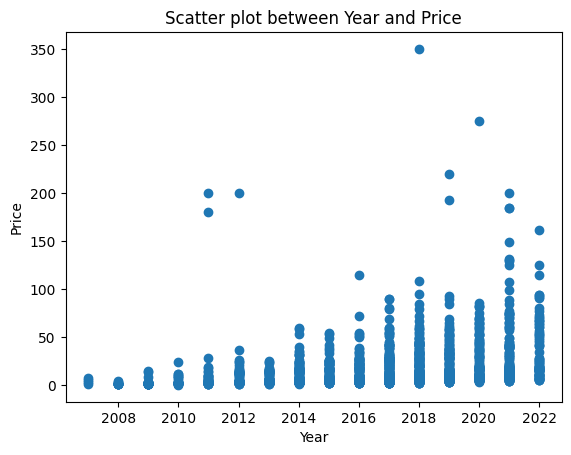

In [58]:
import matplotlib.pyplot as plt

plt.scatter(numerical_cols['Year'], numerical_cols['Price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Scatter plot between Year and Price')
plt.show()

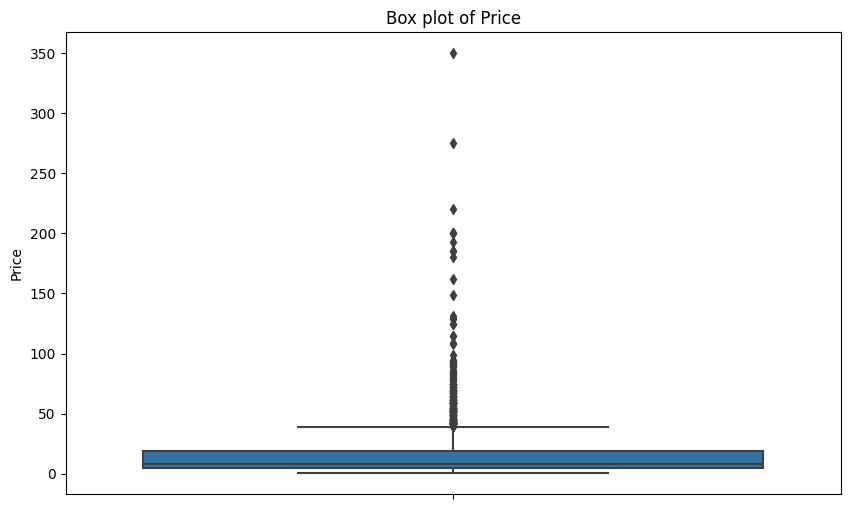

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=numerical_cols['Price'])
plt.ylabel('Price')
plt.title('Box plot of Price')
plt.show()

In [60]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Price'
Q1_price = numerical_cols['Price'].quantile(0.25)
Q3_price = numerical_cols['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Calculate the lower and upper bound for outliers
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Identify outliers in the 'Price' column
outliers_price = numerical_cols[(numerical_cols['Price'] < lower_bound_price) | (numerical_cols['Price'] > upper_bound_price)]
outliers_price.shape

(205, 11)

In [61]:
numerical_cols = numerical_cols[~numerical_cols.index.isin(outliers_price.index)]

### Checking outliers in Kilometer

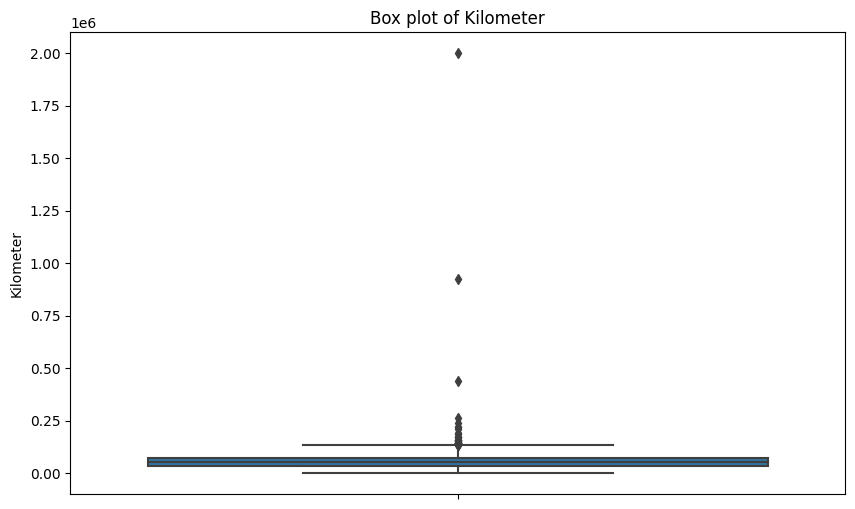

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=numerical_cols['Kilometer'])
plt.ylabel('Kilometer')
plt.title('Box plot of Kilometer')
plt.show()

In [63]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Kilometer'
Q1_km = numerical_cols['Kilometer'].quantile(0.25)
Q3_km = numerical_cols['Kilometer'].quantile(0.75)
IQR_km = Q3_km - Q1_km

# Calculate the lower and upper bound for outliers
lower_bound_km = Q1_km - 1.5 * IQR_km
upper_bound_km = Q3_km + 1.5 * IQR_km

# Identify outliers in the 'Kilometer' column
outliers_km = numerical_cols[(numerical_cols['Kilometer'] < lower_bound_km) | (numerical_cols['Kilometer'] > upper_bound_km)]

# Remove outliers from the dataframe
numerical_cols = numerical_cols[~numerical_cols.index.isin(outliers_km.index)]

In [72]:
# Calculate residuals for Kilometer
residuals_km = y_price - model_km.predict(X_km_scaled)

# Create residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=X_km['Kilometer'], y=residuals_km, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Kilometer')
plt.ylabel('Residuals')
plt.title('Residual Plot for Kilometer')
plt.show()

NameError: name 'model_km' is not defined

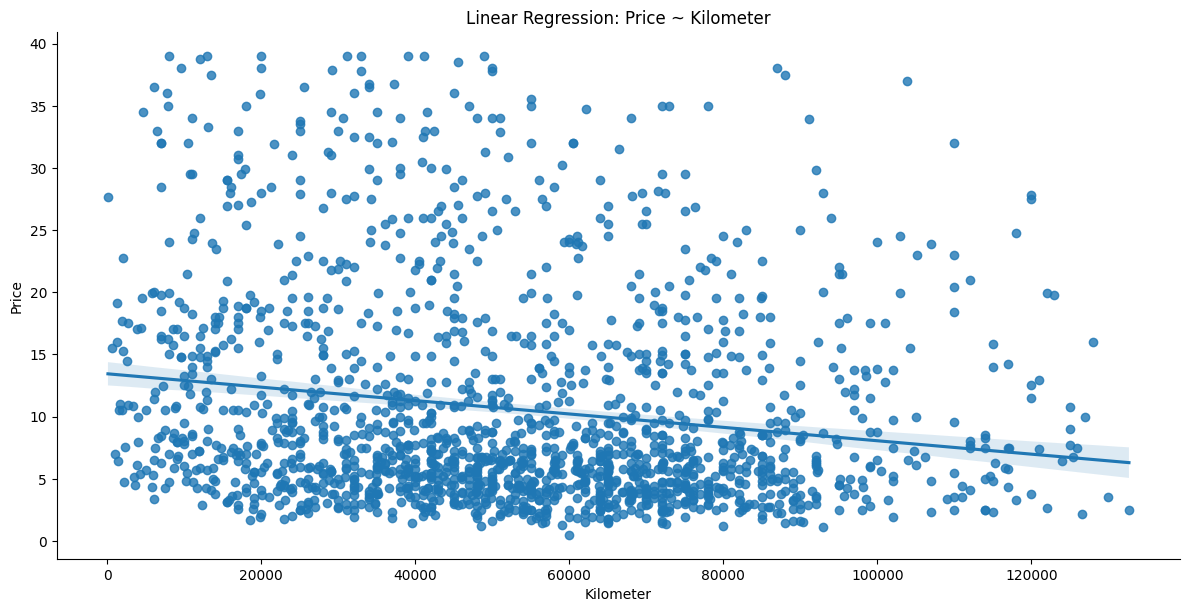

In [65]:
sns.lmplot(x='Kilometer', y='Price', data=numerical_cols, aspect=2, height=6)
plt.xlabel('Kilometer')
plt.ylabel('Price')
plt.title('Linear Regression: Price ~ Kilometer')
plt.show()

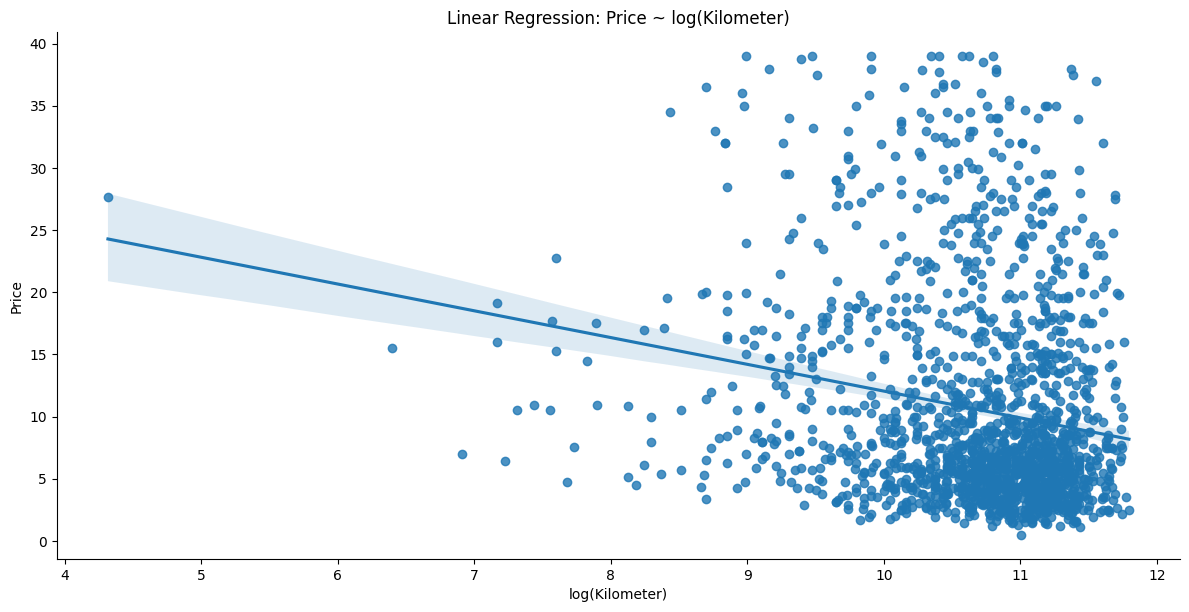

In [66]:
import numpy as np

# Add a new column for log(Kilometer)
numerical_cols['log_Kilometer'] = np.log(numerical_cols['Kilometer'])

# Plot the linear regression
sns.lmplot(x='log_Kilometer', y='Price', data=numerical_cols, aspect=2, height=6)
plt.xlabel('log(Kilometer)')
plt.ylabel('Price')
plt.title('Linear Regression: Price ~ log(Kilometer)')
plt.show()

### Checking outliers in Length

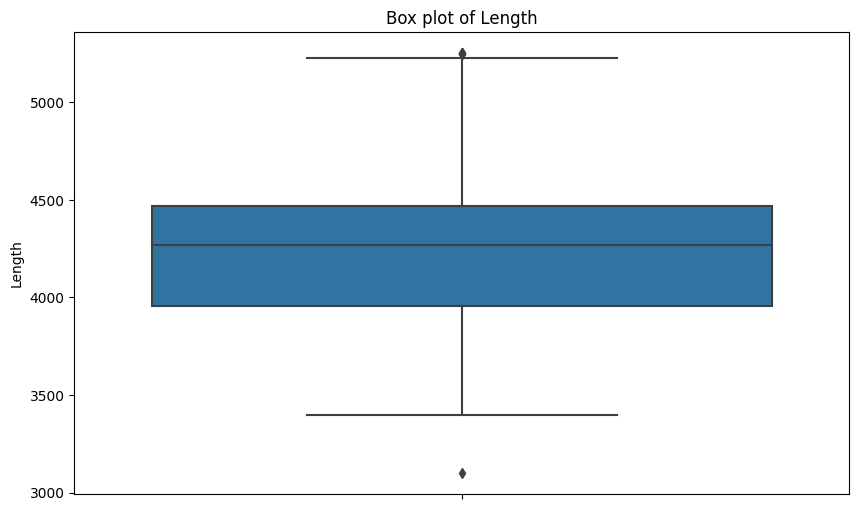

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=numerical_cols['Length'])
plt.ylabel('Length')
plt.title('Box plot of Length')
plt.show()

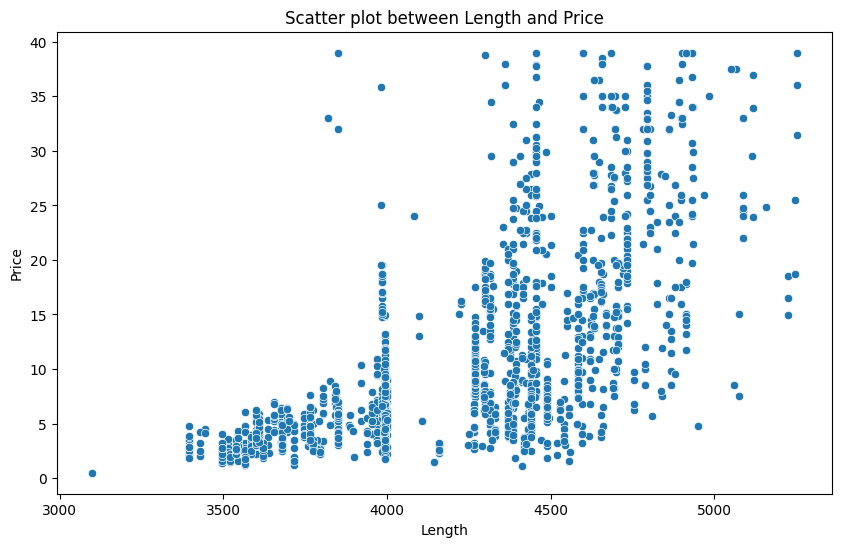

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Length', y='Price', data=numerical_cols)
plt.xlabel('Length')
plt.ylabel('Price')
plt.title('Scatter plot between Length and Price')
plt.show()

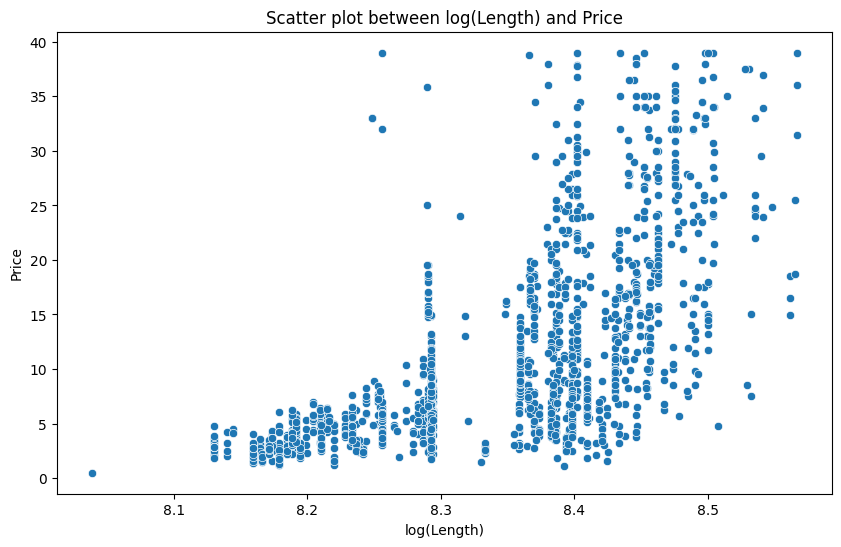

In [69]:
# Add a new column for log(Length)
numerical_cols['log_Length'] = np.log(numerical_cols['Length'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_Length', y='Price', data=numerical_cols)
plt.xlabel('log(Length)')
plt.ylabel('Price')
plt.title('Scatter plot between log(Length) and Price')
plt.show()

In [73]:
# Calculate residuals for Length
residuals_length = y_price - model_length.predict(X_length_scaled)

# Create residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=X_length['Length'], y=residuals_length, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Length')
plt.ylabel('Residuals')
plt.title('Residual Plot for Length')
plt.show()

NameError: name 'model_length' is not defined

### Checking outliers in Height

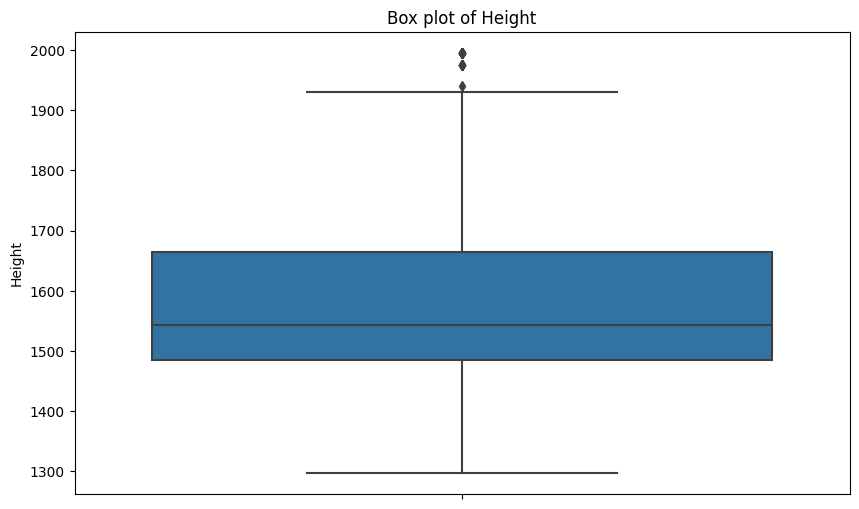

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=numerical_cols['Height'])
plt.ylabel('Height')
plt.title('Box plot of Height')
plt.show()

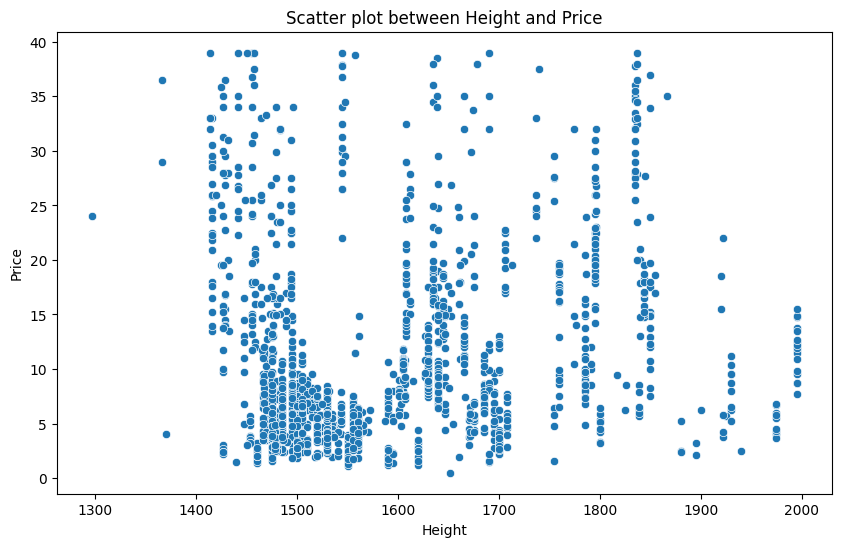

In [74]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height', y='Price', data=numerical_cols)
plt.xlabel('Height')
plt.ylabel('Price')
plt.title('Scatter plot between Height and Price')
plt.show()

In [75]:
# Calculate residuals for Height
residuals_height = y_price - model_height.predict(X_height_scaled)

# Create residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=X_height['Height'], y=residuals_height, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Height')
plt.ylabel('Residuals')
plt.title('Residual Plot for Height')
plt.show()

NameError: name 'model_height' is not defined

### Checking outliers in Width

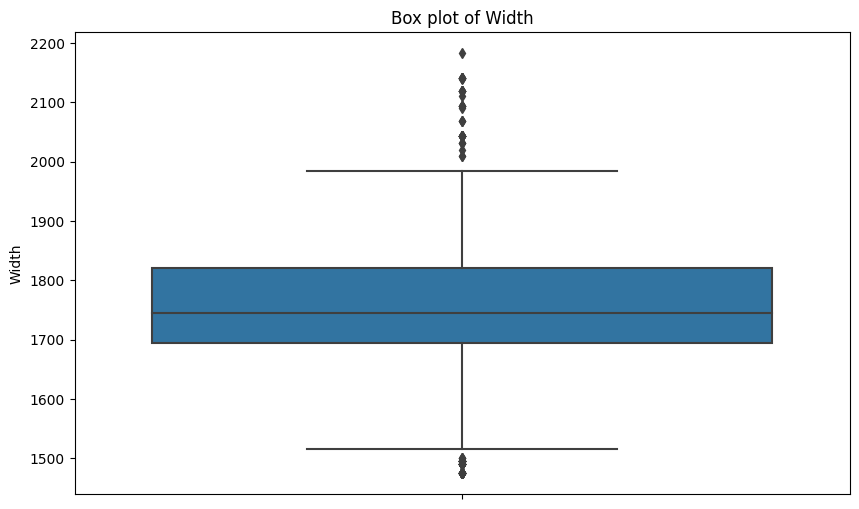

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=numerical_cols['Width'])
plt.ylabel('Width')
plt.title('Box plot of Width')
plt.show()

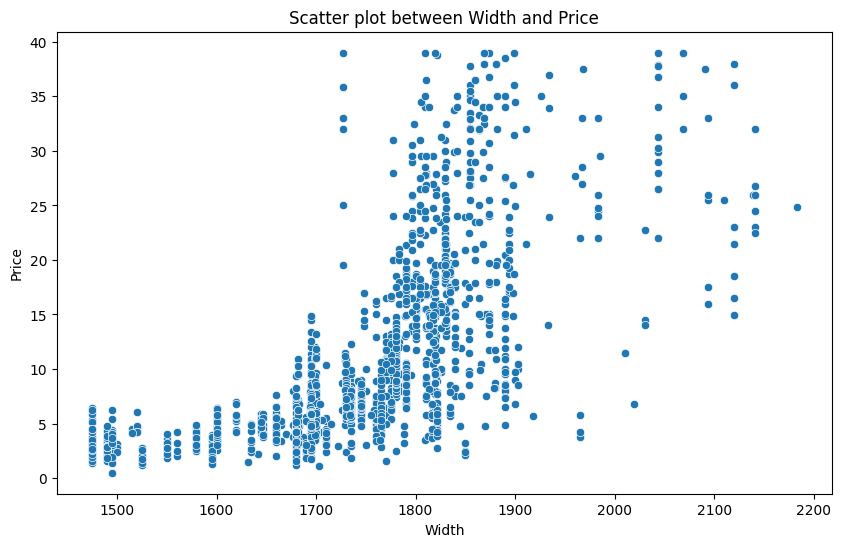

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Width', y='Price', data=numerical_cols)
plt.xlabel('Width')
plt.ylabel('Price')
plt.title('Scatter plot between Width and Price')
plt.show()

In [78]:
# Calculate residuals for Width
residuals_width = y_price - model_width.predict(X_width_scaled)

# Create residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=X_width['Width'], y=residuals_width, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Width')
plt.ylabel('Residuals')
plt.title('Residual Plot for Width')
plt.show()

NameError: name 'model_width' is not defined

### Checking outliers in Fuel Tank Capacity

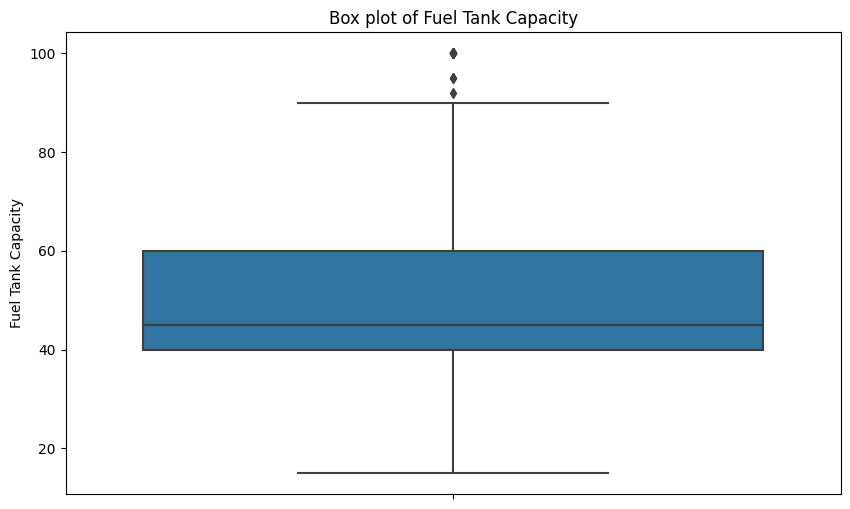

In [79]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=numerical_cols['Fuel Tank Capacity'])
plt.ylabel('Fuel Tank Capacity')
plt.title('Box plot of Fuel Tank Capacity')
plt.show()

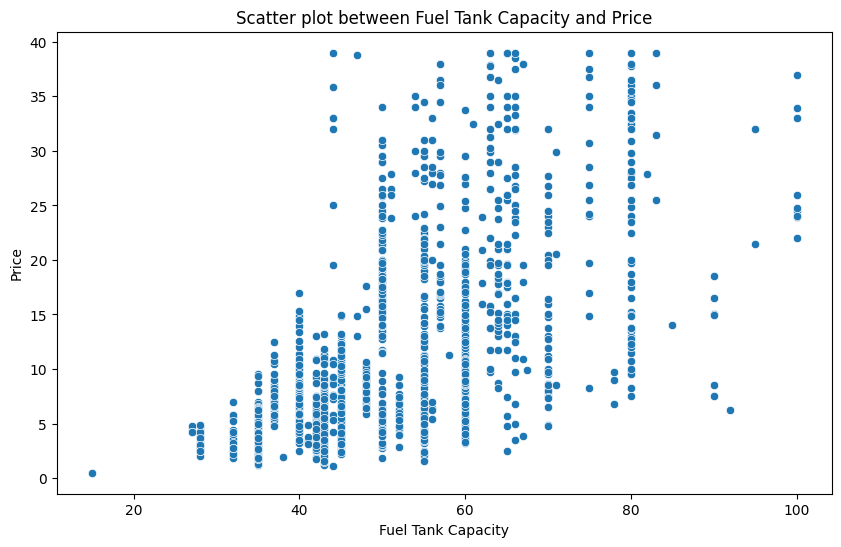

In [80]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fuel Tank Capacity', y='Price', data=numerical_cols)
plt.xlabel('Fuel Tank Capacity')
plt.ylabel('Price')
plt.title('Scatter plot between Fuel Tank Capacity and Price')
plt.show()

In [81]:
# Calculate residuals for Fuel Tank Capacity
residuals_fuel = y_price - model_fuel.predict(X_fuel_scaled)

# Create residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=X_fuel['Fuel Tank Capacity'], y=residuals_fuel, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fuel Tank Capacity')
plt.ylabel('Residuals')
plt.title('Residual Plot for Fuel Tank Capacity')
plt.show()

NameError: name 'model_fuel' is not defined

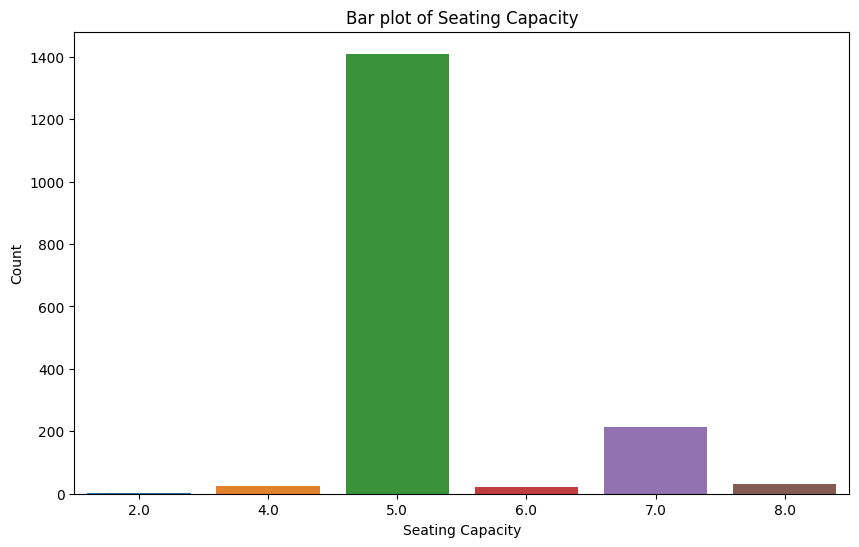

In [82]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Seating Capacity', data=numerical_cols)
plt.xlabel('Seating Capacity')
plt.ylabel('Count')
plt.title('Bar plot of Seating Capacity')
plt.show()

In [83]:
seating_capacity_counts = numerical_cols['Seating Capacity'].value_counts()
print(seating_capacity_counts)

5.0    1410
7.0     213
8.0      32
4.0      25
6.0      20
2.0       1
Name: Seating Capacity, dtype: int64


In [84]:
numerical_cols = numerical_cols[numerical_cols['Seating Capacity'] != 2]

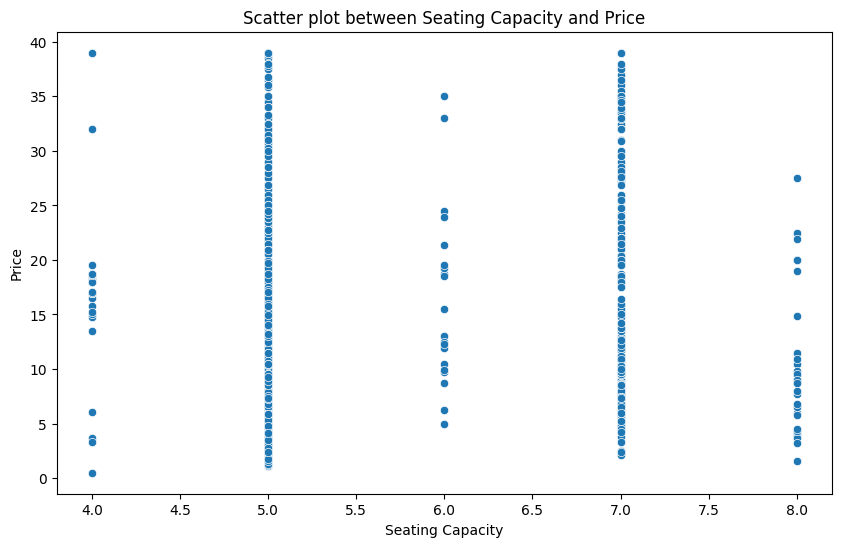

In [85]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Seating Capacity', y='Price', data=numerical_cols)
plt.xlabel('Seating Capacity')
plt.ylabel('Price')
plt.title('Scatter plot between Seating Capacity and Price')
plt.show()

# Price vs Year

In [86]:
# Define the dependent and independent variables
X = numerical_cols[['Year']]
y = numerical_cols['Price']

from statsmodels.tools.tools import add_constant
X1 = add_constant(X)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X= scaler.fit_transform(X)
scaled_X= pd.DataFrame(scaled_X, columns=X.columns)

from sklearn.linear_model import LinearRegression
lm= LinearRegression()
model = lm.fit(scaled_X, y)
y_pred= model.predict(scaled_X)
print(pd.DataFrame(model.coef_, scaled_X.columns, columns=['Coefficients']))

      Coefficients
Year      3.081601


In [87]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Define the dependent and independent variables
X = numerical_cols[['Year']]
y = numerical_cols['Price']

# Scale the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add a constant to the scaled independent variables
X_scaled = sm.add_constant(X_scaled)

# Fit the linear regression model
model = sm.OLS(y, X_scaled).fit()

# Get the p-values
p_values = model.pvalues
print("P-values:\n", p_values)

# Get the R-squared and adjusted R-squared values
r_squared = model.rsquared
adjusted_r_squared = model.rsquared_adj
print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)

P-values:
 const    0.000000e+00
x1       6.328267e-53
dtype: float64
R-squared: 0.12900948970059156
Adjusted R-squared: 0.12849653887002654


# Price vs Kilometer 

In [89]:
from sklearn.preprocessing import StandardScaler

# Define the dependent and independent variables
X_km = numerical_cols[['Kilometer']]
y_price = numerical_cols['Price']

# Scale the independent variable
scaler = StandardScaler()
X_km_scaled = scaler.fit_transform(X_km)

# Add a constant to the scaled independent variable
X_km_scaled = sm.add_constant(X_km_scaled)

# Fit the linear regression model
model_km = sm.OLS(y_price, X_km_scaled).fit()

# Show the model results
print(model_km.summary())

# Get the p-values
p_values_km = model_km.pvalues
print("P-values:\n", p_values_km)

# Get the R-squared value
r_squared_km = model_km.rsquared
print("R-squared:", r_squared_km)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     50.93
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           1.41e-12
Time:                        01:42:27   Log-Likelihood:                -6041.0
No. Observations:                1700   AIC:                         1.209e+04
Df Residuals:                    1698   BIC:                         1.210e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5959      0.205     51.648      0.0

# Price vs Length - Linear

In [90]:
# Define the dependent and independent variables
X_length = numerical_cols[['Length']]
y_price = numerical_cols['Price']

# Scale the independent variable
scaler = StandardScaler()
X_length_scaled = scaler.fit_transform(X_length)

# Add a constant to the scaled independent variable
X_length_scaled = sm.add_constant(X_length_scaled)

# Fit the linear regression model
model_length = sm.OLS(y_price, X_length_scaled).fit()

# Show the model results
print(model_length.summary())

# Get the p-values
p_values_length = model_length.pvalues
print("P-values:\n", p_values_length)

# Get the R-squared value
r_squared_length = model_length.rsquared
print("R-squared:", r_squared_length)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     1297.
Date:                Sun, 10 Nov 2024   Prob (F-statistic):          1.70e-211
Time:                        01:42:38   Log-Likelihood:                -5583.8
No. Observations:                1700   AIC:                         1.117e+04
Df Residuals:                    1698   BIC:                         1.118e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5959      0.157     67.588      0.0

# Price vs Length

In [91]:
# Initialize lists to store the results
r_squared_list = []
adj_r_squared_list = []
mse_list = []

# Loop through degrees 2 to 11
for degree in range(2, 12):
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X_length)
    
    # Fit the polynomial regression model
    model_poly = LinearRegression()
    model_poly.fit(X_poly, y_price)
    
    # Predict the prices
    y_poly_pred = model_poly.predict(X_poly)
    
    # Calculate the mean squared error
    mse = mean_squared_error(y_price, y_poly_pred)
    
    # Calculate R-squared and adjusted R-squared
    r_squared = model_poly.score(X_poly, y_price)
    n = len(y_price)
    p = X_poly.shape[1] - 1
    adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
    
    # Append the results to the lists
    r_squared_list.append(r_squared)
    adj_r_squared_list.append(adj_r_squared)
    mse_list.append(mse)

# Print the results
for degree in range(2, 12):
    print(f"Degree {degree}: R-squared = {r_squared_list[degree-2]:.4f}, Adjusted R-squared = {adj_r_squared_list[degree-2]:.4f}, MSE = {mse_list[degree-2]:.4f}")

Degree 2: R-squared = 0.4578, Adjusted R-squared = 0.4572, MSE = 39.9098
Degree 3: R-squared = 0.4579, Adjusted R-squared = 0.4569, MSE = 39.9029
Degree 4: R-squared = 0.4633, Adjusted R-squared = 0.4620, MSE = 39.5082
Degree 5: R-squared = 0.4646, Adjusted R-squared = 0.4630, MSE = 39.4092
Degree 6: R-squared = 0.4658, Adjusted R-squared = 0.4639, MSE = 39.3247
Degree 7: R-squared = 0.4667, Adjusted R-squared = 0.4645, MSE = 39.2577
Degree 8: R-squared = 0.4673, Adjusted R-squared = 0.4648, MSE = 39.2099
Degree 9: R-squared = 0.4677, Adjusted R-squared = 0.4649, MSE = 39.1806
Degree 10: R-squared = 0.4679, Adjusted R-squared = 0.4647, MSE = 39.1677
Degree 11: R-squared = 0.4679, Adjusted R-squared = 0.4644, MSE = 39.1689


# Price vs Height

In [92]:
# Define the dependent and independent variables
X_height = numerical_cols[['Height']]
y_price = numerical_cols['Price']

# Scale the independent variable
scaler = StandardScaler()
X_height_scaled = scaler.fit_transform(X_height)

# Add a constant to the scaled independent variable
X_height_scaled = sm.add_constant(X_height_scaled)

# Fit the linear regression model
model_height = sm.OLS(y_price, X_height_scaled).fit()

# Show the model results
print(model_height.summary())

# Get the p-values
p_values_height = model_height.pvalues
print("P-values:\n", p_values_height)

# Get the R-squared value
r_squared_height = model_height.rsquared
print("R-squared:", r_squared_height)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     58.49
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           3.39e-14
Time:                        01:42:49   Log-Likelihood:                -6037.4
No. Observations:                1700   AIC:                         1.208e+04
Df Residuals:                    1698   BIC:                         1.209e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5959      0.205     51.760      0.0

# Prics vs Width

In [93]:
# Define the dependent and independent variables
X_width = numerical_cols[['Width']]
y_price = numerical_cols['Price']

# Scale the independent variable
scaler = StandardScaler()
X_width_scaled = scaler.fit_transform(X_width)

# Add a constant to the scaled independent variable
X_width_scaled = sm.add_constant(X_width_scaled)

# Fit the linear regression model
model_width = sm.OLS(y_price, X_width_scaled).fit()

# Show the model results
print(model_width.summary())

# Get the p-values
p_values_width = model_width.pvalues
print("P-values:\n", p_values_width)

# Get the R-squared value
r_squared_width = model_width.rsquared
print("R-squared:", r_squared_width)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     1452.
Date:                Sun, 10 Nov 2024   Prob (F-statistic):          3.54e-230
Time:                        01:42:50   Log-Likelihood:                -5540.8
No. Observations:                1700   AIC:                         1.109e+04
Df Residuals:                    1698   BIC:                         1.110e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5959      0.153     69.320      0.0

In [94]:
print("P-values for the width model:\n", p_values_width)

P-values for the width model:
 const     0.000000e+00
x1       3.542252e-230
dtype: float64


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalC

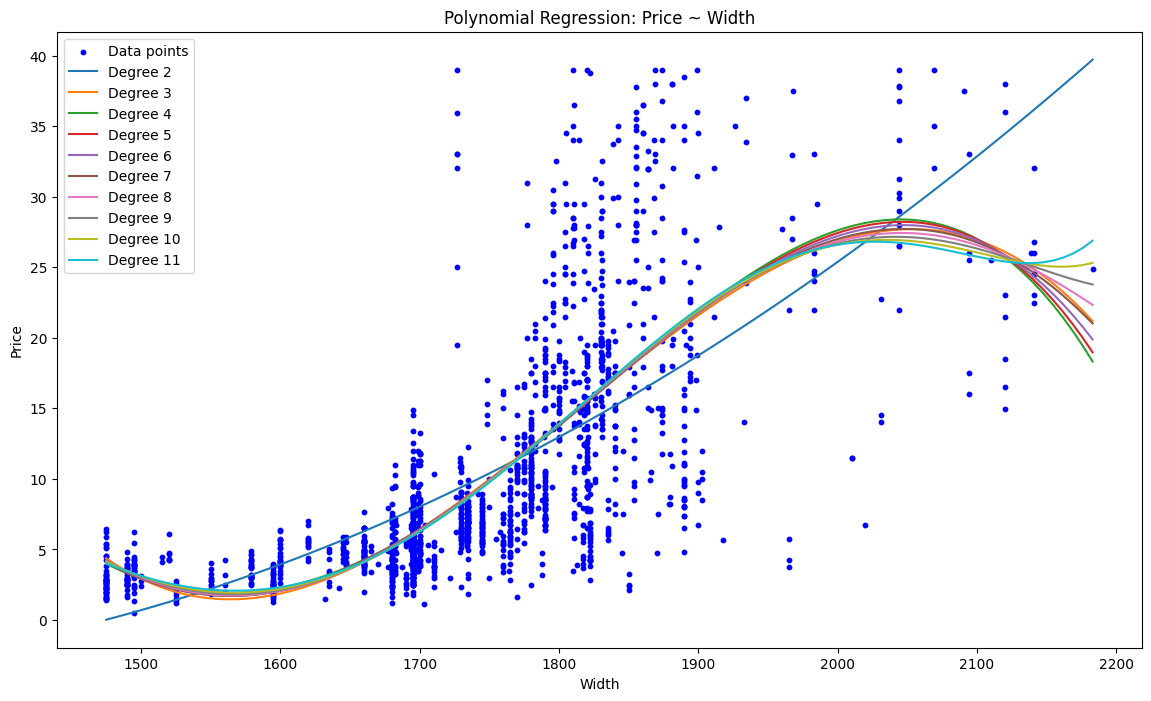

Degree 2: R-squared = 0.4762, Adjusted R-squared = 0.4756, MSE = 38.5552
Degree 3: R-squared = 0.5366, Adjusted R-squared = 0.5358, MSE = 34.1088
Degree 4: R-squared = 0.5373, Adjusted R-squared = 0.5362, MSE = 34.0592
Degree 5: R-squared = 0.5372, Adjusted R-squared = 0.5358, MSE = 34.0661
Degree 6: R-squared = 0.5374, Adjusted R-squared = 0.5358, MSE = 34.0520
Degree 7: R-squared = 0.5378, Adjusted R-squared = 0.5359, MSE = 34.0204
Degree 8: R-squared = 0.5384, Adjusted R-squared = 0.5362, MSE = 33.9772
Degree 9: R-squared = 0.5391, Adjusted R-squared = 0.5366, MSE = 33.9297
Degree 10: R-squared = 0.5397, Adjusted R-squared = 0.5369, MSE = 33.8855
Degree 11: R-squared = 0.5401, Adjusted R-squared = 0.5371, MSE = 33.8519


In [95]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

import matplotlib.pyplot as plt

# Define the dependent and independent variables
X_width = numerical_cols[['Width']]
y_price = numerical_cols['Price']

# Initialize lists to store the results
r_squared_list = []
adj_r_squared_list = []
mse_list = []

# Plot the data points
plt.figure(figsize=(14, 8))
plt.scatter(X_width, y_price, color='blue', s=10, label='Data points')

# Loop through degrees 2 to 11
for degree in range(2, 12):
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X_width)
    
    # Fit the polynomial regression model
    model_poly = LinearRegression()
    model_poly.fit(X_poly, y_price)
    
    # Predict the prices
    y_poly_pred = model_poly.predict(X_poly)
    
    # Calculate the mean squared error
    mse = mean_squared_error(y_price, y_poly_pred)
    
    # Calculate R-squared and adjusted R-squared
    r_squared = model_poly.score(X_poly, y_price)
    n = len(y_price)
    p = X_poly.shape[1] - 1
    adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
    
    # Append the results to the lists
    r_squared_list.append(r_squared)
    adj_r_squared_list.append(adj_r_squared)
    mse_list.append(mse)
    
    # Plot the polynomial regression line
    X_range = np.linspace(X_width.min(), X_width.max(), 100).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)
    y_range_pred = model_poly.predict(X_range_poly)
    plt.plot(X_range, y_range_pred, label=f'Degree {degree}')

# Add labels and legend
plt.xlabel('Width')
plt.ylabel('Price')
plt.title('Polynomial Regression: Price ~ Width')
plt.legend()
plt.show()

# Print the results
for degree in range(2, 12):
    print(f"Degree {degree}: R-squared = {r_squared_list[degree-2]:.4f}, Adjusted R-squared = {adj_r_squared_list[degree-2]:.4f}, MSE = {mse_list[degree-2]:.4f}")

# Price vs Fuel tank capacity

In [96]:
# Define the dependent and independent variables
X_fuel = numerical_cols[['Fuel Tank Capacity']]
y_price = numerical_cols['Price']

# Scale the independent variable
scaler = StandardScaler()
X_fuel_scaled = scaler.fit_transform(X_fuel)

# Add a constant to the scaled independent variable
X_fuel_scaled = sm.add_constant(X_fuel_scaled)

# Fit the linear regression model
model_fuel = sm.OLS(y_price, X_fuel_scaled).fit()

# Show the model results
print(model_fuel.summary())

# Get the p-values
p_values_fuel = model_fuel.pvalues
print("P-values:\n", p_values_fuel)

# Get the R-squared value
r_squared_fuel = model_fuel.rsquared
print("R-squared:", r_squared_fuel)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     1256.
Date:                Sun, 10 Nov 2024   Prob (F-statistic):          2.27e-206
Time:                        01:42:58   Log-Likelihood:                -5595.6
No. Observations:                1700   AIC:                         1.120e+04
Df Residuals:                    1698   BIC:                         1.121e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5959      0.158     67.120      0.0

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalC

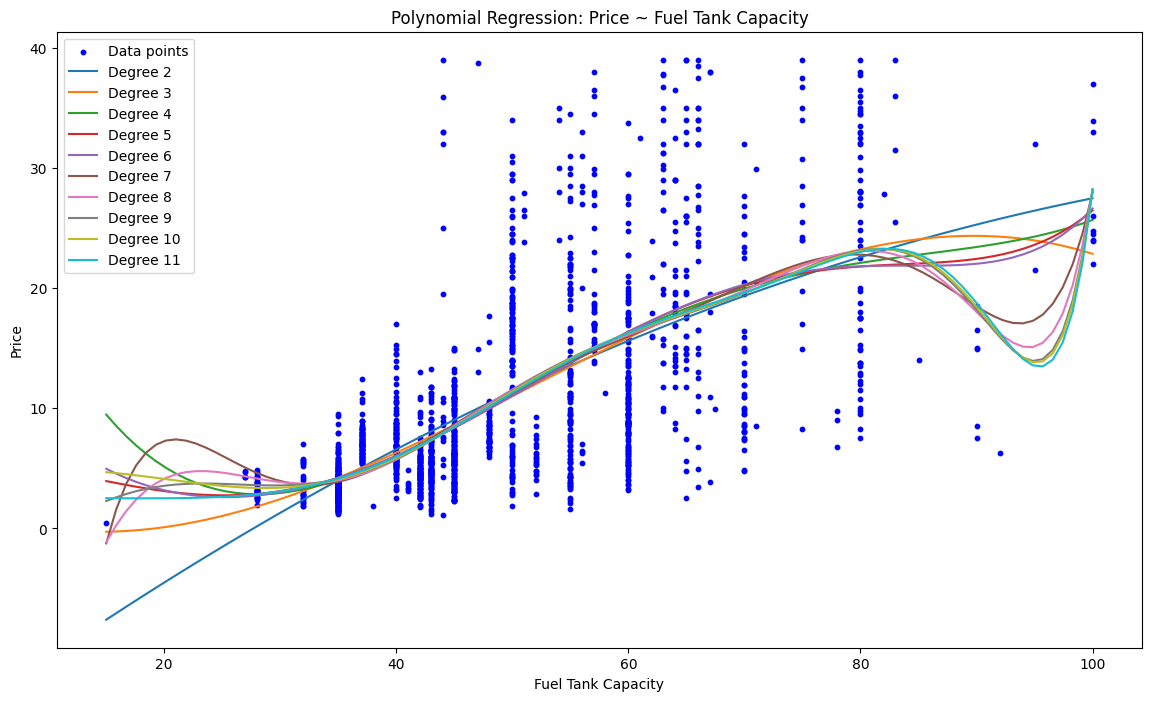

Degree 2: R-squared = 0.4305, Adjusted R-squared = 0.4298, MSE = 41.9224
Degree 3: R-squared = 0.4354, Adjusted R-squared = 0.4344, MSE = 41.5599
Degree 4: R-squared = 0.4386, Adjusted R-squared = 0.4373, MSE = 41.3239
Degree 5: R-squared = 0.4393, Adjusted R-squared = 0.4376, MSE = 41.2754
Degree 6: R-squared = 0.4393, Adjusted R-squared = 0.4373, MSE = 41.2721
Degree 7: R-squared = 0.4440, Adjusted R-squared = 0.4417, MSE = 40.9287
Degree 8: R-squared = 0.4449, Adjusted R-squared = 0.4423, MSE = 40.8586
Degree 9: R-squared = 0.4445, Adjusted R-squared = 0.4416, MSE = 40.8864
Degree 10: R-squared = 0.4440, Adjusted R-squared = 0.4407, MSE = 40.9279
Degree 11: R-squared = 0.4432, Adjusted R-squared = 0.4396, MSE = 40.9821


In [97]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the dependent and independent variables
X_fuel = numerical_cols[['Fuel Tank Capacity']]
y_price = numerical_cols['Price']

# Initialize lists to store the results
r_squared_list = []
adj_r_squared_list = []
mse_list = []

# Plot the data points
plt.figure(figsize=(14, 8))
plt.scatter(X_fuel, y_price, color='blue', s=10, label='Data points')

# Loop through degrees 2 to 11
for degree in range(2, 12):
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X_fuel)
    
    # Fit the polynomial regression model
    model_poly = LinearRegression()
    model_poly.fit(X_poly, y_price)
    
    # Predict the prices
    y_poly_pred = model_poly.predict(X_poly)
    
    # Calculate the mean squared error
    mse = mean_squared_error(y_price, y_poly_pred)
    
    # Calculate R-squared and adjusted R-squared
    r_squared = model_poly.score(X_poly, y_price)
    n = len(y_price)
    p = X_poly.shape[1] - 1
    adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
    
    # Append the results to the lists
    r_squared_list.append(r_squared)
    adj_r_squared_list.append(adj_r_squared)
    mse_list.append(mse)
    
    # Plot the polynomial regression line
    X_range = np.linspace(X_fuel.min(), X_fuel.max(), 100).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)
    y_range_pred = model_poly.predict(X_range_poly)
    plt.plot(X_range, y_range_pred, label=f'Degree {degree}')

# Add labels and legend
plt.xlabel('Fuel Tank Capacity')
plt.ylabel('Price')
plt.title('Polynomial Regression: Price ~ Fuel Tank Capacity')
plt.legend()
plt.show()

# Print the results
for degree in range(2, 12):
    print(f"Degree {degree}: R-squared = {r_squared_list[degree-2]:.4f}, Adjusted R-squared = {adj_r_squared_list[degree-2]:.4f}, MSE = {mse_list[degree-2]:.4f}")

# Prive vs Seating capacity

In [98]:
# Define the dependent and independent variables
X_seating = numerical_cols[['Seating Capacity']]
y_price = numerical_cols['Price']

# Scale the independent variable
scaler = StandardScaler()
X_seating_scaled = scaler.fit_transform(X_seating)

# Add a constant to the scaled independent variable
X_seating_scaled = sm.add_constant(X_seating_scaled)

# Fit the linear regression model
model_seating = sm.OLS(y_price, X_seating_scaled).fit()

# Show the model results
print(model_seating.summary())

# Get the p-values
p_values_seating = model_seating.pvalues
print("P-values:\n", p_values_seating)

# Get the R-squared value
r_squared_seating = model_seating.rsquared
print("R-squared:", r_squared_seating)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     78.96
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           1.58e-18
Time:                        01:43:00   Log-Likelihood:                -6027.5
No. Observations:                1700   AIC:                         1.206e+04
Df Residuals:                    1698   BIC:                         1.207e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5959      0.204     52.061      0.0

# Linear regression of multiple variables

Coefficients:
 const    6.821446e-12
x1       1.224151e-08
x2       1.148548e-08
x3       1.214855e-05
x4      -8.598736e-09
x5       1.988740e-12
x6      -1.429281e-16
dtype: float64
R-squared: 0.4585098072934629
Adjusted R-squared: 0.45755198266013775
P-values:
 const    0.091895
x1       0.091895
x2       0.091895
x3       0.091895
x4       0.088571
x5       0.089878
x6       0.113446
dtype: float64
Mean Squared Error: 39.40919409350359


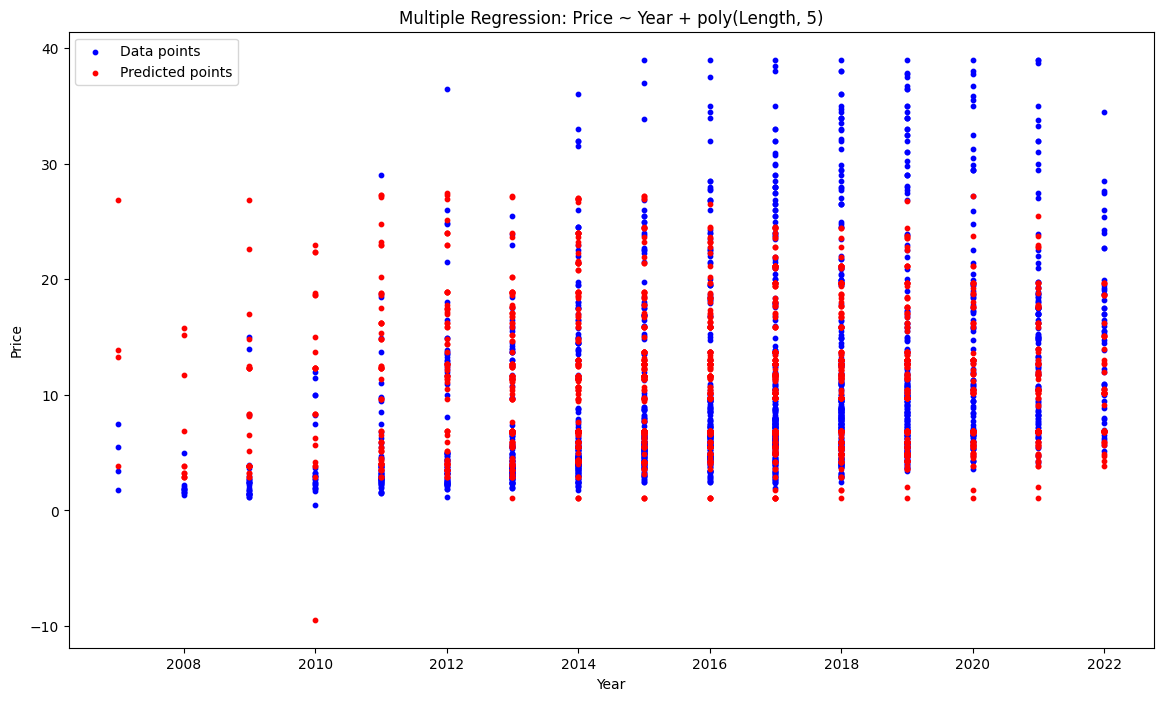

In [99]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm

# Define the dependent and independent variables
X = numerical_cols[['Year', 'Length']]
y = numerical_cols['Price']

# Create polynomial features for Length
poly = PolynomialFeatures(degree=5, include_bias=False)
X_poly_length = poly.fit_transform(X[['Length']])

# Combine Year and polynomial features of Length
X_combined = np.hstack((X[['Year']], X_poly_length))

# Fit the multiple regression model
model = LinearRegression()
model.fit(X_combined, y)

# Predict the prices
y_pred = model.predict(X_combined)

# Add a constant to the combined features for statsmodels
X_combined_sm = sm.add_constant(X_combined)

# Fit the model using statsmodels for detailed summary
model_sm = sm.OLS(y, X_combined_sm).fit()

# Get the coefficients, R-squared, adjusted R-squared, p-values, and MSE
coefficients = model_sm.params
r_squared = model_sm.rsquared
adjusted_r_squared = model_sm.rsquared_adj
p_values = model_sm.pvalues
mse = mean_squared_error(y, y_pred)

# Print the model results
print("Coefficients:\n", coefficients)
print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)
print("P-values:\n", p_values)
print("Mean Squared Error:", mse)

# Plot the results
plt.figure(figsize=(14, 8))
plt.scatter(X['Year'], y, color='blue', s=10, label='Data points')
plt.scatter(X['Year'], y_pred, color='red', s=10, label='Predicted points')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Multiple Regression: Price ~ Year + poly(Length, 5)')
plt.legend()
plt.show()

Coefficients:
 const    2.470966e-11
x1       4.191739e-08
x2       4.174485e-08
x3       4.432120e-05
x4      -3.517553e-08
x5       8.456457e-12
x6      -6.488701e-16
x7       2.842222e-08
x8       2.548069e-05
x9      -5.306658e-09
dtype: float64
R-squared: 0.554082448996381
Adjusted R-squared: 0.5527662814904672
P-values:
 const    1.759621e-10
x1       1.784828e-10
x2       1.487926e-10
x3       1.235298e-10
x4       3.276393e-13
x5       8.286391e-14
x6       1.380146e-13
x7       1.426181e-09
x8       1.244237e-03
x9       6.479565e-02
dtype: float64
Mean Squared Error: 32.67168075314276


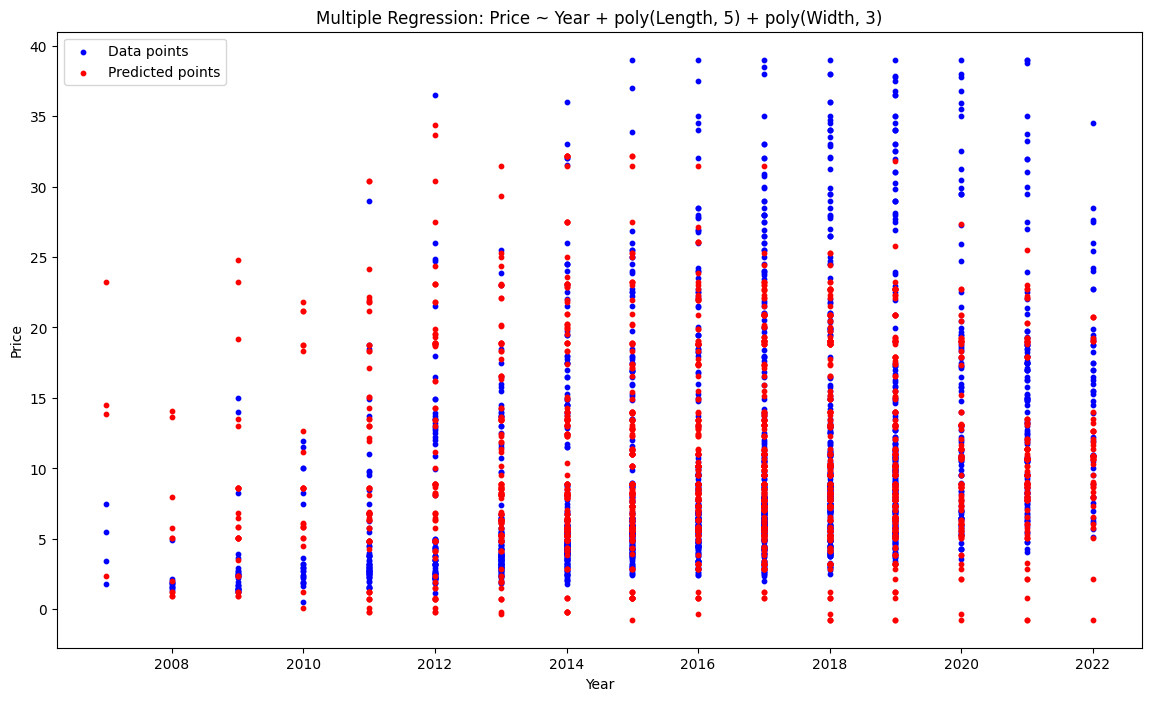

In [100]:
# Define the dependent and independent variables
X = numerical_cols[['Year', 'Length', 'Width']]
y = numerical_cols['Price']

# Create polynomial features for Length and Width
poly_length = PolynomialFeatures(degree=5, include_bias=False)
X_poly_length = poly_length.fit_transform(X[['Length']])

poly_width = PolynomialFeatures(degree=3, include_bias=False)
X_poly_width = poly_width.fit_transform(X[['Width']])

# Combine Year, polynomial features of Length, and polynomial features of Width
X_combined = np.hstack((X[['Year']], X_poly_length, X_poly_width))

# Fit the multiple regression model
model = LinearRegression()
model.fit(X_combined, y)

# Predict the prices
y_pred = model.predict(X_combined)

# Add a constant to the combined features for statsmodels
X_combined_sm = sm.add_constant(X_combined)

# Fit the model using statsmodels for detailed summary
model_sm = sm.OLS(y, X_combined_sm).fit()

# Get the coefficients, R-squared, adjusted R-squared, p-values, and MSE
coefficients = model_sm.params
r_squared = model_sm.rsquared
adjusted_r_squared = model_sm.rsquared_adj
p_values = model_sm.pvalues
mse = mean_squared_error(y, y_pred)

# Print the model results
print("Coefficients:\n", coefficients)
print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)
print("P-values:\n", p_values)
print("Mean Squared Error:", mse)

# Plot the results
plt.figure(figsize=(14, 8))
plt.scatter(X['Year'], y, color='blue', s=10, label='Data points')
plt.scatter(X['Year'], y_pred, color='red', s=10, label='Predicted points')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Multiple Regression: Price ~ Year + poly(Length, 5) + poly(Width, 3)')
plt.legend()
plt.show()

Coefficients:
 const    2.501925e-11
x1       4.244262e-08
x2       4.224948e-08
x3       4.483561e-05
x4      -3.530580e-08
x5       8.489859e-12
x6      -6.537910e-16
x7       2.707257e-08
x8       2.273644e-05
x9      -4.443432e-09
x10      2.051017e-09
x11      1.440835e-07
x12      3.809696e-06
dtype: float64
R-squared: 0.5552644063075277
Adjusted R-squared: 0.5536882612619549
P-values:
 const    1.025345e-10
x1       1.042950e-10
x2       8.815168e-11
x3       7.451241e-11
x4       2.556632e-13
x5       6.305591e-14
x6       8.759266e-14
x7       1.133655e-08
x8       4.419114e-03
x9       1.253351e-01
x10      7.443402e-14
x11      1.467224e-10
x12      3.412370e-02
dtype: float64
Mean Squared Error: 32.313592264065676


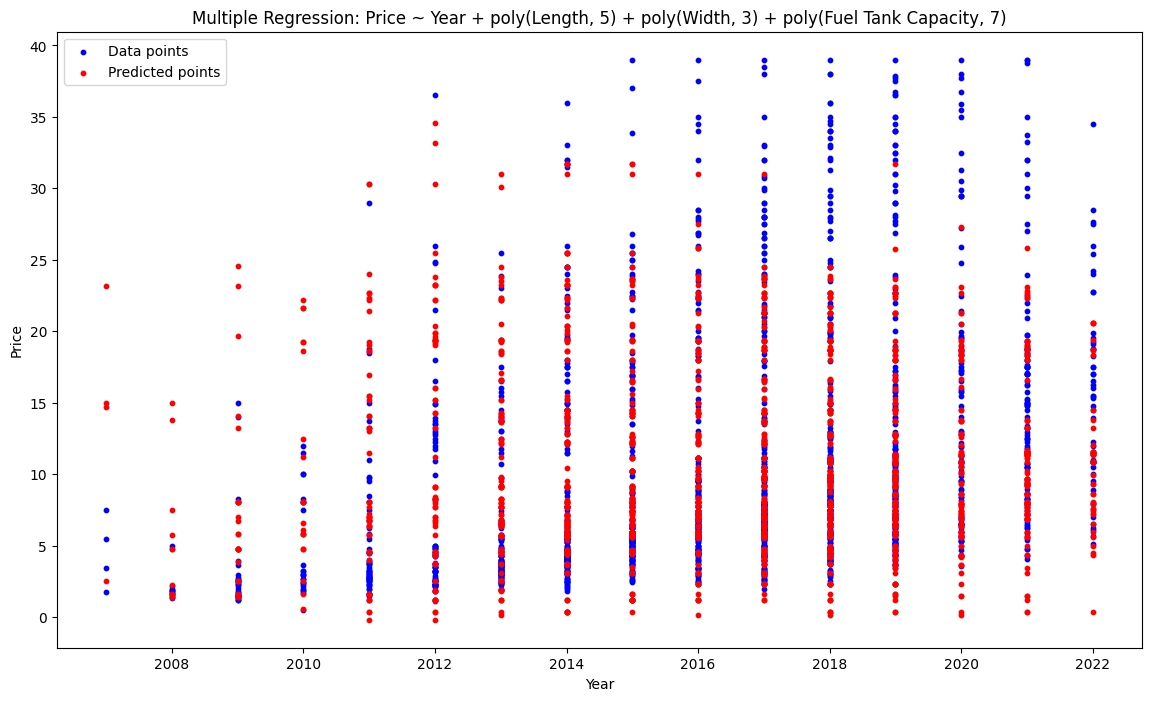

In [101]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

import statsmodels.api as sm

# Define the dependent and independent variables
X = numerical_cols[['Year', 'Length', 'Width', 'Fuel Tank Capacity']]
y = numerical_cols['Price']

# Create polynomial features for Length, Width, and Fuel Tank Capacity
poly_length = PolynomialFeatures(degree=5, include_bias=False)
X_poly_length = poly_length.fit_transform(X[['Length']])

poly_width = PolynomialFeatures(degree=3, include_bias=False)
X_poly_width = poly_width.fit_transform(X[['Width']])

poly_fuel = PolynomialFeatures(degree=3, include_bias=False)
X_poly_fuel = poly_fuel.fit_transform(X[['Fuel Tank Capacity']])

# Combine Year, polynomial features of Length, Width, and Fuel Tank Capacity
X_combined = np.hstack((X[['Year']], X_poly_length, X_poly_width, X_poly_fuel))

# Fit the multiple regression model
model = LinearRegression()
model.fit(X_combined, y)

# Predict the prices
y_pred = model.predict(X_combined)

# Add a constant to the combined features for statsmodels
X_combined_sm = sm.add_constant(X_combined)

# Fit the model using statsmodels for detailed summary
model_sm = sm.OLS(y, X_combined_sm).fit()

# Get the coefficients, R-squared, adjusted R-squared, p-values, and MSE
coefficients = model_sm.params
r_squared = model_sm.rsquared
adjusted_r_squared = model_sm.rsquared_adj
p_values = model_sm.pvalues
mse = mean_squared_error(y, y_pred)

# Print the model results
print("Coefficients:\n", coefficients)
print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)
print("P-values:\n", p_values)
print("Mean Squared Error:", mse)

# Plot the results
plt.figure(figsize=(14, 8))
plt.scatter(X['Year'], y, color='blue', s=10, label='Data points')
plt.scatter(X['Year'], y_pred, color='red', s=10, label='Predicted points')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Multiple Regression: Price ~ Year + poly(Length, 5) + poly(Width, 3) + poly(Fuel Tank Capacity, 7)')
plt.legend()
plt.show()

In [102]:
categorical_cols = car_details.select_dtypes(include=['object'])
print(categorical_cols.columns)

Index(['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Color',
       'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque',
       'Drivetrain', 'Make_Category', 'Fuel_Type_Category',
       'Location_Category'],
      dtype='object')


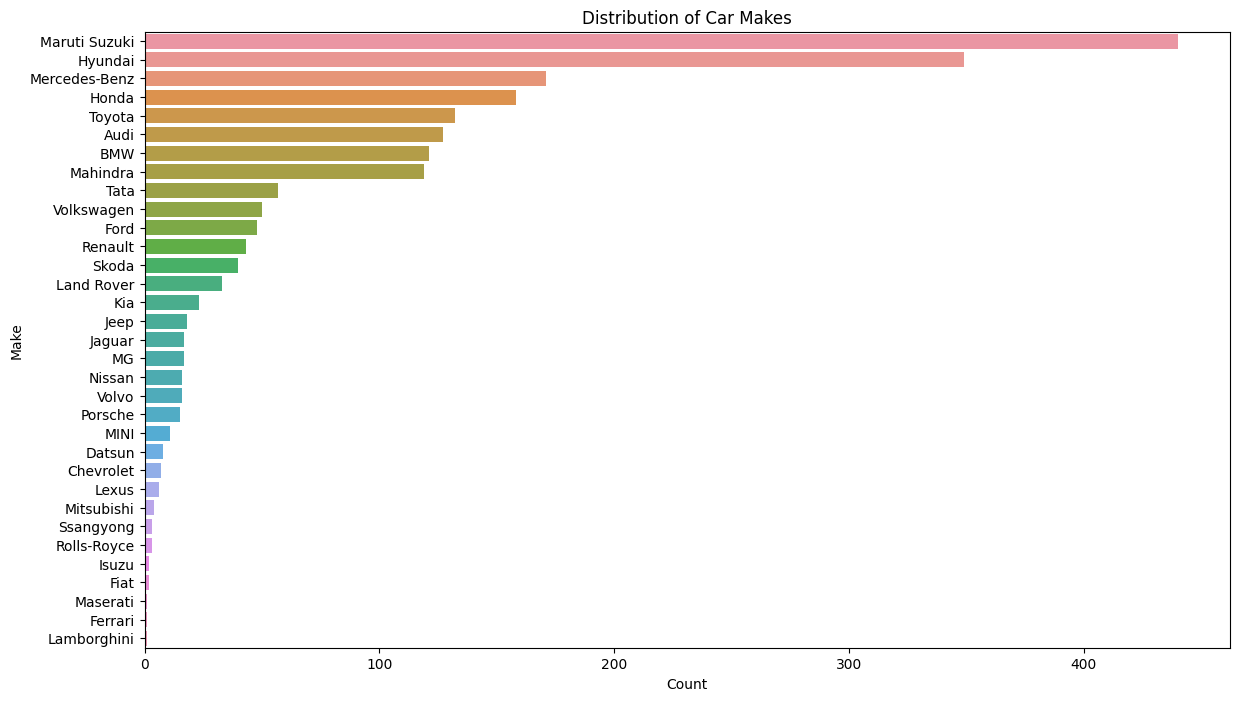

In [103]:
plt.figure(figsize=(14, 8))
sns.countplot(y='Make', data=car_details, order=car_details['Make'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Make')
plt.title('Distribution of Car Makes')
plt.show()

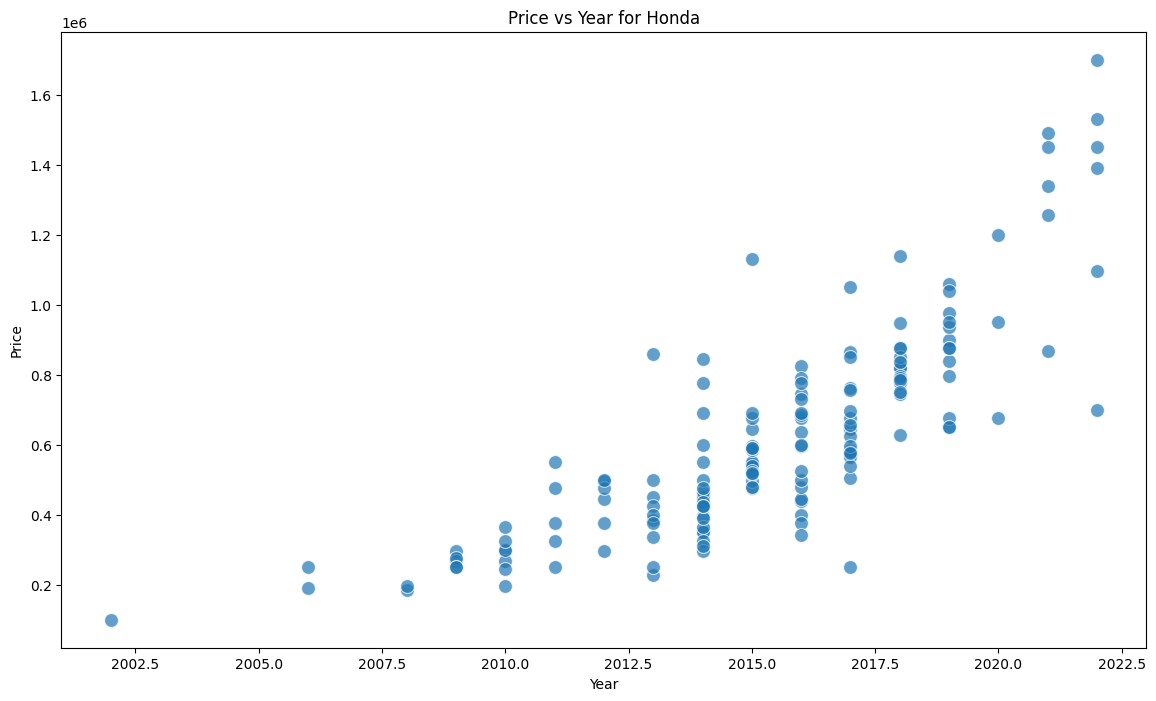

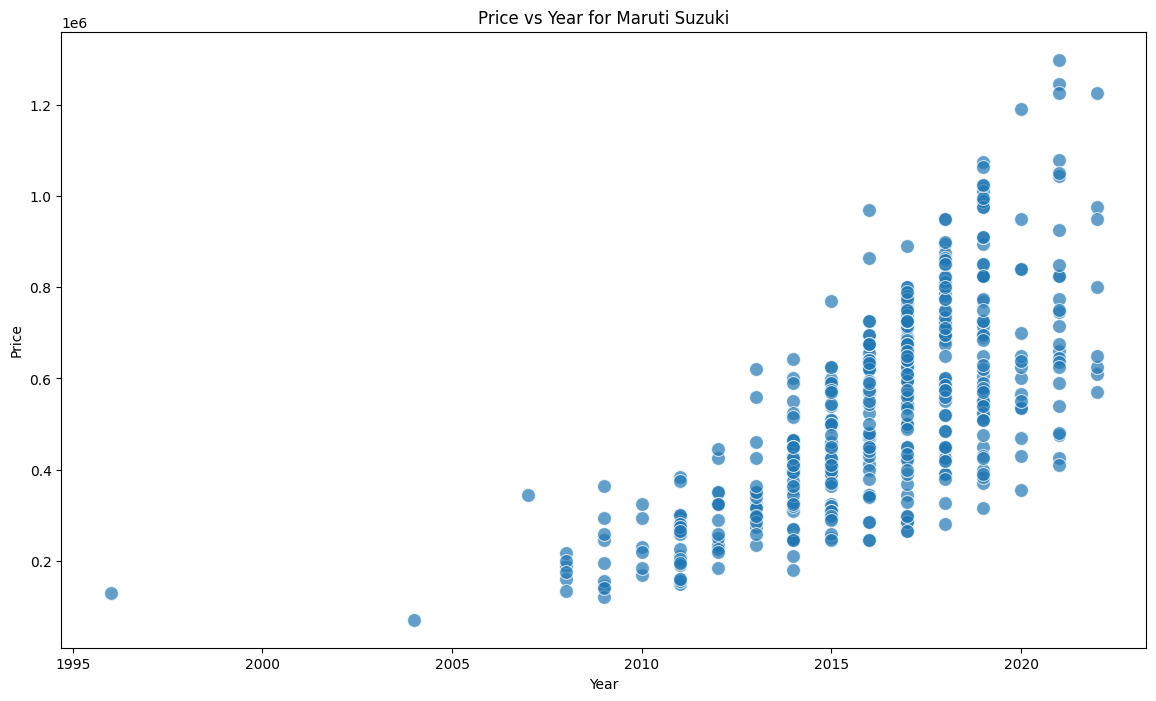

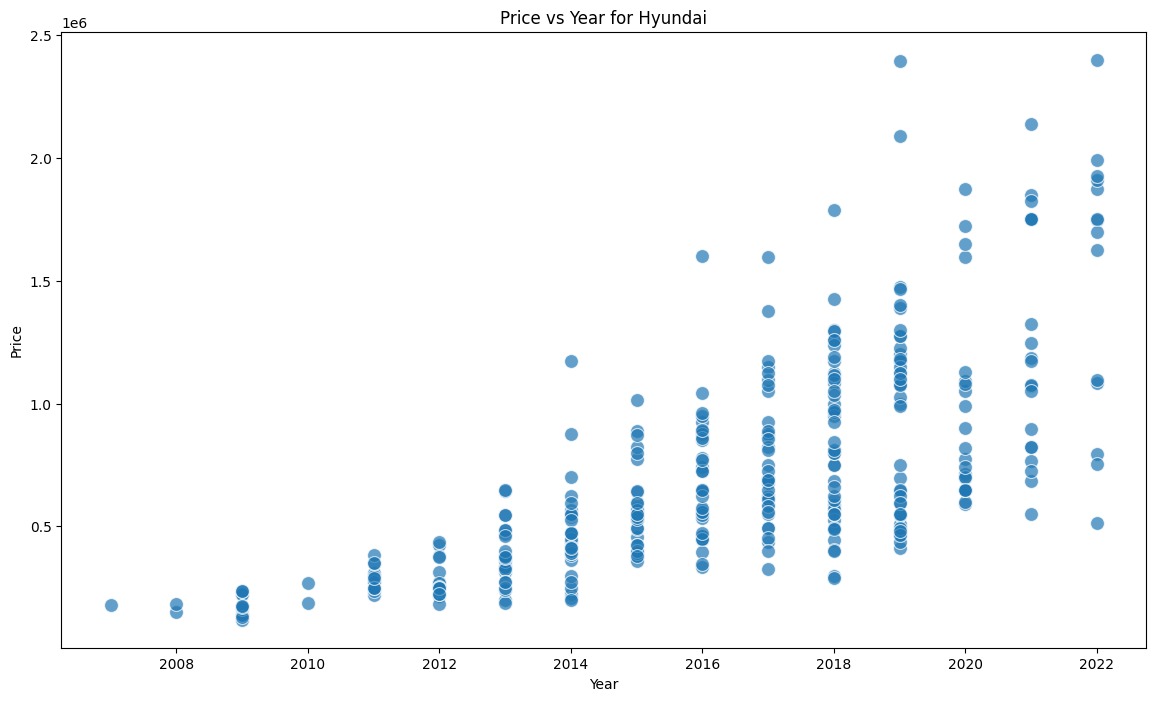

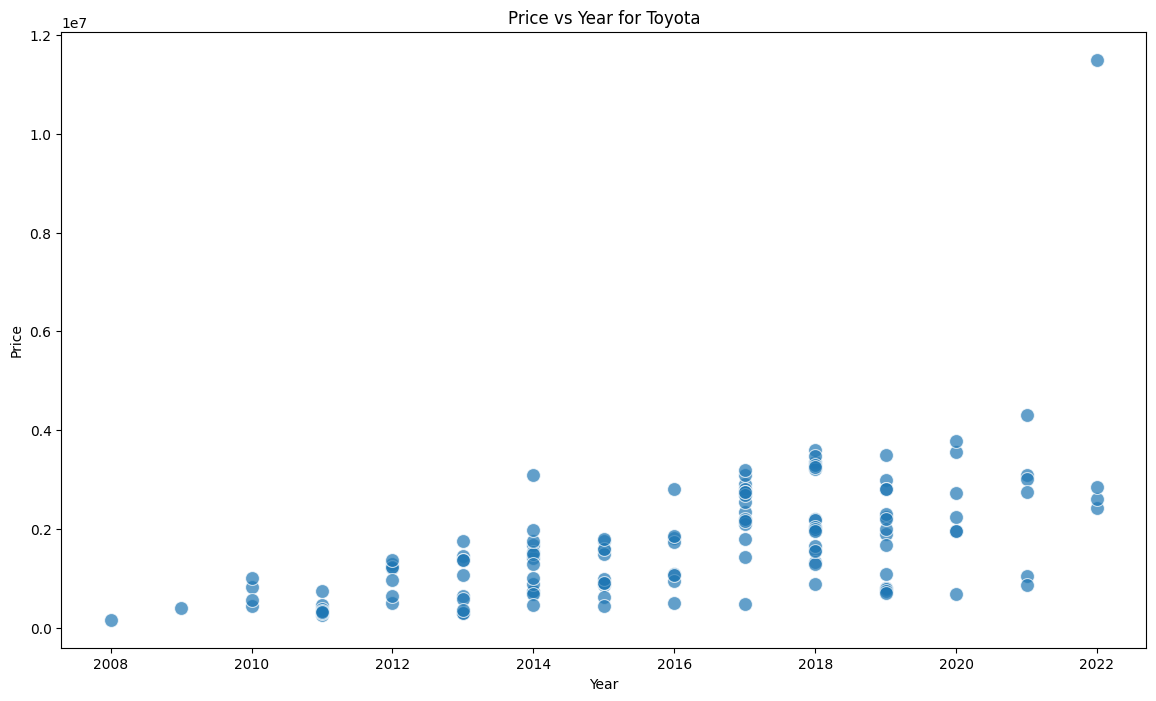

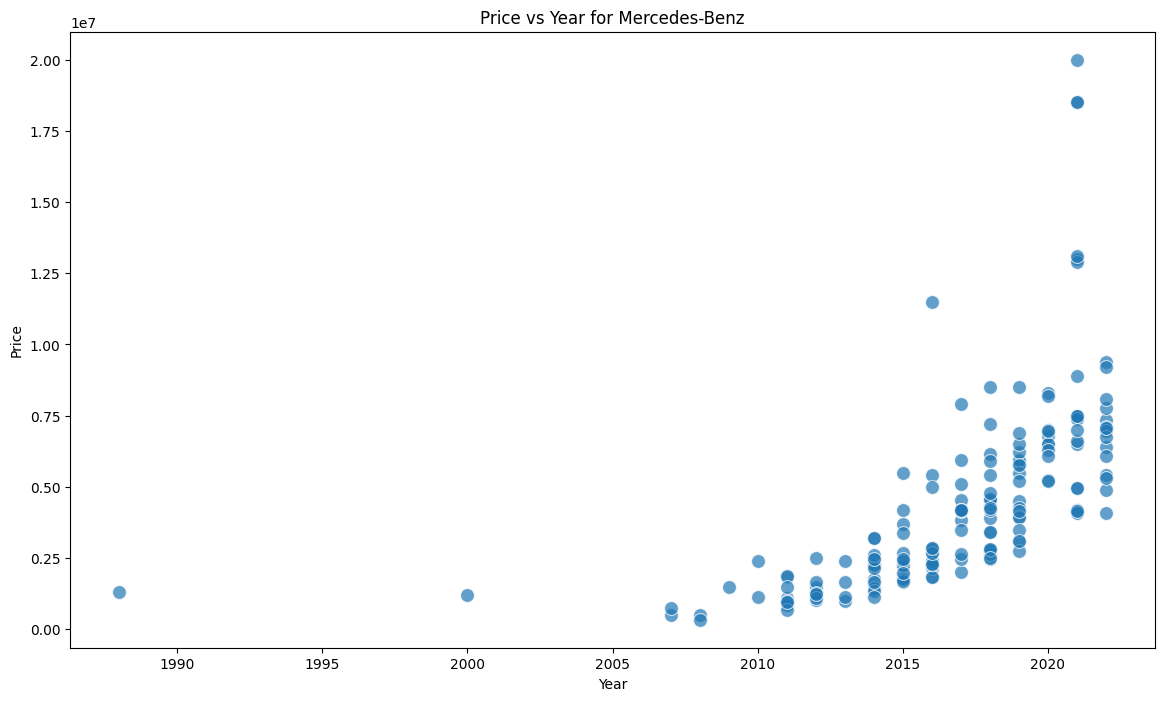

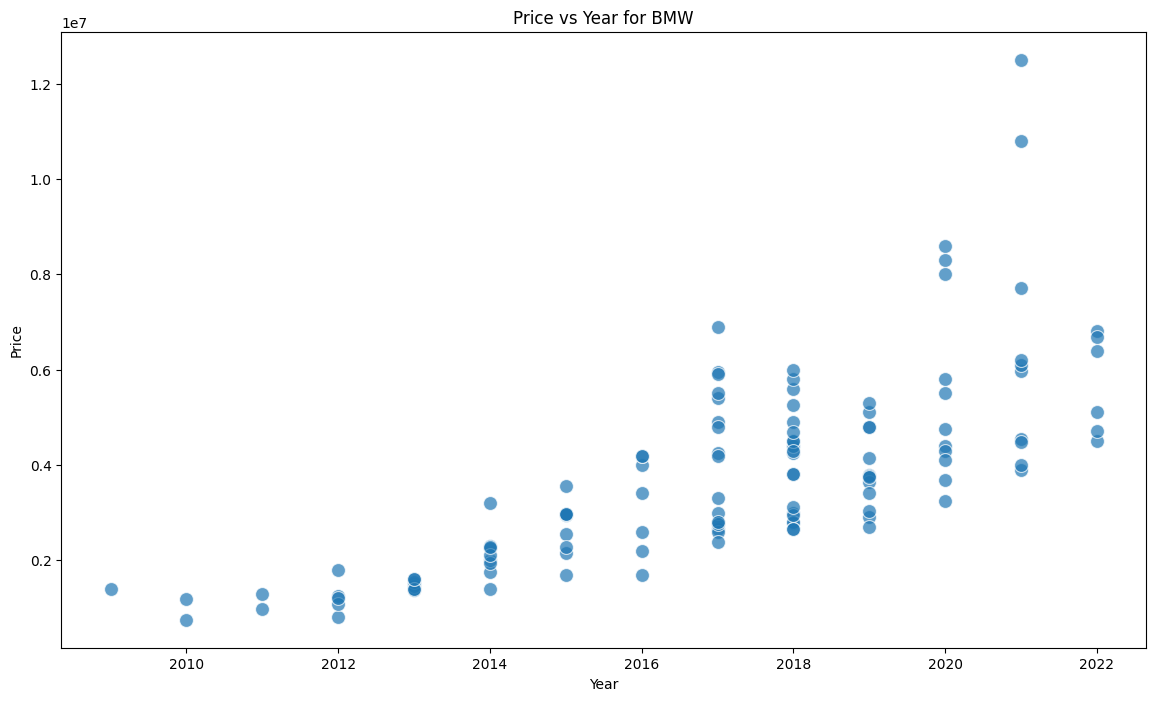

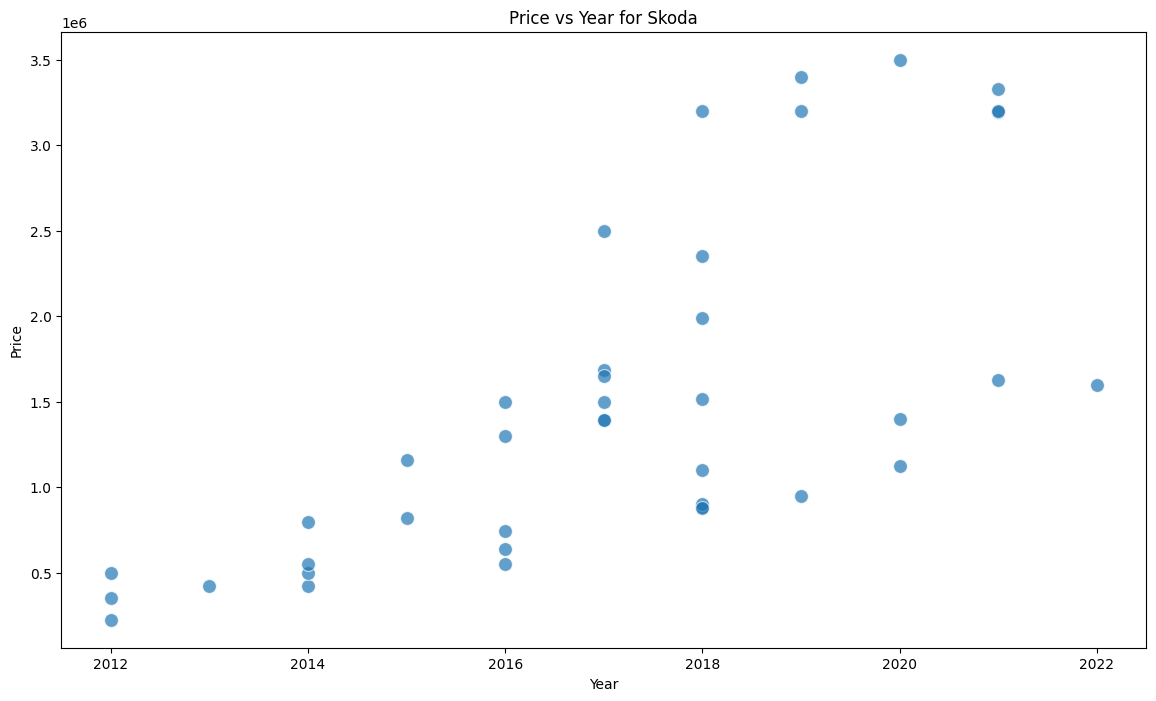

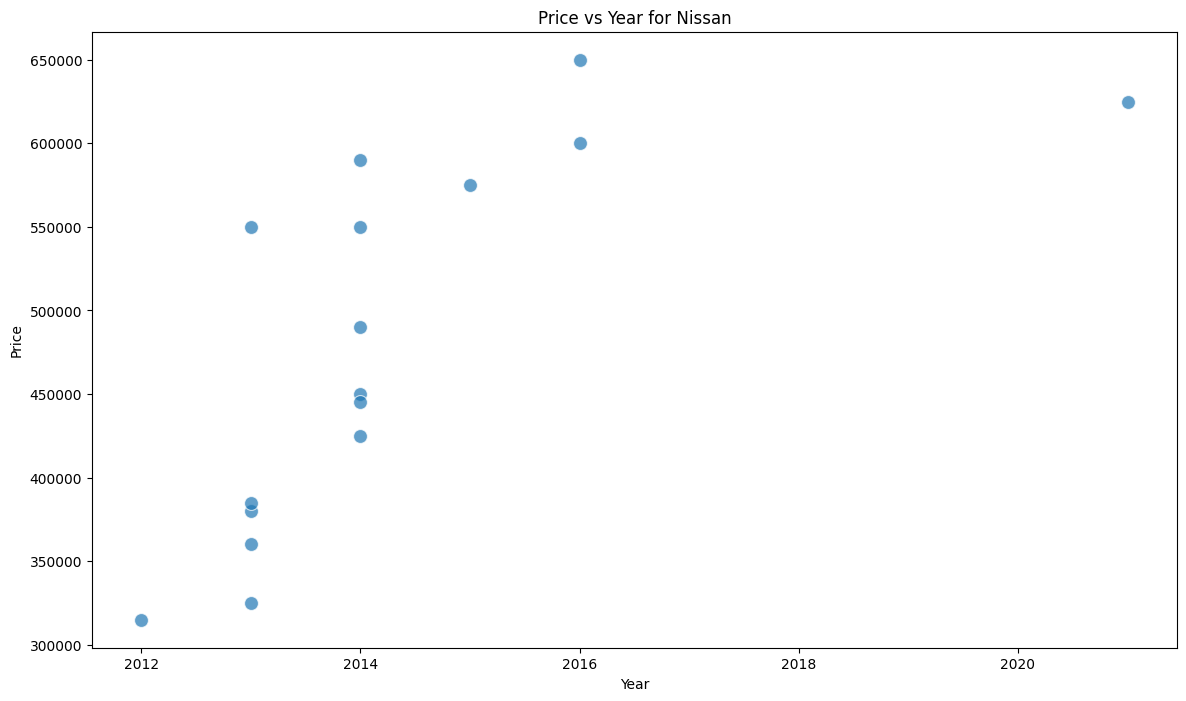

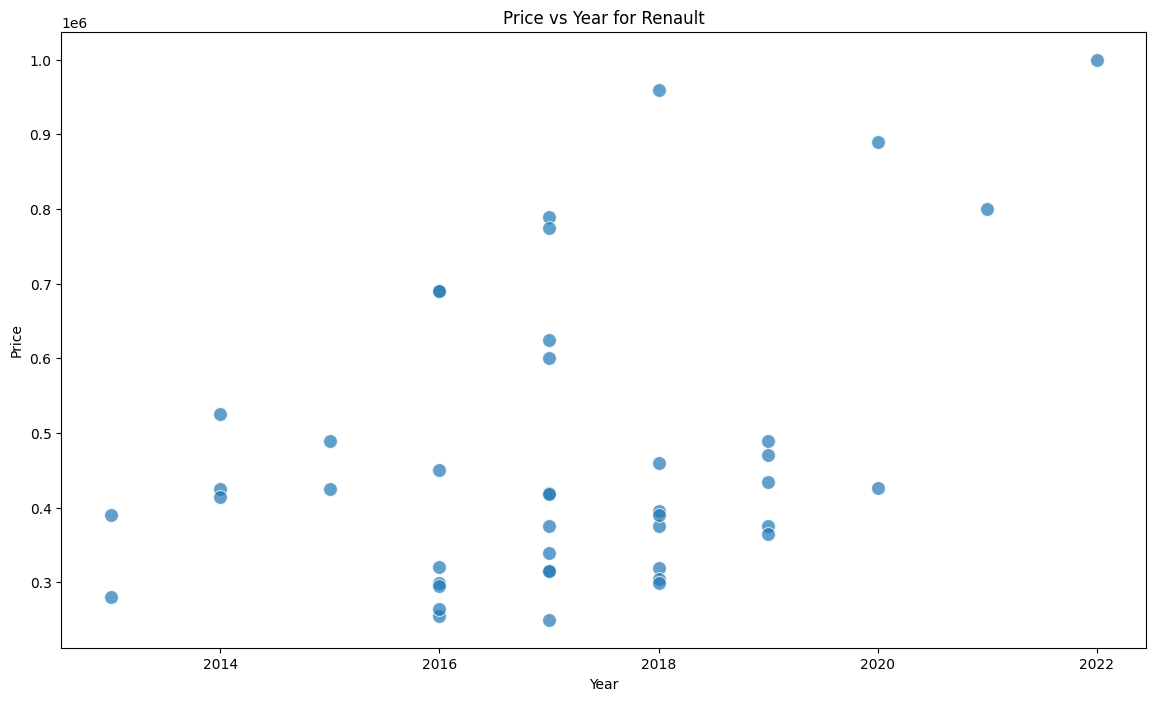

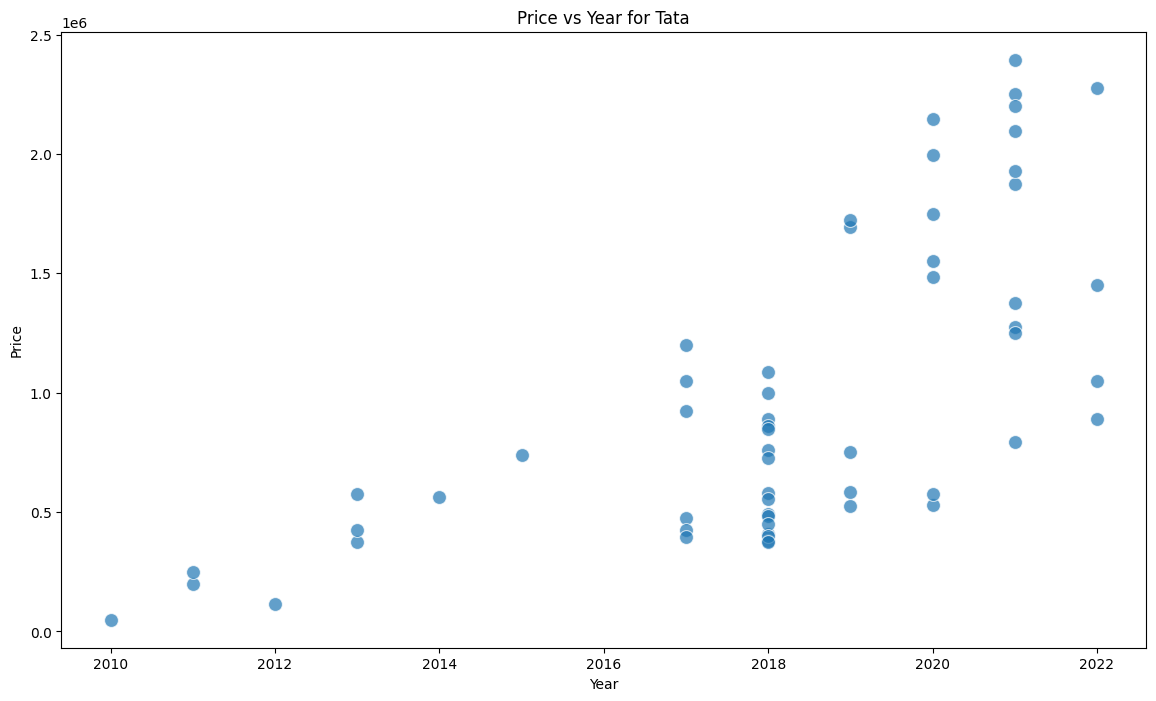

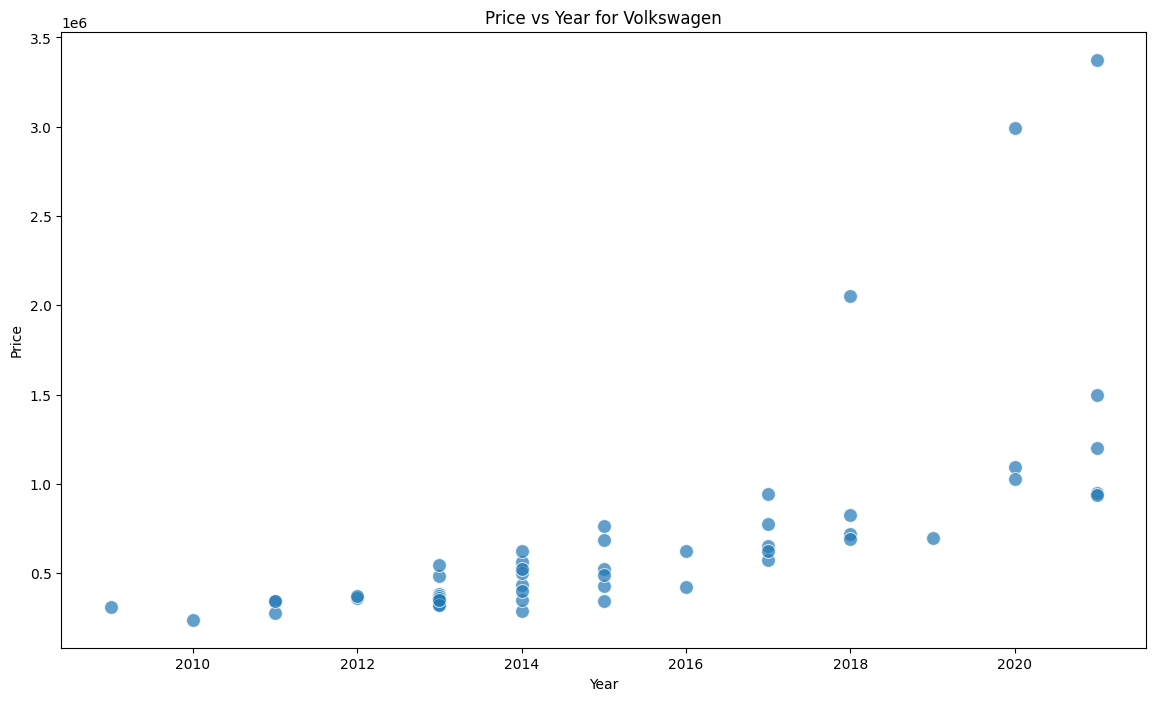

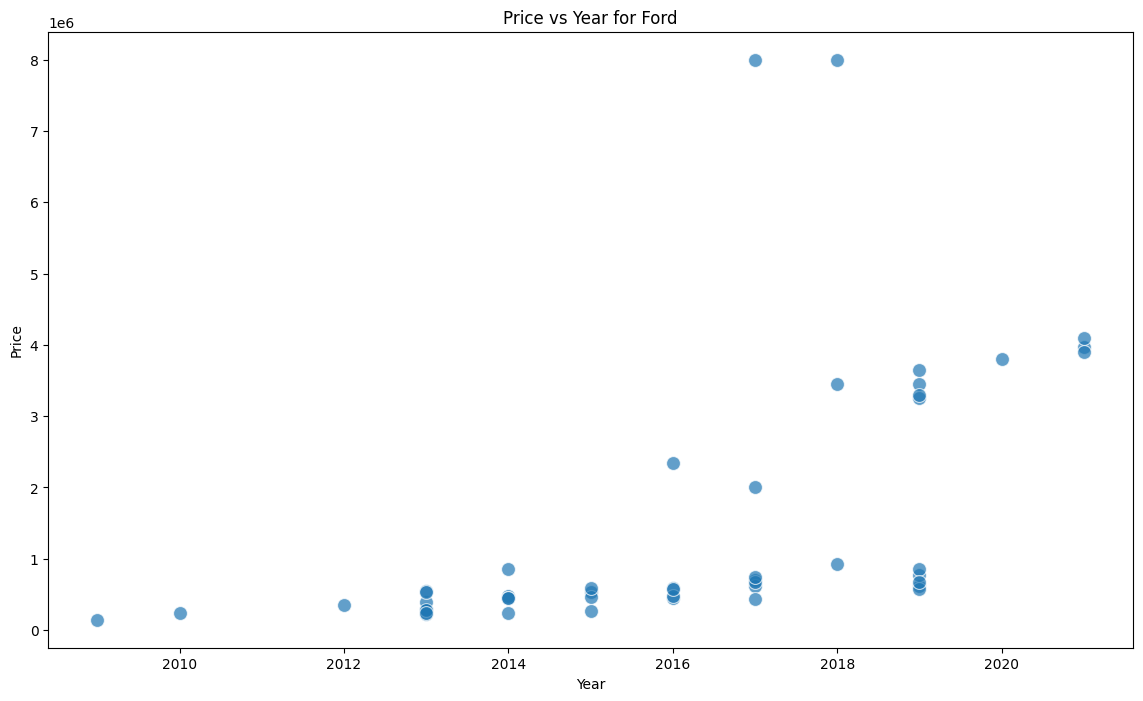

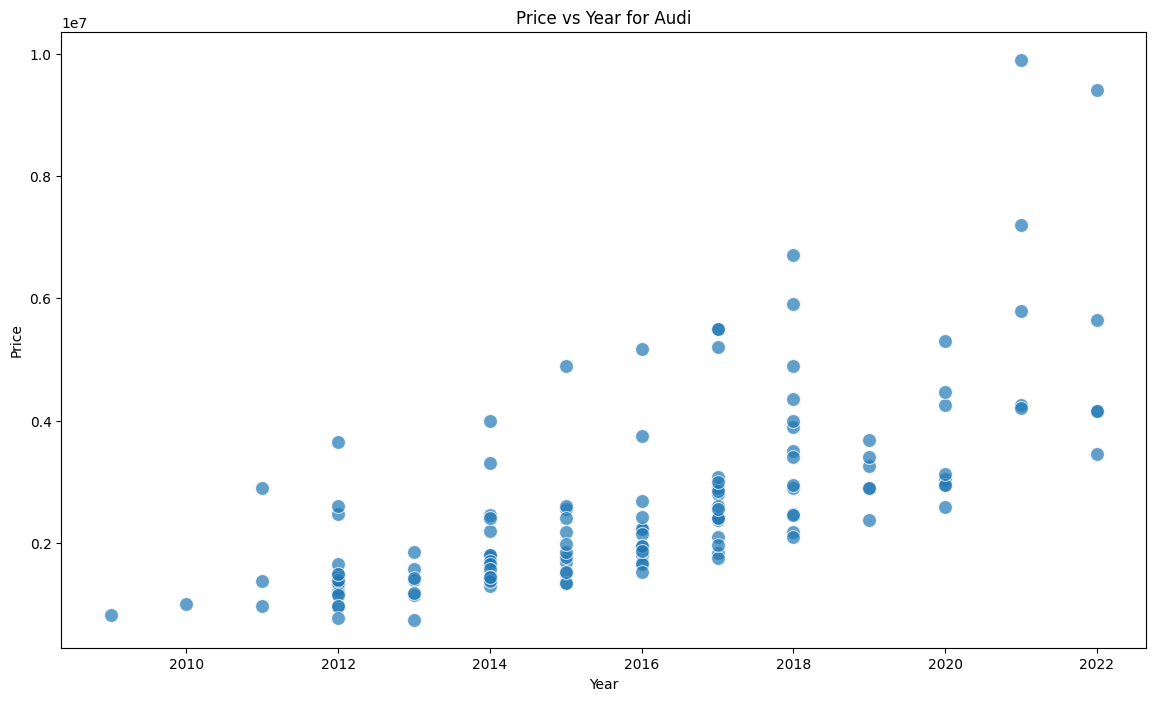

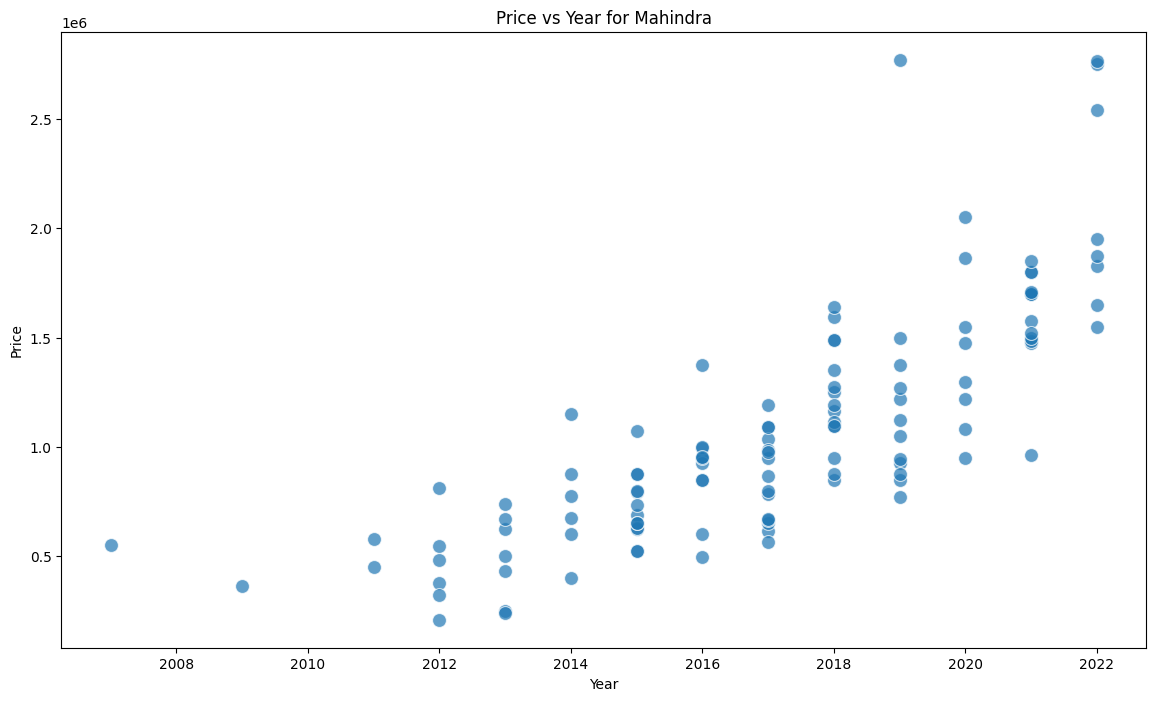

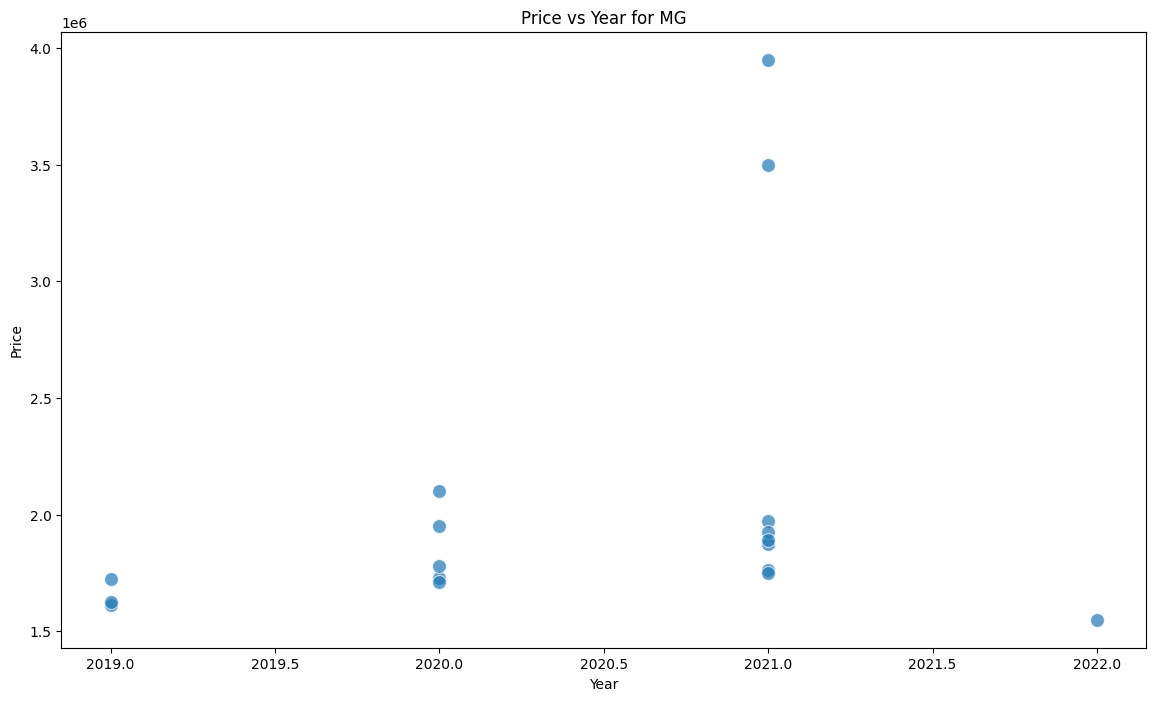

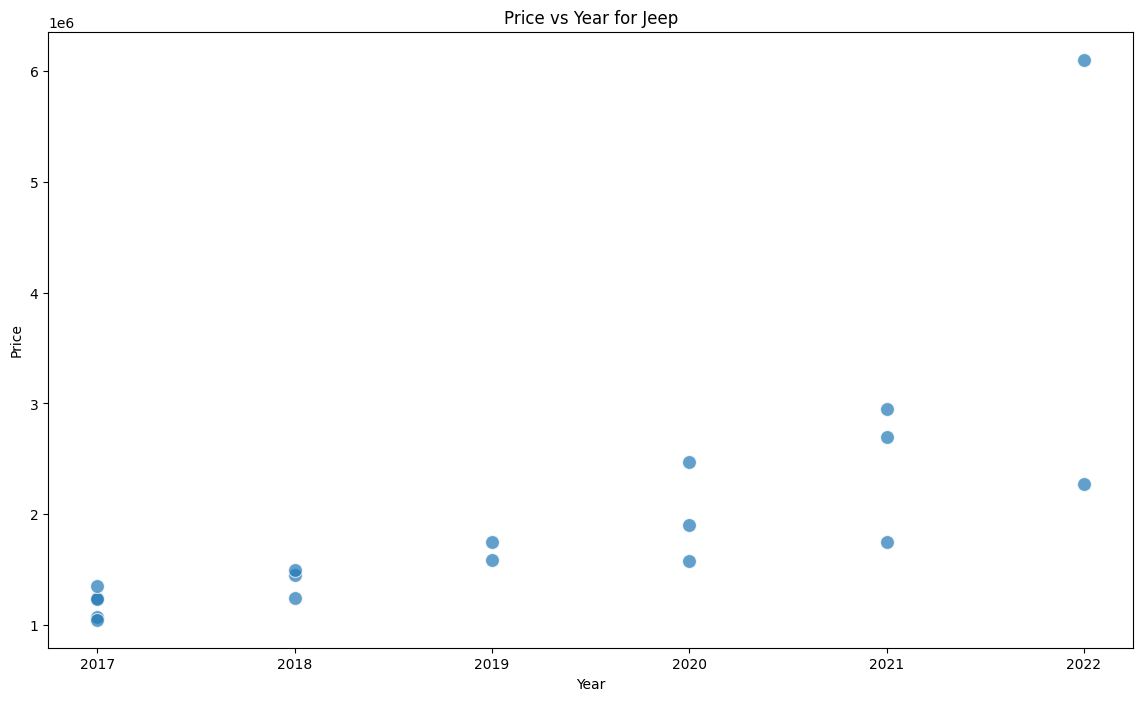

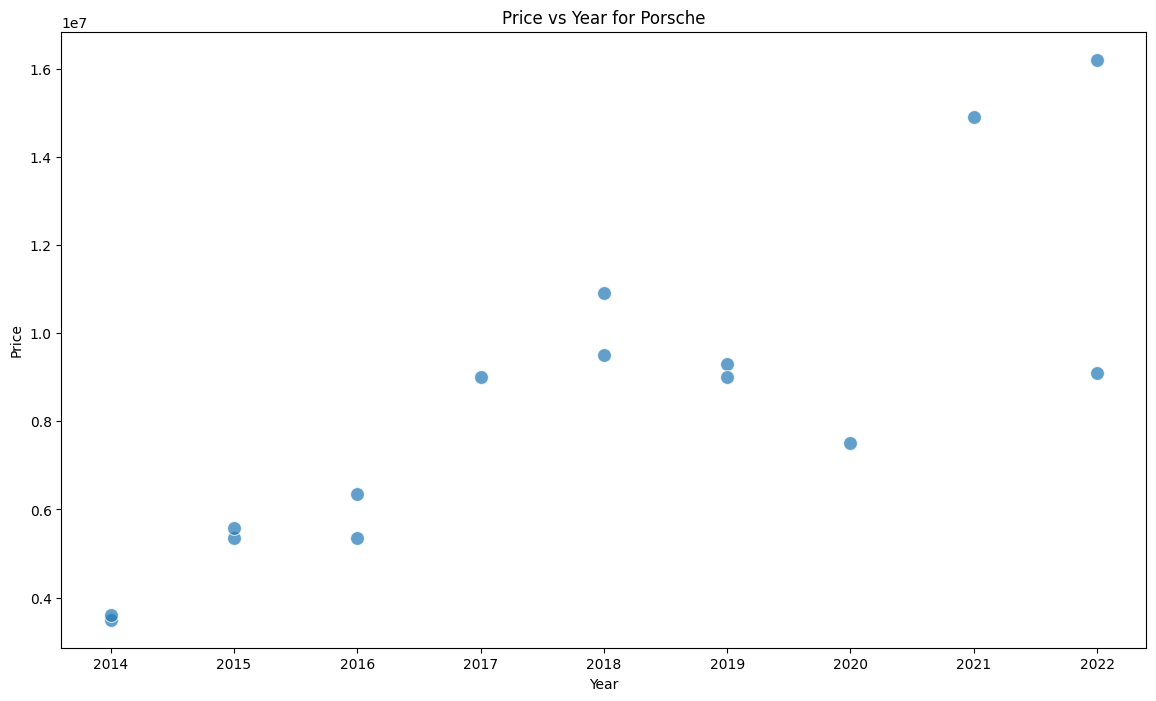

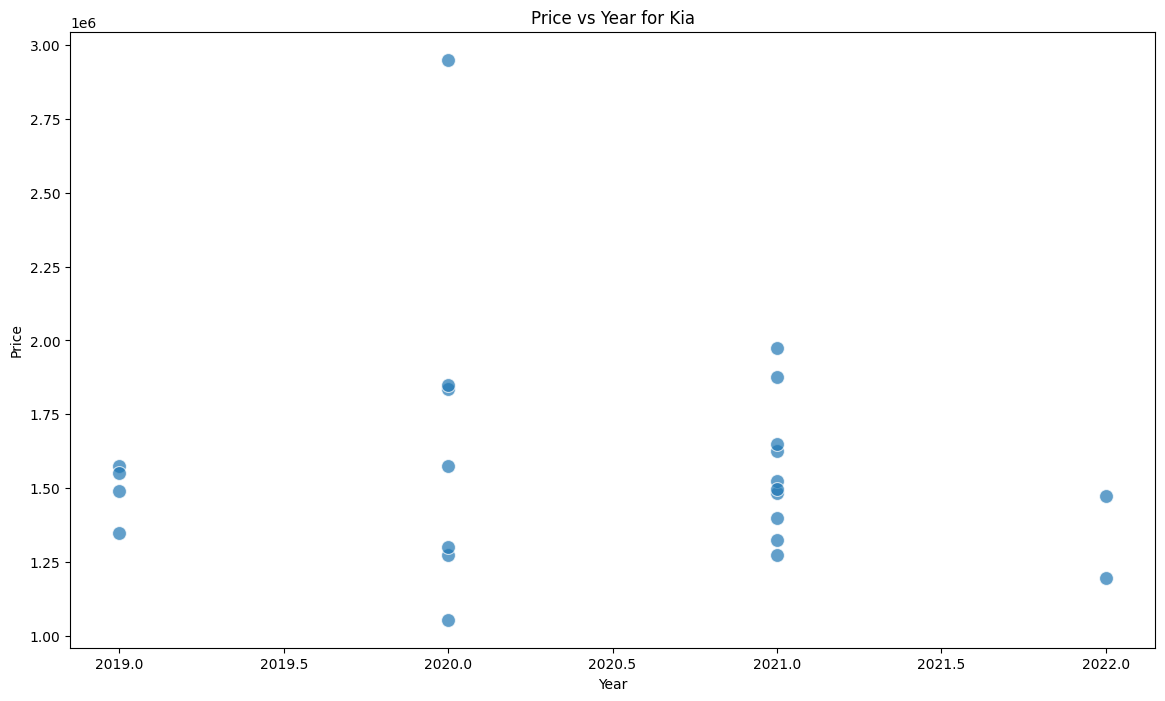

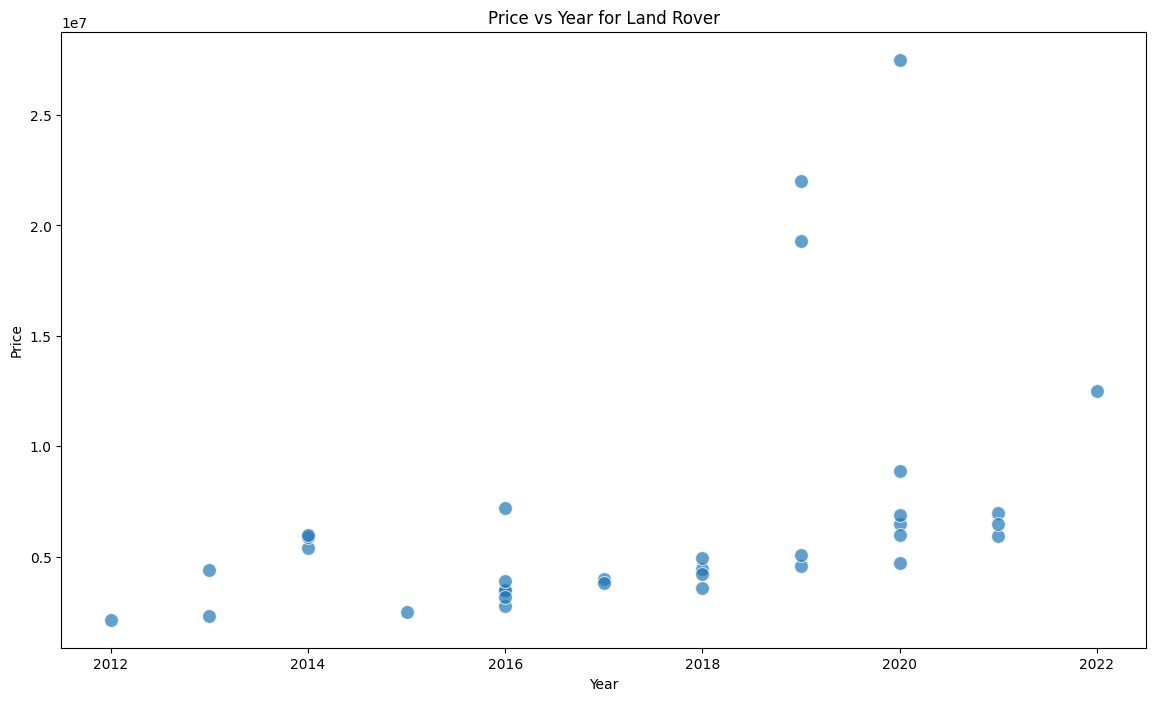

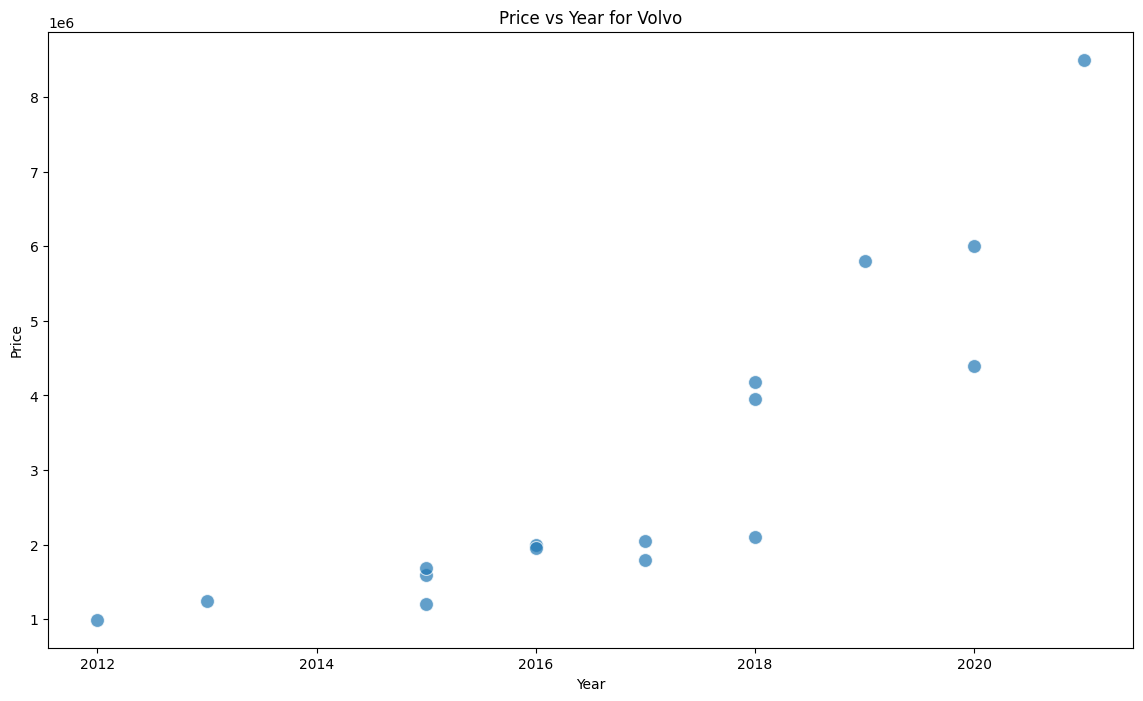

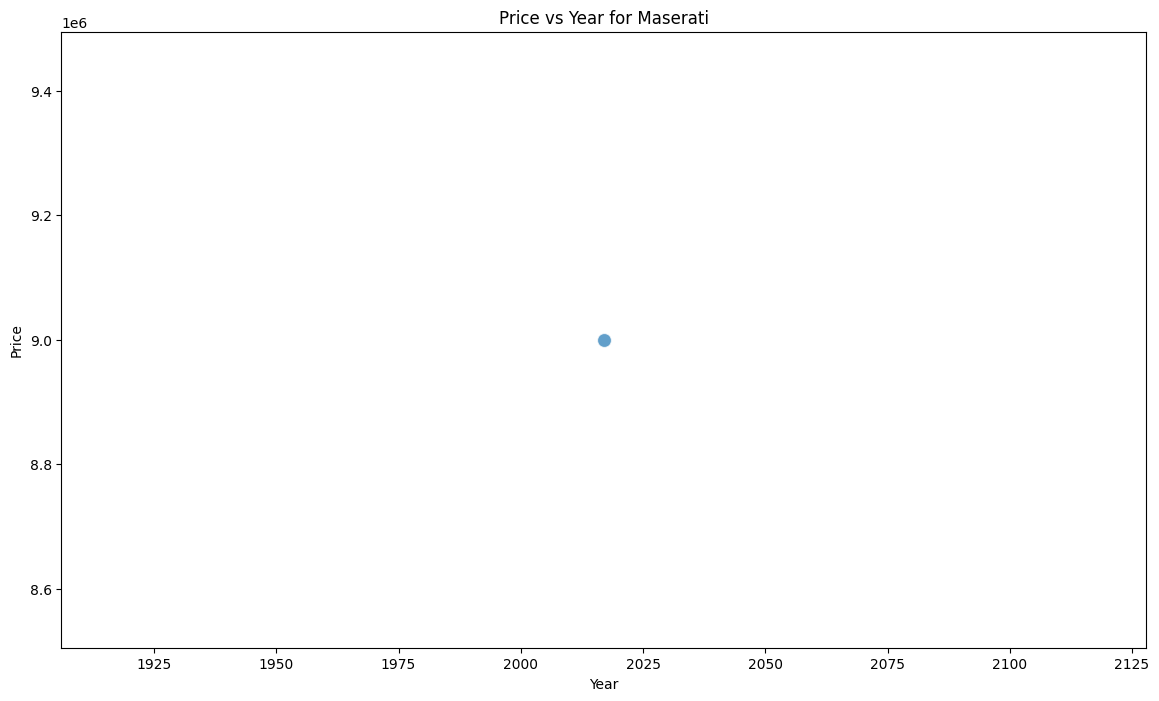

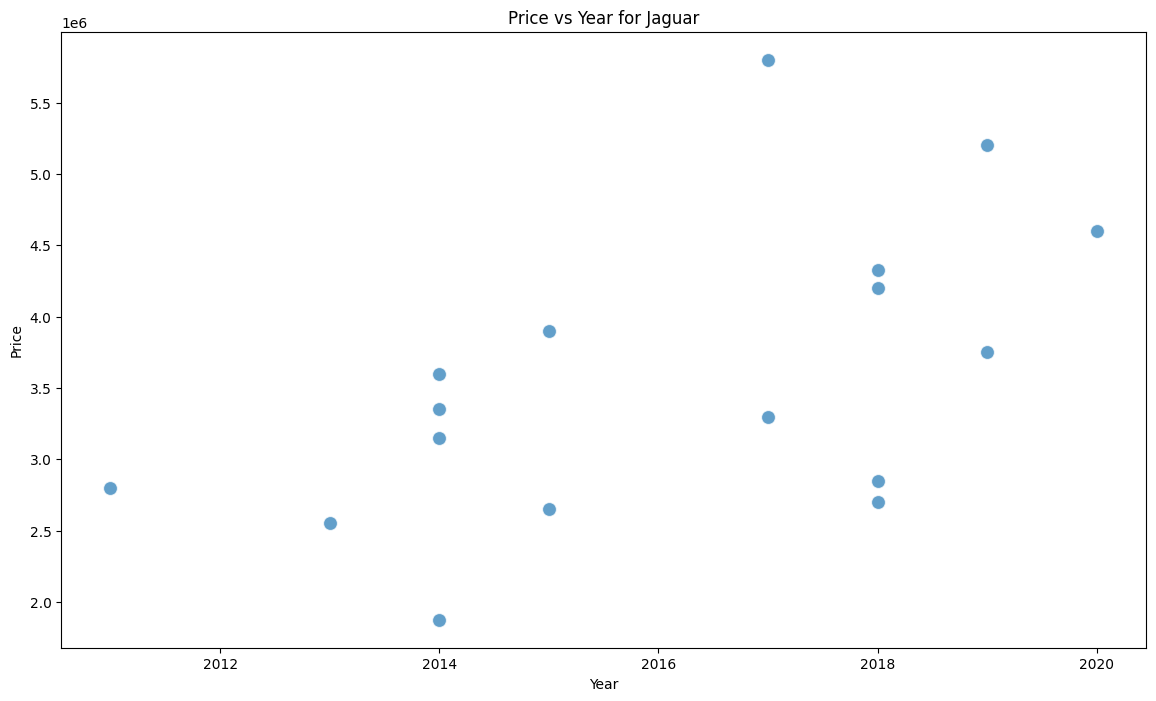

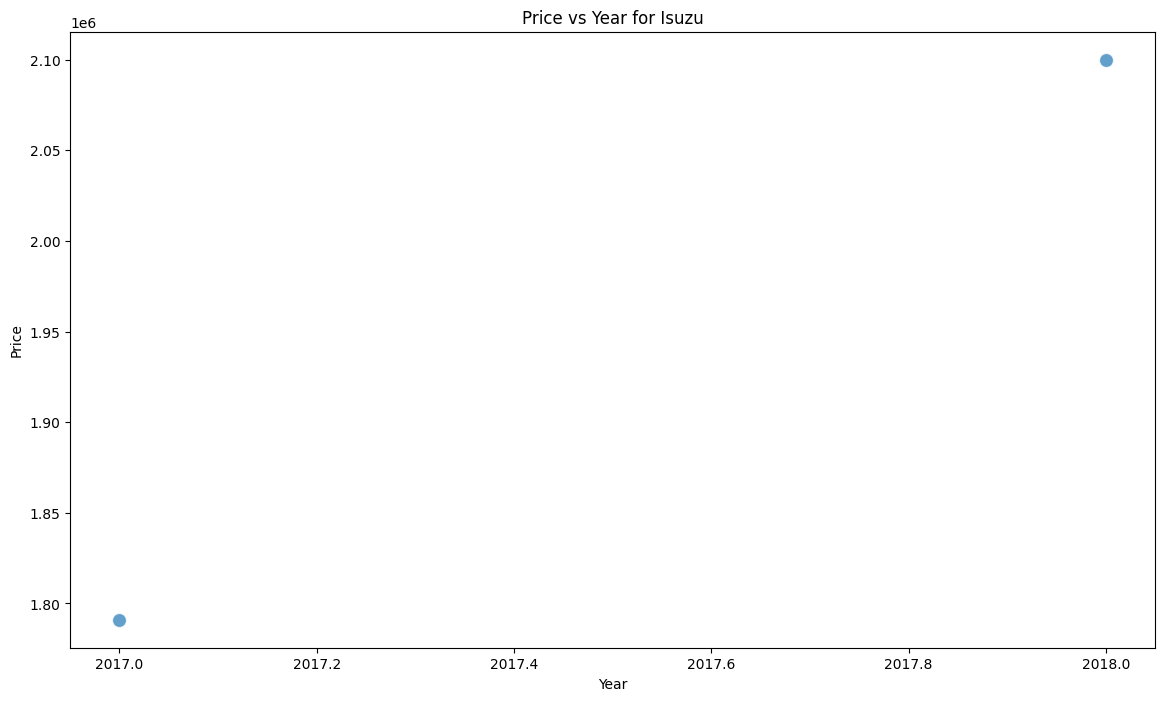

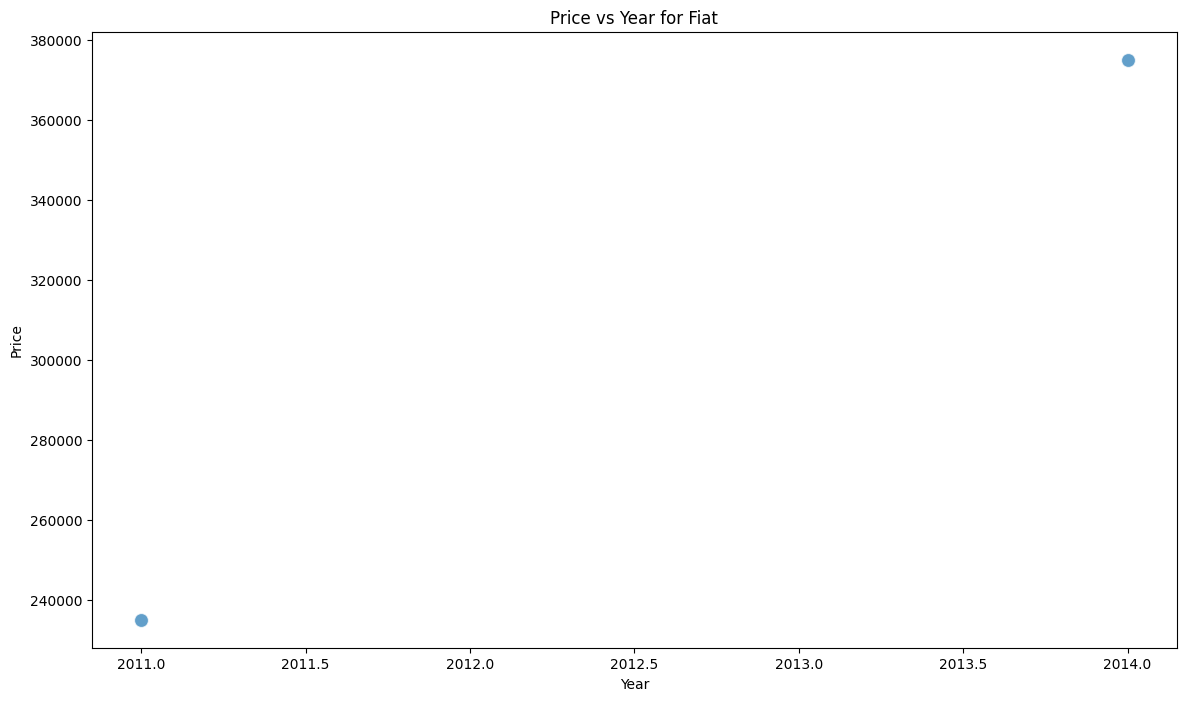

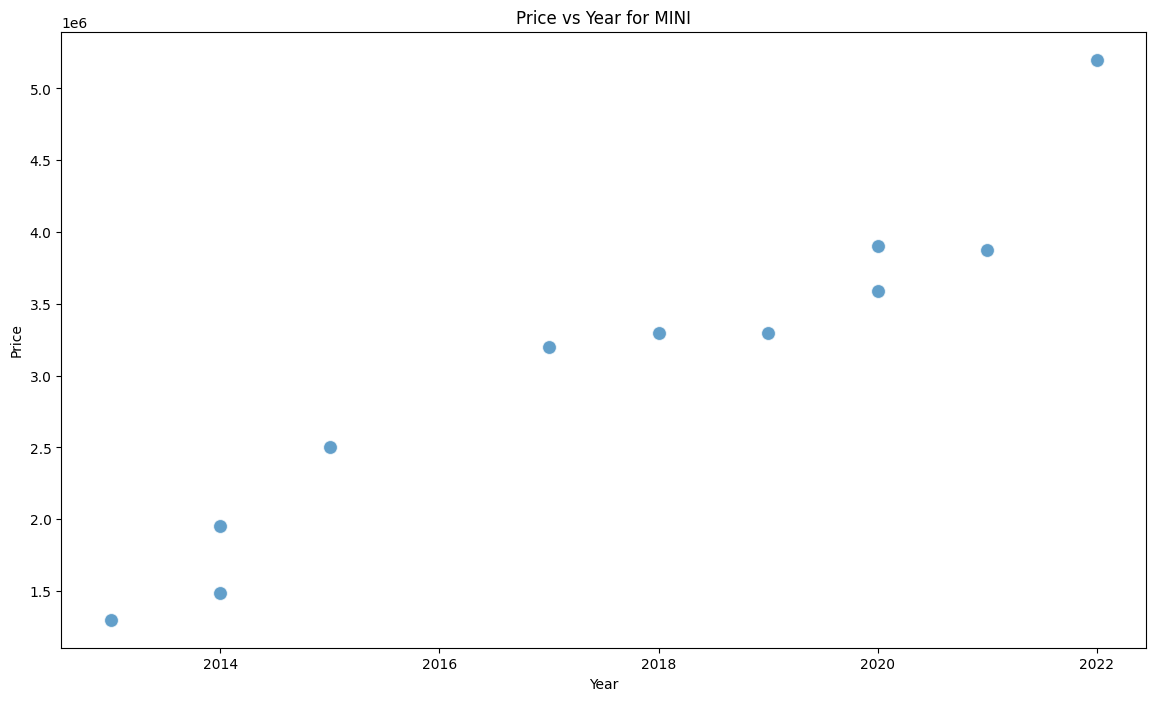

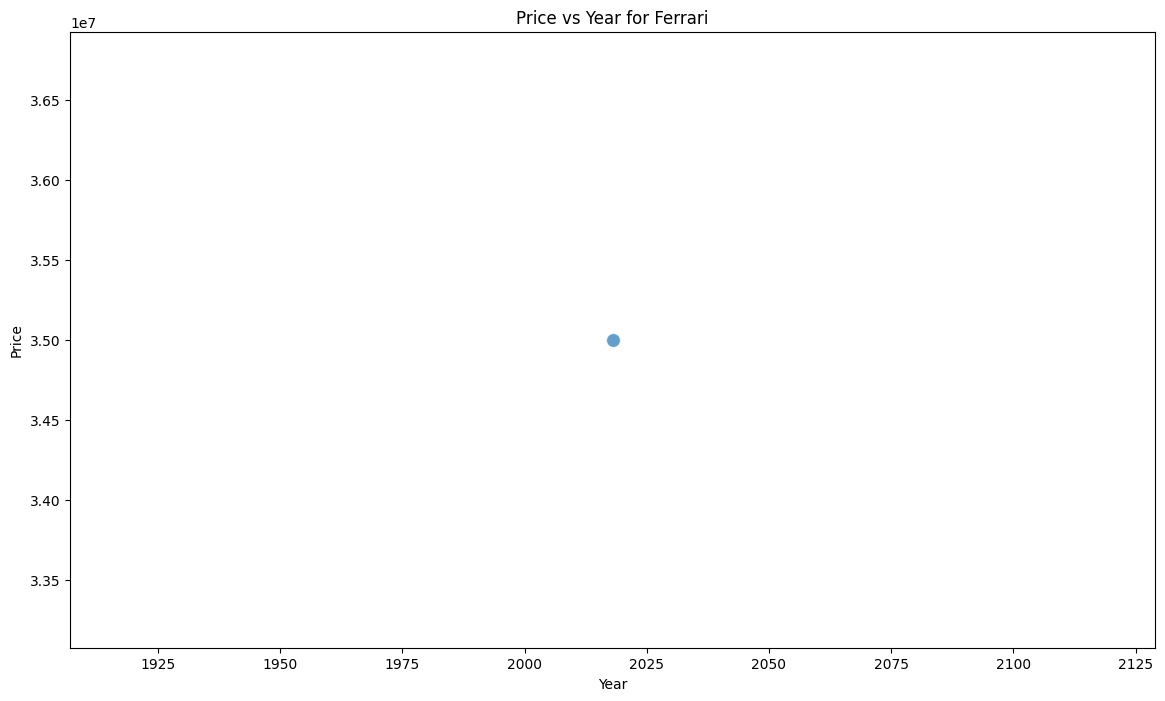

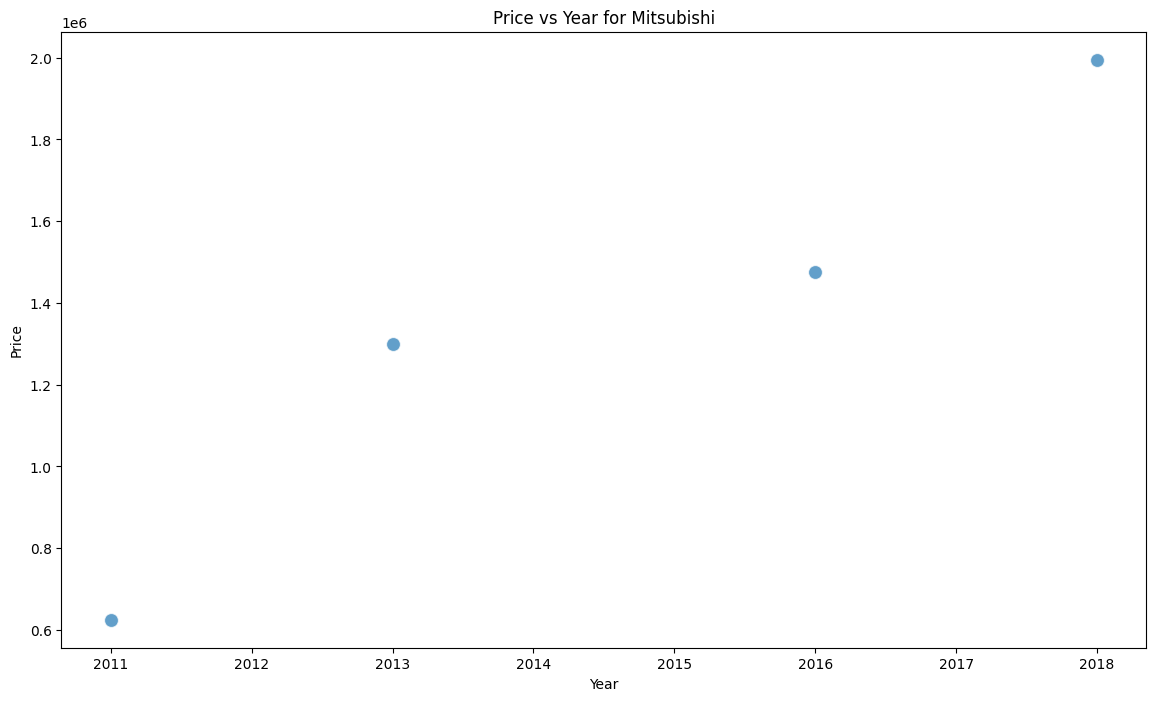

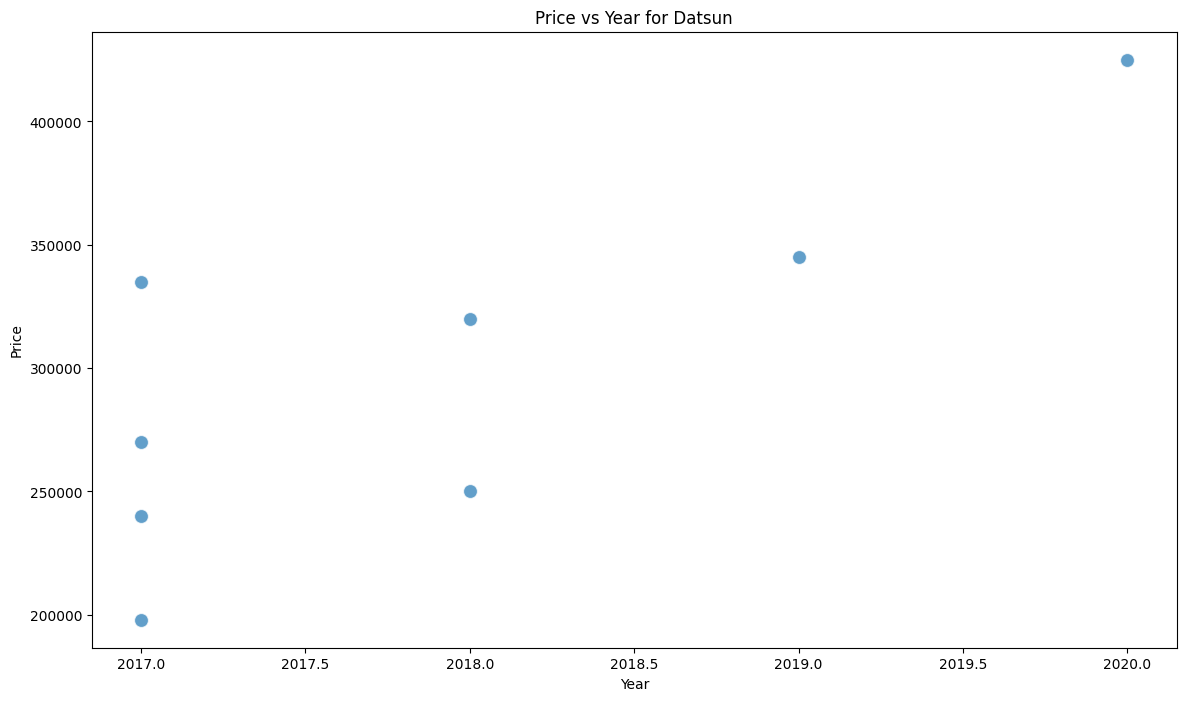

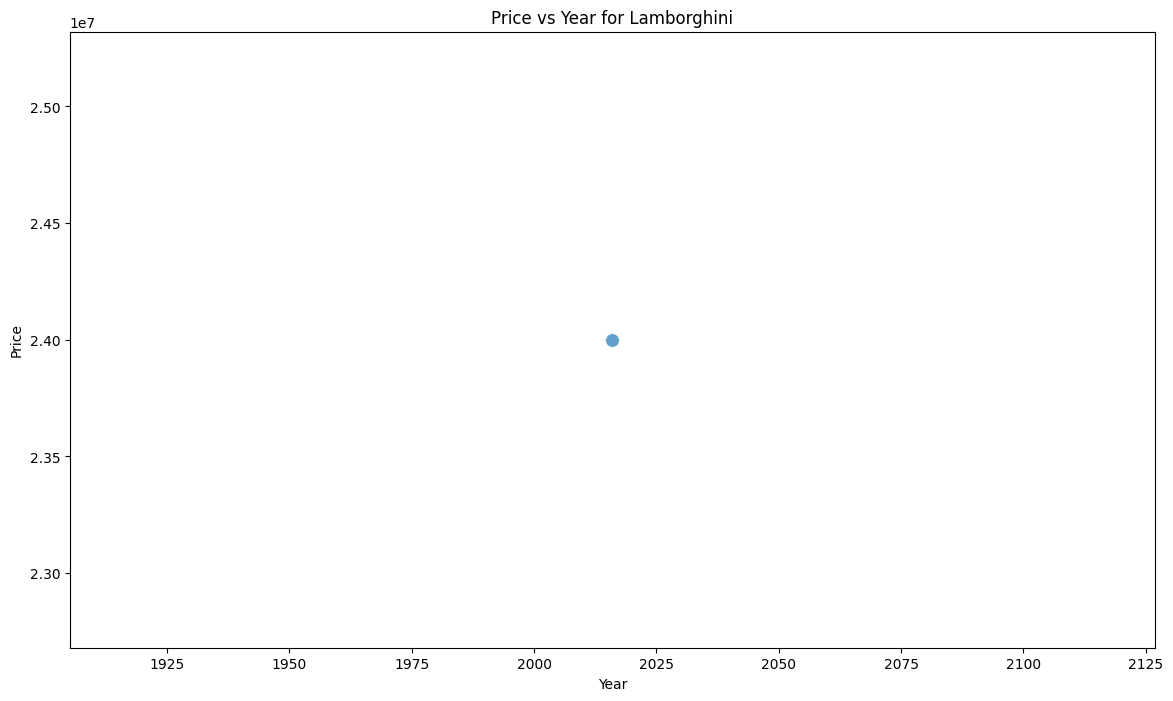

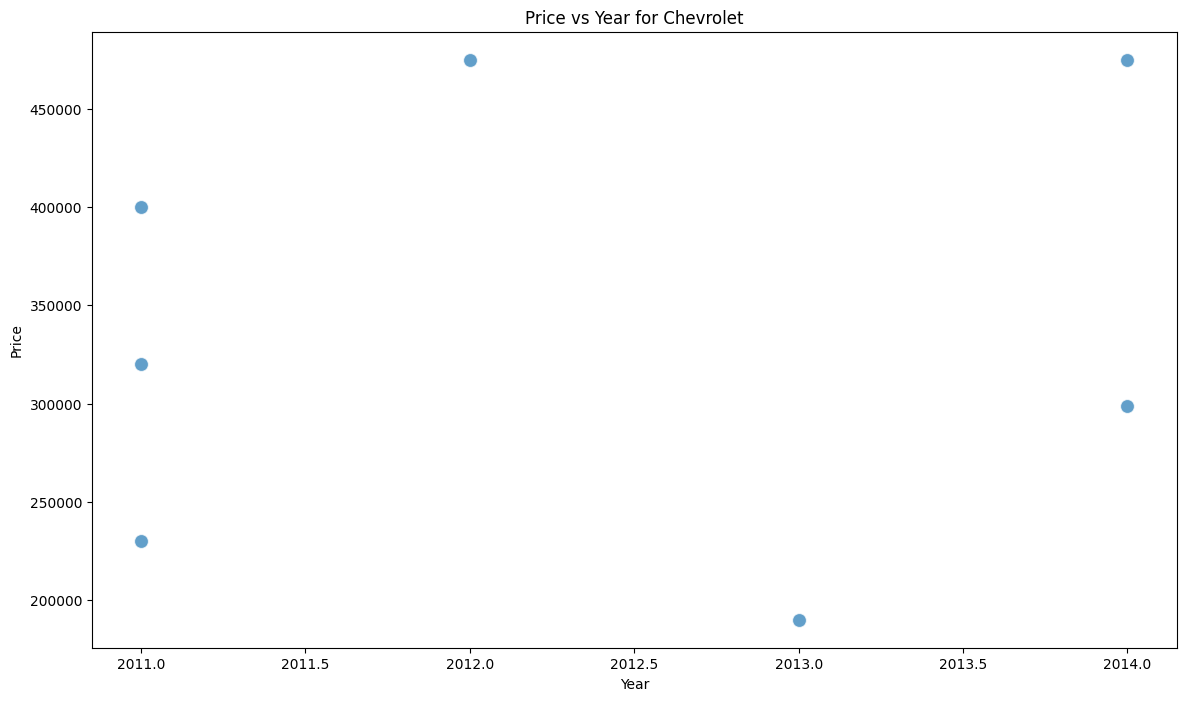

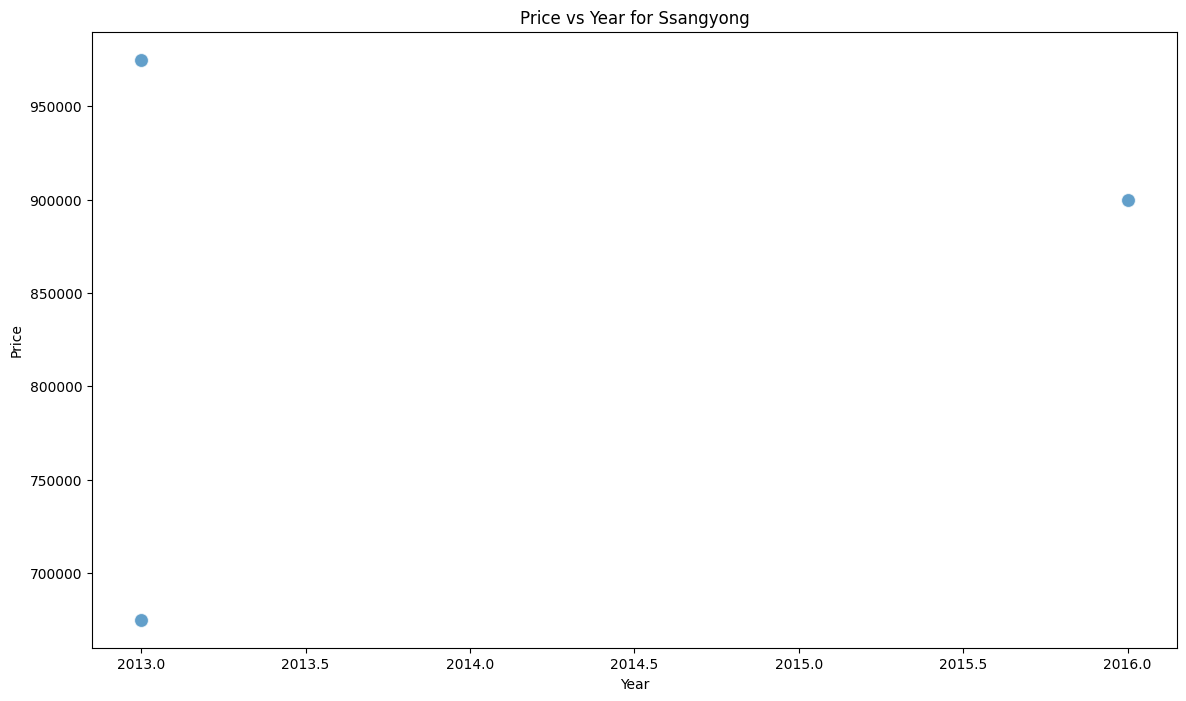

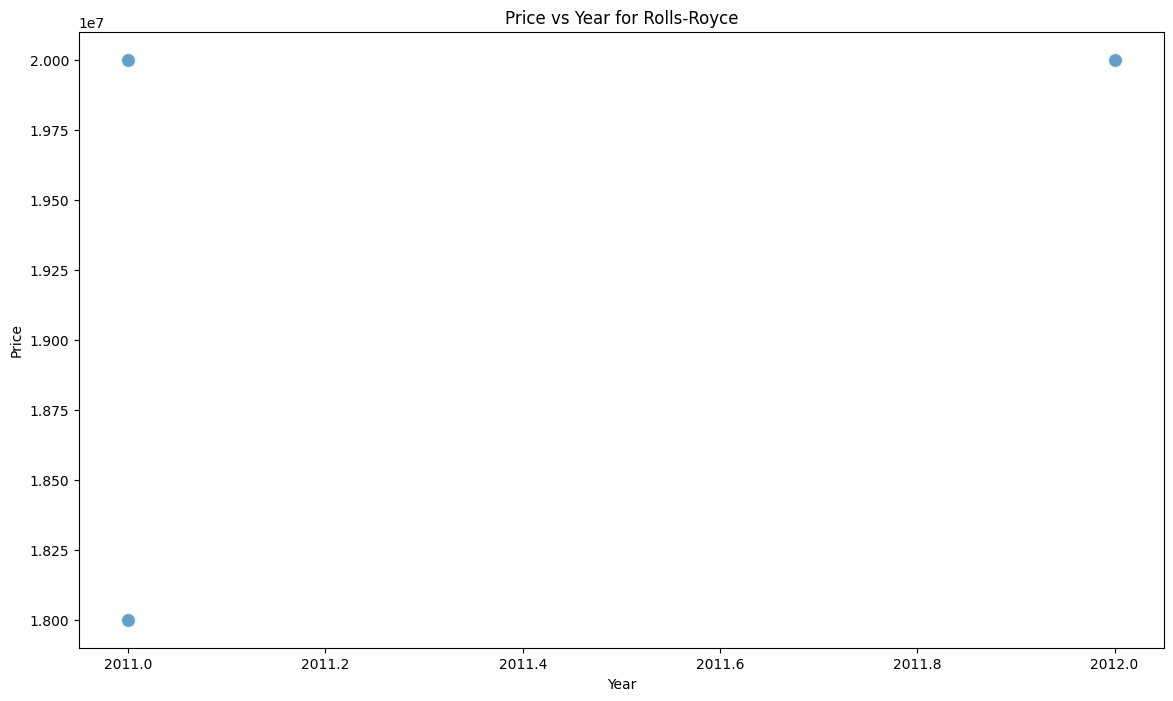

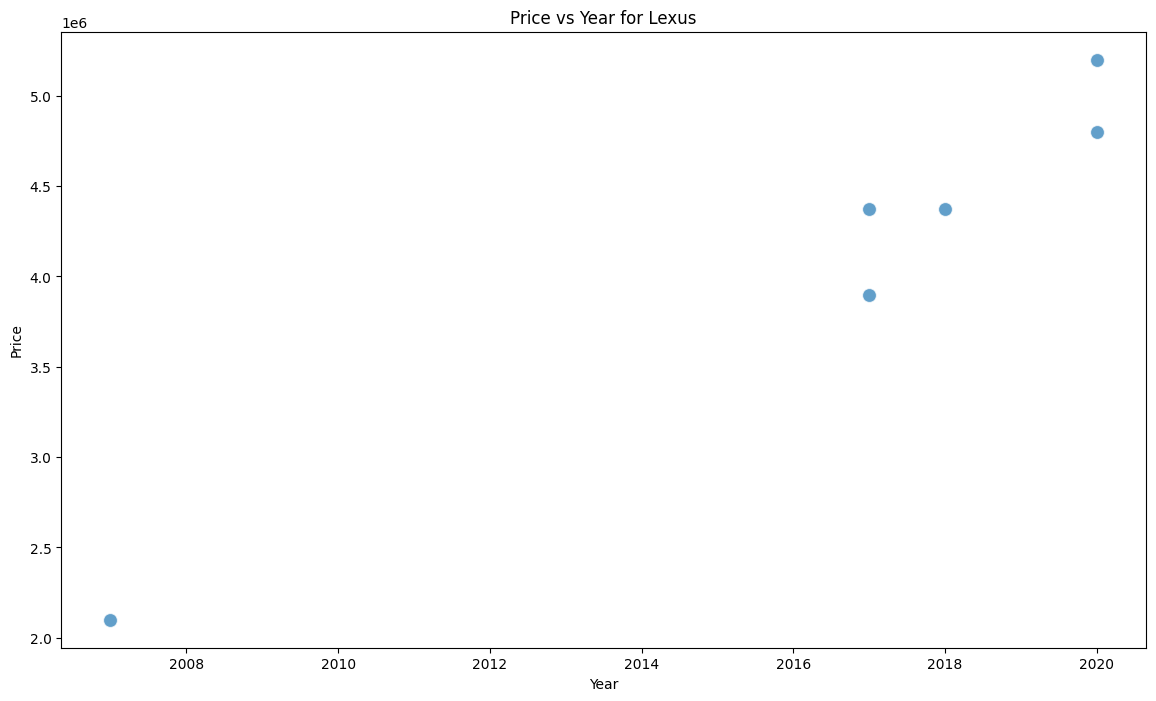

In [104]:
# Get unique car makes
unique_makes = car_details['Make'].unique()

# Create scatter plots for each make
for make in unique_makes:
    plt.figure(figsize=(14, 8))
    sns.scatterplot(x='Year', y='Price', data=car_details[car_details['Make'] == make], s=100, alpha=0.7)
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.title(f'Price vs Year for {make}')
    plt.show()

In [105]:
unique_makes_count = car_details['Make'].nunique()
print(f"Number of unique car makes: {unique_makes_count}")

Number of unique car makes: 33


In [106]:
make_counts = car_details['Make'].value_counts()
print(make_counts)

Maruti Suzuki    440
Hyundai          349
Mercedes-Benz    171
Honda            158
Toyota           132
Audi             127
BMW              121
Mahindra         119
Tata              57
Volkswagen        50
Ford              48
Renault           43
Skoda             40
Land Rover        33
Kia               23
Jeep              18
Jaguar            17
MG                17
Nissan            16
Volvo             16
Porsche           15
MINI              11
Datsun             8
Chevrolet          7
Lexus              6
Mitsubishi         4
Ssangyong          3
Rolls-Royce        3
Isuzu              2
Fiat               2
Maserati           1
Ferrari            1
Lamborghini        1
Name: Make, dtype: int64


In [107]:
# Create a new column 'Make_Category' based on the condition
car_details['Make_Category'] = car_details['Make'].apply(lambda x: x if make_counts[x] > 30 else 'Other')

# Display the first few rows to verify the changes
car_details['Make_Category'].head()

0            Honda
1    Maruti Suzuki
2          Hyundai
3           Toyota
4           Toyota
Name: Make_Category, dtype: object

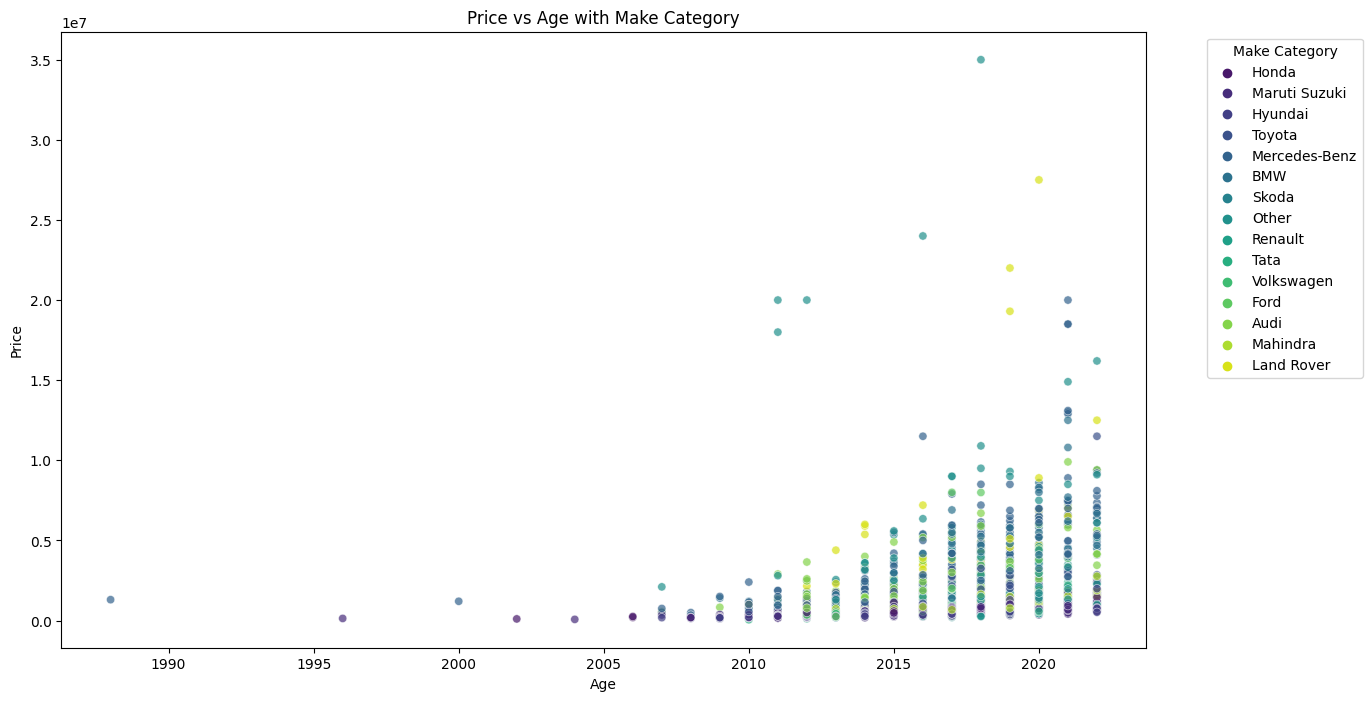

In [108]:
# Check if 'Make_Category' column exists
if 'Make_Category' in car_details.columns:
    plt.figure(figsize=(14, 8))
    sns.scatterplot(x='Year', y='Price', hue='Make_Category', data=car_details, palette='viridis', alpha=0.7)
    plt.xlabel('Age')
    plt.ylabel('Price')
    plt.title('Price vs Age with Make Category')
    plt.legend(title='Make Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
else:
    print("The 'Make_Category' column does not exist in the DataFrame.")

In [109]:
from sklearn.metrics import mean_squared_error
# Create dummy variables for 'Make_Category'
make_category_dummies = pd.get_dummies(car_details['Make_Category'], drop_first=True)

# Combine the dummy variables with the numerical columns
X_combined = pd.concat([numerical_cols[['Year', 'Kilometer', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']], make_category_dummies], axis=1)

# Ensure the indices match
X_combined = X_combined.loc[numerical_cols.index]

# Define the dependent variable
y = numerical_cols['Price']

# Fit the linear regression model
model = LinearRegression()
model.fit(X_combined, y)

# Predict the prices
y_pred = model.predict(X_combined)

# Print the coefficients
print(pd.DataFrame(model.coef_, X_combined.columns, columns=['Coefficients']))

# Print the R-squared value
r_squared = model.score(X_combined, y)
print("R-squared:", r_squared)

# Calculate and print the adjusted R-squared value
n = X_combined.shape[0]
p = X_combined.shape[1]
adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adj_r_squared)

# Calculate and print the mean squared error (MSE)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

                    Coefficients
Year                    0.902213
Kilometer              -0.000044
Length                  0.004141
Width                   0.002786
Height                  0.004025
Seating Capacity        0.401975
Fuel Tank Capacity      0.142127
BMW                     2.777797
Ford                   -8.633048
Honda                 -10.147628
Hyundai               -10.182427
Land Rover              9.164377
Mahindra              -12.292918
Maruti Suzuki         -10.592261
Mercedes-Benz          -0.067265
Other                  -6.457856
Renault               -11.958923
Skoda                  -6.792029
Tata                  -11.239005
Toyota                 -6.307625
Volkswagen             -9.933146
R-squared: 0.7698456348579737
Adjusted R-squared: 0.7669652762954097
Mean Squared Error: 16.941443410028842


['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Color',
       'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque',
       'Drivetrain']

In [110]:
fuel_type_counts = car_details['Fuel Type'].value_counts()
print(fuel_type_counts)

Diesel          1049
Petrol           942
CNG               50
Electric           7
LPG                5
Hybrid             3
CNG + CNG          1
Petrol + CNG       1
Petrol + LPG       1
Name: Fuel Type, dtype: int64


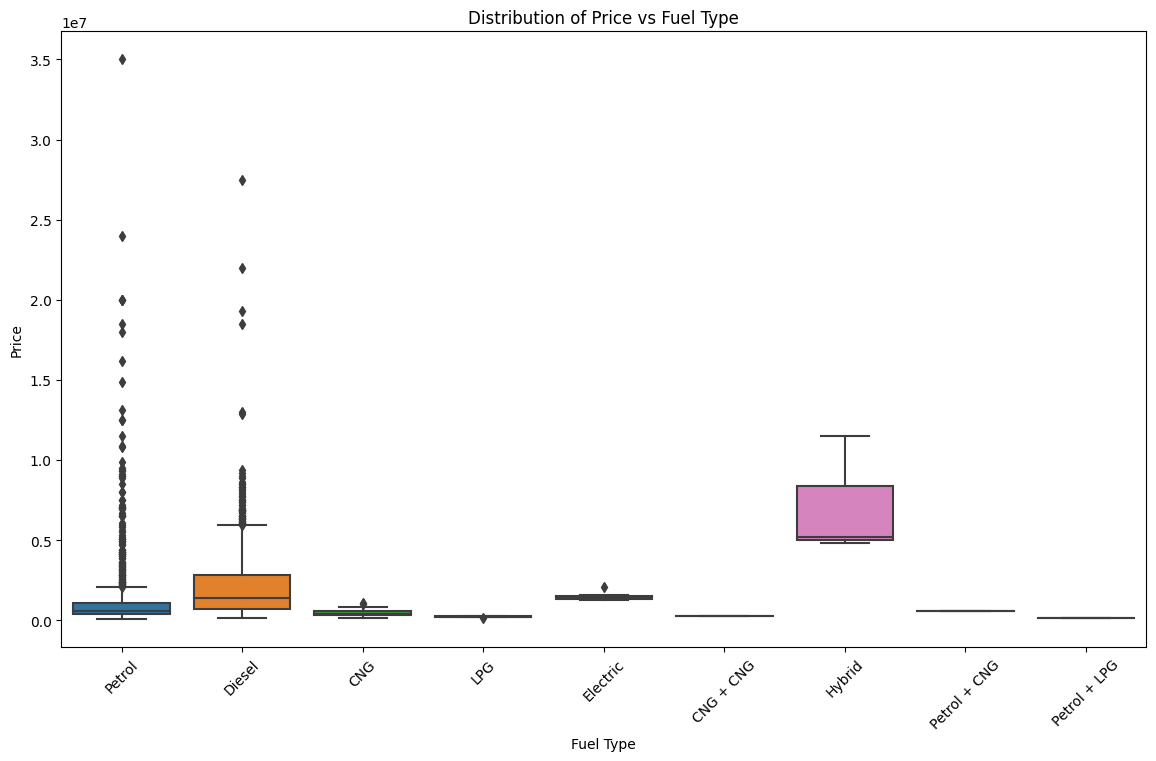

In [111]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Fuel Type', y='Price', data=car_details)
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.title('Distribution of Price vs Fuel Type')
plt.xticks(rotation=45)
plt.show()

In [112]:
# Create a new column 'Fuel_Type_Category' based on the condition
car_details['Fuel_Type_Category'] = car_details['Fuel Type'].apply(lambda x: x if x in ['Petrol', 'Diesel'] else 'Other')

# Display the first few rows to verify the changes
car_details[['Fuel Type', 'Fuel_Type_Category']].head()

Fuel Type Fuel_Type_Category
0    Petrol             Petrol
1    Diesel             Diesel
2    Petrol             Petrol
3    Petrol             Petrol
4    Diesel             Diesel

In [113]:
# Create dummy variables for 'Fuel_Type_Category' and 'Make_Category'
fuel_type_dummies = pd.get_dummies(car_details['Fuel_Type_Category'], drop_first=True)
make_category_dummies = pd.get_dummies(car_details['Make_Category'], drop_first=True)

# Combine the dummy variables with the numerical columns
X_combined_fuel_make = pd.concat([numerical_cols[['Year', 'Kilometer', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']], fuel_type_dummies, make_category_dummies], axis=1)

# Ensure the indices match
X_combined_fuel_make = X_combined_fuel_make.loc[numerical_cols.index]

# Define the dependent variable
y = numerical_cols['Price']

# Fit the linear regression model
model_fuel_make = LinearRegression()
model_fuel_make.fit(X_combined_fuel_make, y)

# Predict the prices
y_pred_fuel_make = model_fuel_make.predict(X_combined_fuel_make)

# Print the coefficients
print(pd.DataFrame(model_fuel_make.coef_, X_combined_fuel_make.columns, columns=['Coefficients']))

# Print the R-squared value
r_squared_fuel_make = model_fuel_make.score(X_combined_fuel_make, y)
print("R-squared:", r_squared_fuel_make)

# Calculate and print the adjusted R-squared value
n = X_combined_fuel_make.shape[0]
p = X_combined_fuel_make.shape[1]
adj_r_squared_fuel_make = 1 - (1 - r_squared_fuel_make) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adj_r_squared_fuel_make)

# Calculate and print the mean squared error (MSE)
mse_fuel_make = mean_squared_error(y, y_pred_fuel_make)
print("Mean Squared Error:", mse_fuel_make)

                    Coefficients
Year                    0.887380
Kilometer              -0.000051
Length                  0.003997
Width                   0.001486
Height                  0.003420
Seating Capacity        0.362954
Fuel Tank Capacity      0.142481
Other                  -1.029362
Petrol                 -1.223520
BMW                     2.764262
Ford                   -8.586524
Honda                  -9.570997
Hyundai                -9.825707
Land Rover              9.414908
Mahindra              -12.120159
Maruti Suzuki         -10.254474
Mercedes-Benz           0.200825
Other                  -6.259523
Renault               -11.622272
Skoda                  -6.296308
Tata                  -10.928229
Toyota                 -5.922117
Volkswagen             -9.527620
R-squared: 0.7726539688728221
Adjusted R-squared: 0.7695340651043704
Mean Squared Error: 16.73472462040409


In [114]:
transmission_counts = car_details['Transmission'].value_counts()
print(transmission_counts)

Manual       1133
Automatic     926
Name: Transmission, dtype: int64


In [115]:
# Create dummy variables for 'Transmission'
transmission_dummies = pd.get_dummies(car_details['Transmission'], drop_first=True)

# Combine the dummy variables with the existing features
X_combined_transmission = pd.concat([X_combined_fuel_make, transmission_dummies], axis=1)

# Ensure the indices match
X_combined_transmission = X_combined_transmission.loc[numerical_cols.index]

# Define the dependent variable
y = numerical_cols['Price']

# Fit the linear regression model
model_transmission = LinearRegression()
model_transmission.fit(X_combined_transmission, y)

# Predict the prices
y_pred_transmission = model_transmission.predict(X_combined_transmission)

# Print the coefficients
print(pd.DataFrame(model_transmission.coef_, X_combined_transmission.columns, columns=['Coefficients']))

# Print the R-squared value
r_squared_transmission = model_transmission.score(X_combined_transmission, y)
print("R-squared:", r_squared_transmission)

# Calculate and print the adjusted R-squared value
n = X_combined_transmission.shape[0]
p = X_combined_transmission.shape[1]
adj_r_squared_transmission = 1 - (1 - r_squared_transmission) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adj_r_squared_transmission)

# Calculate and print the mean squared error (MSE)
mse_transmission = mean_squared_error(y, y_pred_transmission)
print("Mean Squared Error:", mse_transmission)

                    Coefficients
Year                    0.835602
Kilometer              -0.000047
Length                  0.003563
Width                   0.000613
Height                  0.003871
Seating Capacity        0.368444
Fuel Tank Capacity      0.121109
Other                  -1.053631
Petrol                 -1.712553
BMW                     2.775143
Ford                   -6.662580
Honda                  -7.787324
Hyundai                -7.982749
Land Rover              9.288265
Mahindra               -9.888800
Maruti Suzuki          -8.331486
Mercedes-Benz           0.324805
Other                  -5.010966
Renault                -9.672835
Skoda                  -5.439384
Tata                   -9.000068
Toyota                 -4.371942
Volkswagen             -7.786246
Manual                 -3.142206
R-squared: 0.7908822484073514
Adjusted R-squared: 0.7878859343546807
Mean Squared Error: 15.392958341038288


In [116]:
location_counts = car_details['Location'].value_counts()
print(location_counts)

Mumbai              342
Delhi               307
Pune                144
Bangalore           132
Hyderabad           116
                   ... 
Faizabad              1
Pimpri-Chinchwad      1
Rohtak                1
Valsad                1
Siliguri              1
Name: Location, Length: 77, dtype: int64


Mumbai       342
Delhi        307
Pune         144
Bangalore    132
Hyderabad    116
Lucknow       78
Ahmedabad     70
Chennai       63
Kolkata       60
Kanpur        52
Ludhiana      47
Patna         47
Mohali        40
Name: Location, dtype: int64


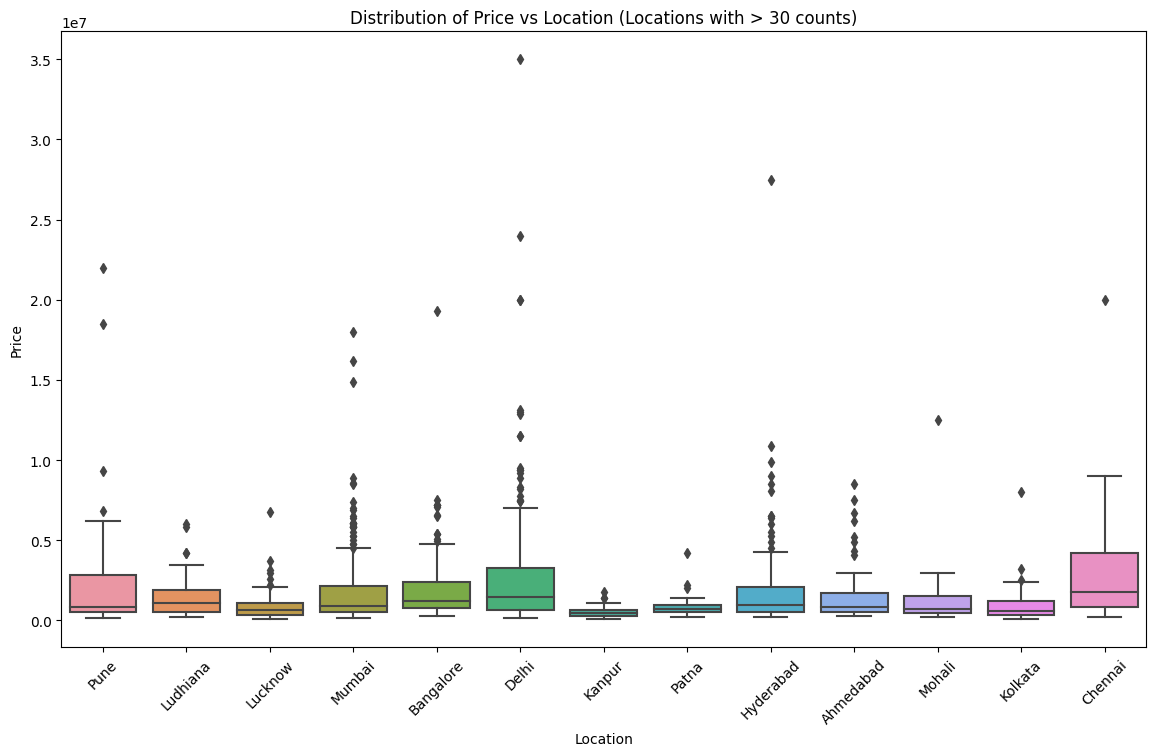

In [ ]:
locations_gt_30 = location_counts[location_counts > 30]
print(locations_gt_30)

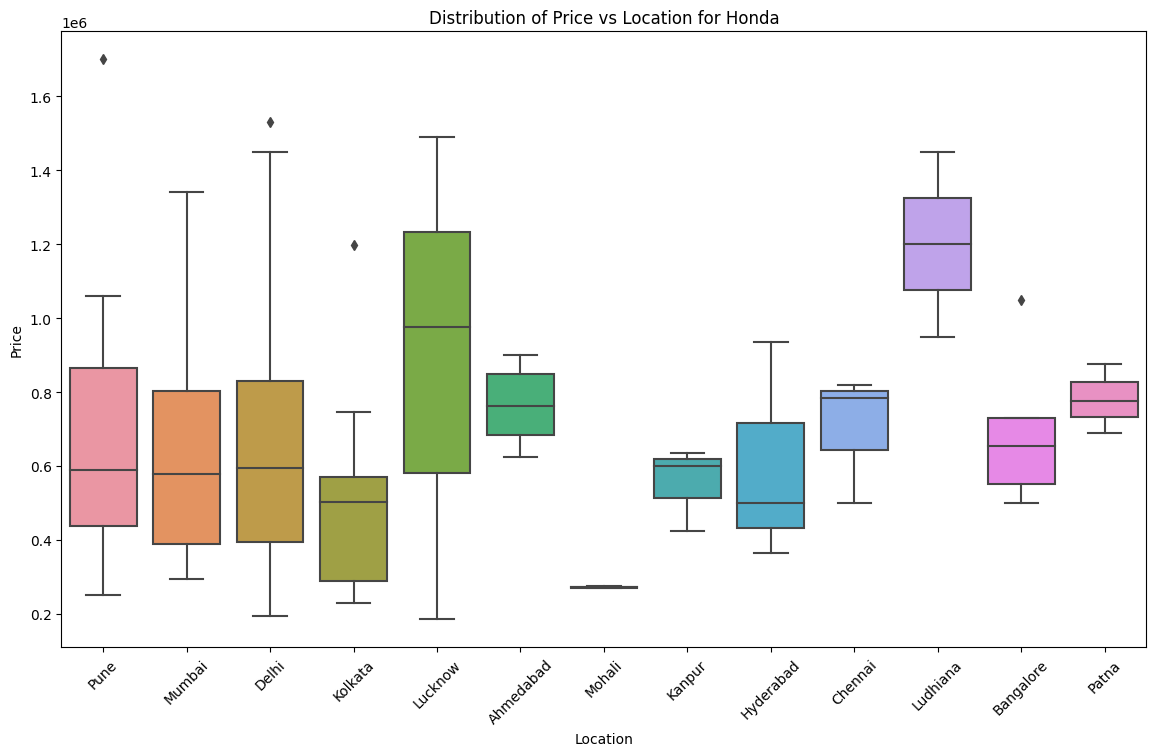

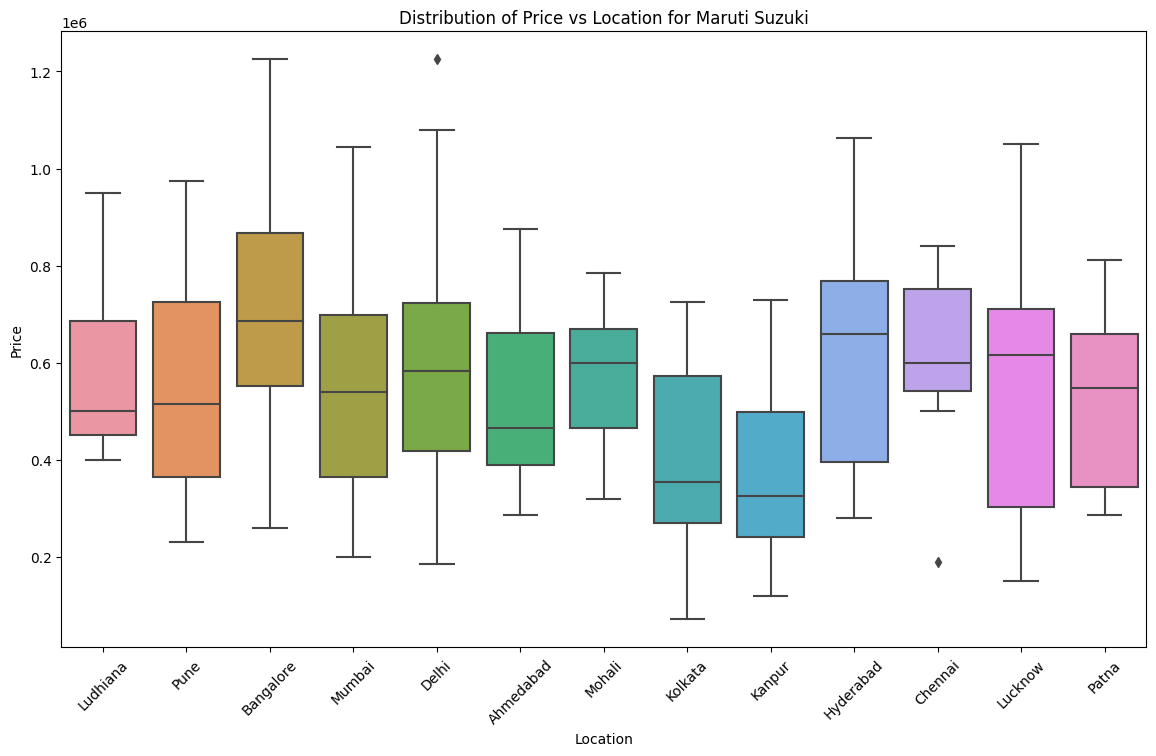

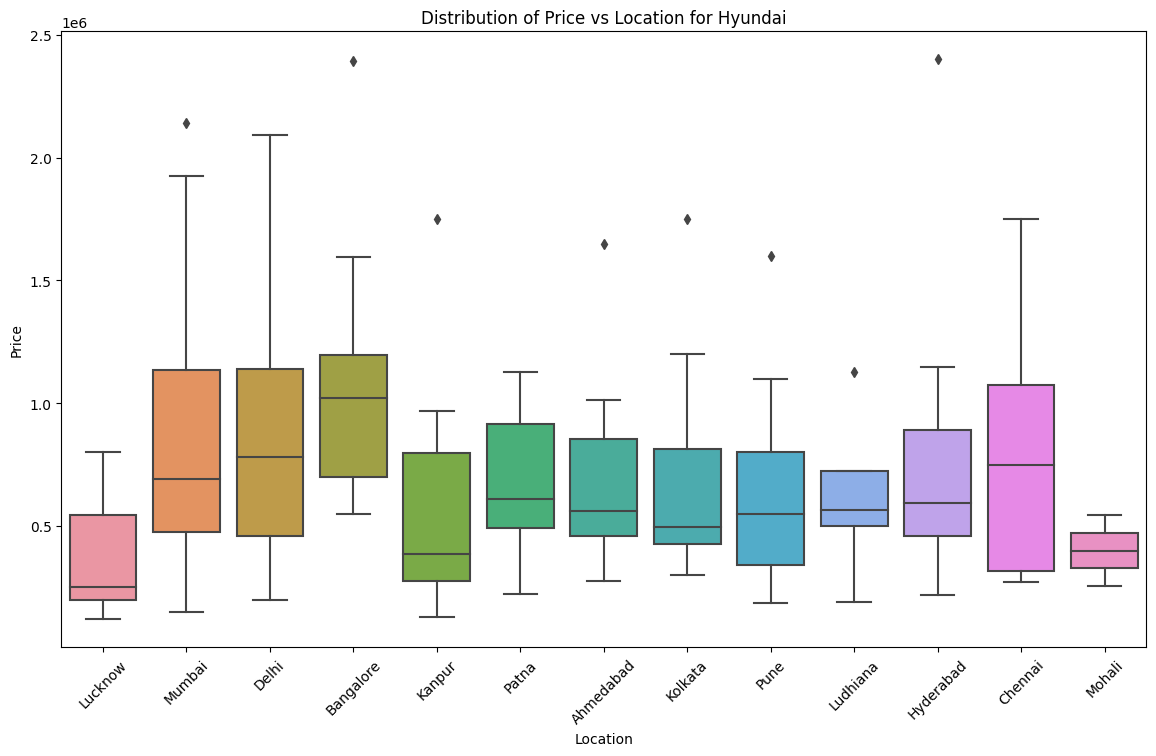

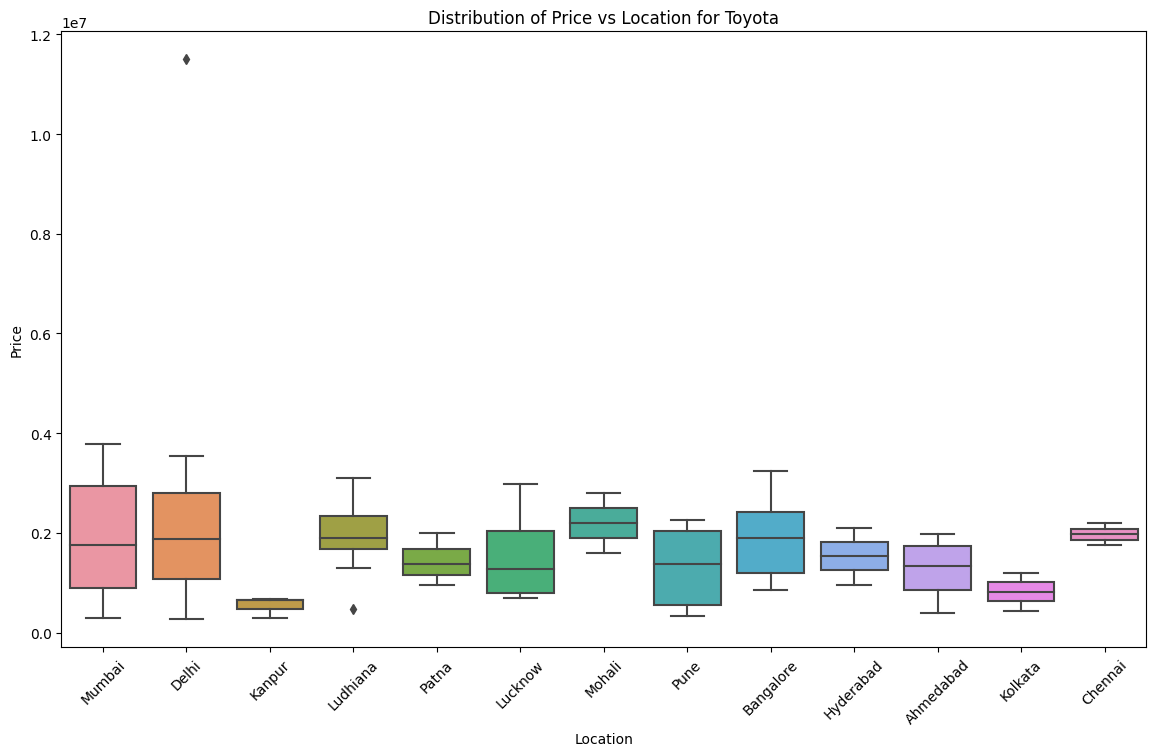

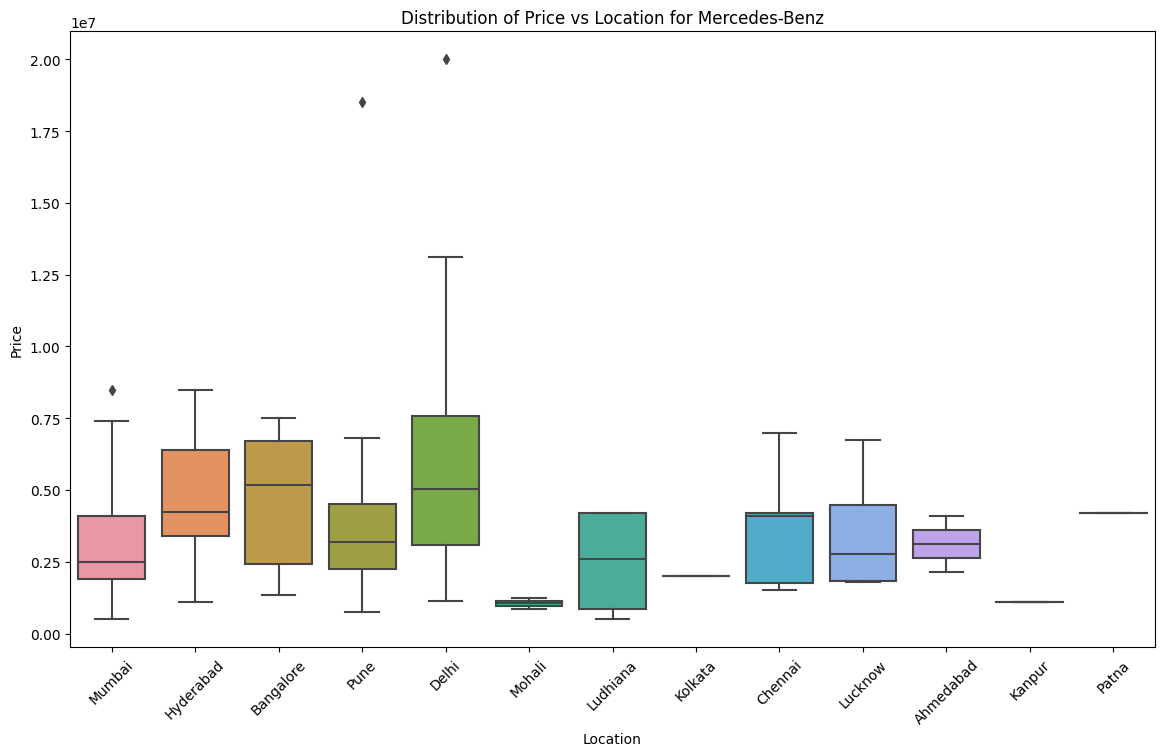

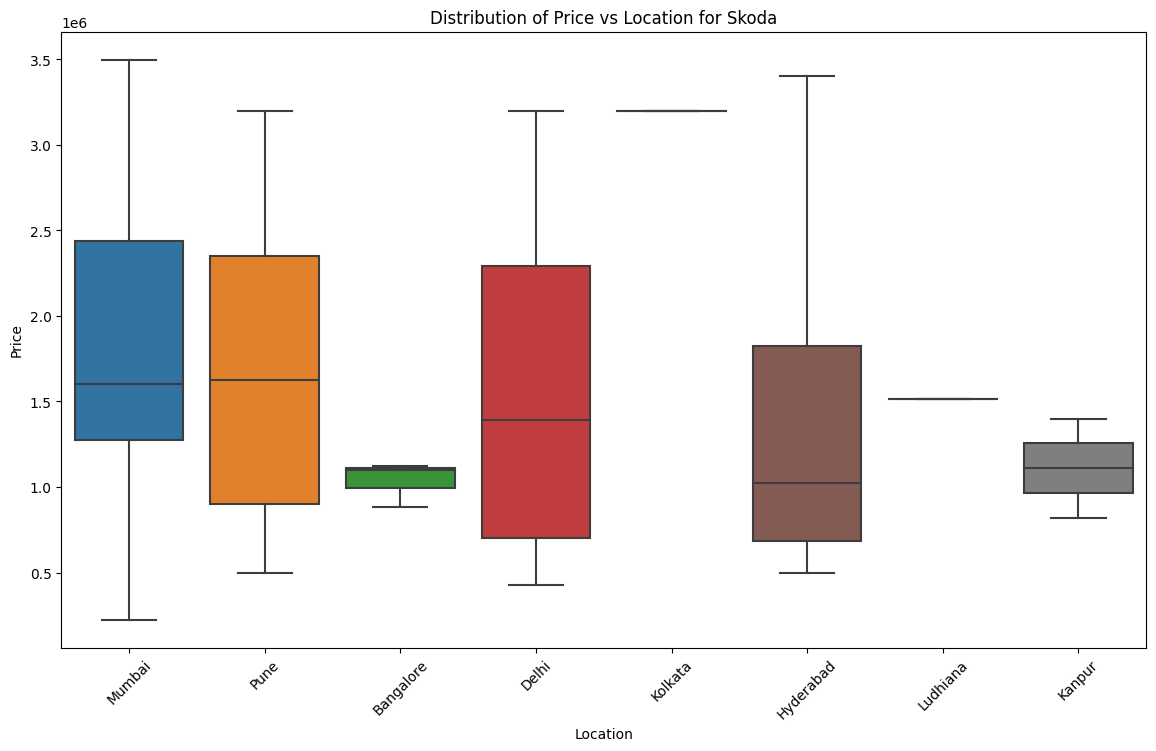

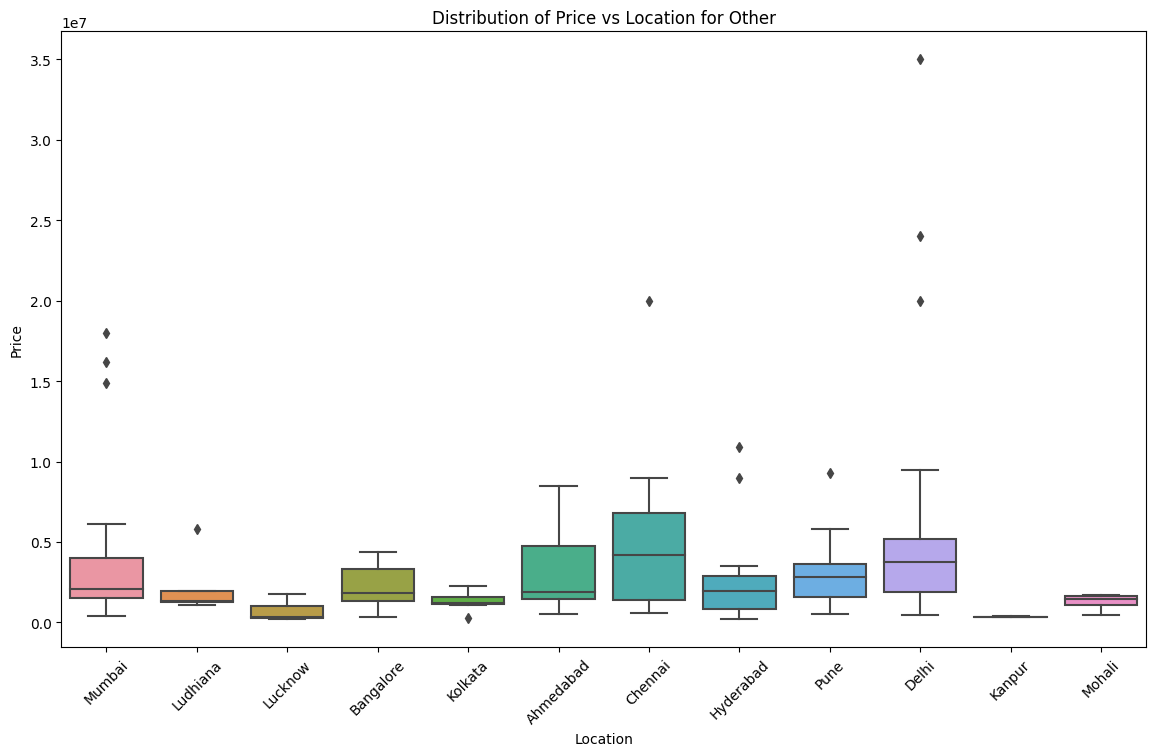

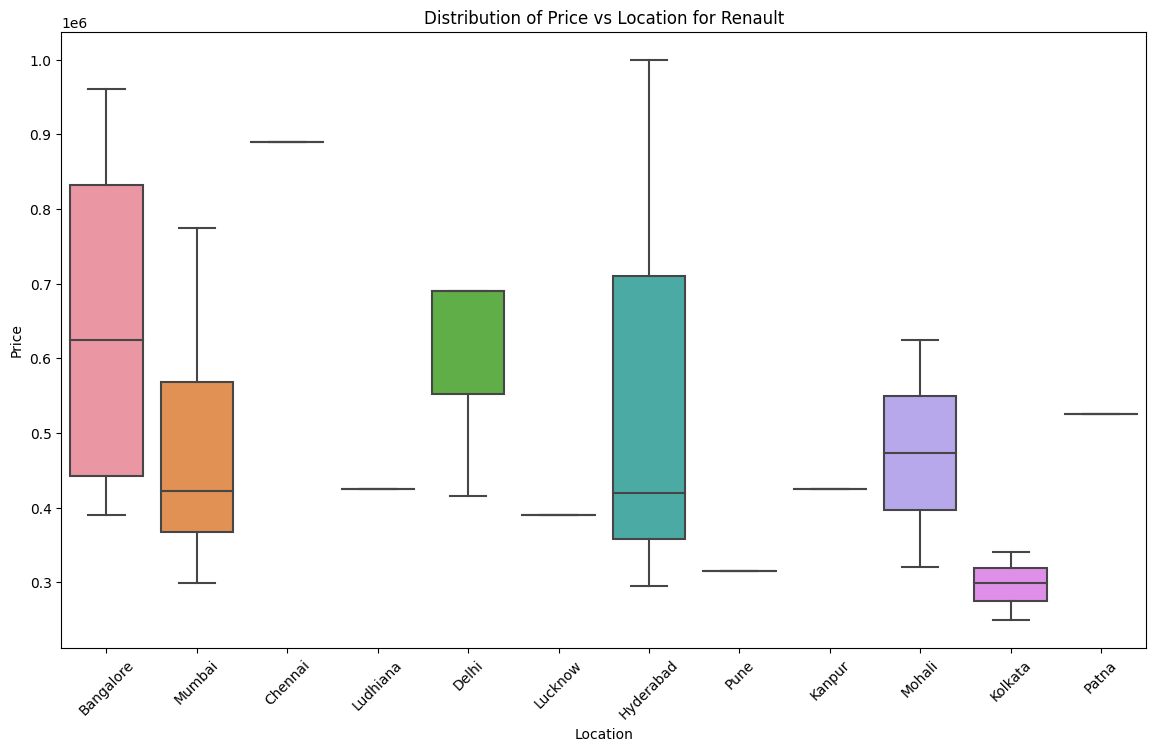

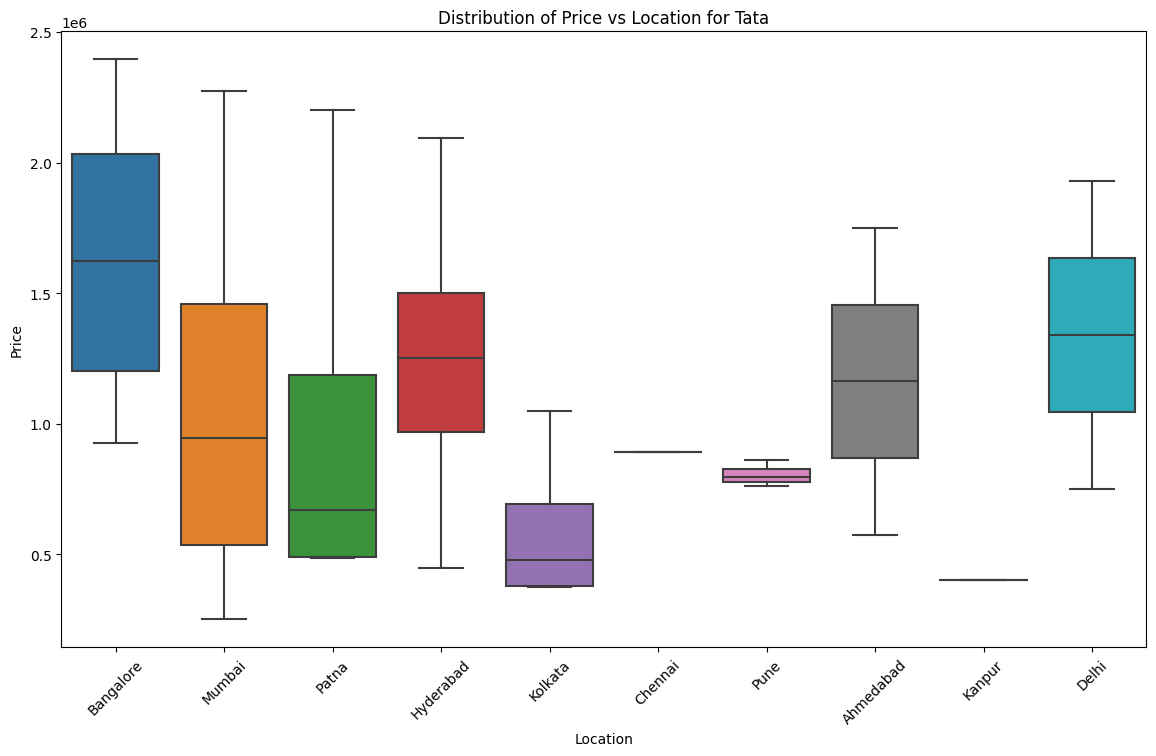

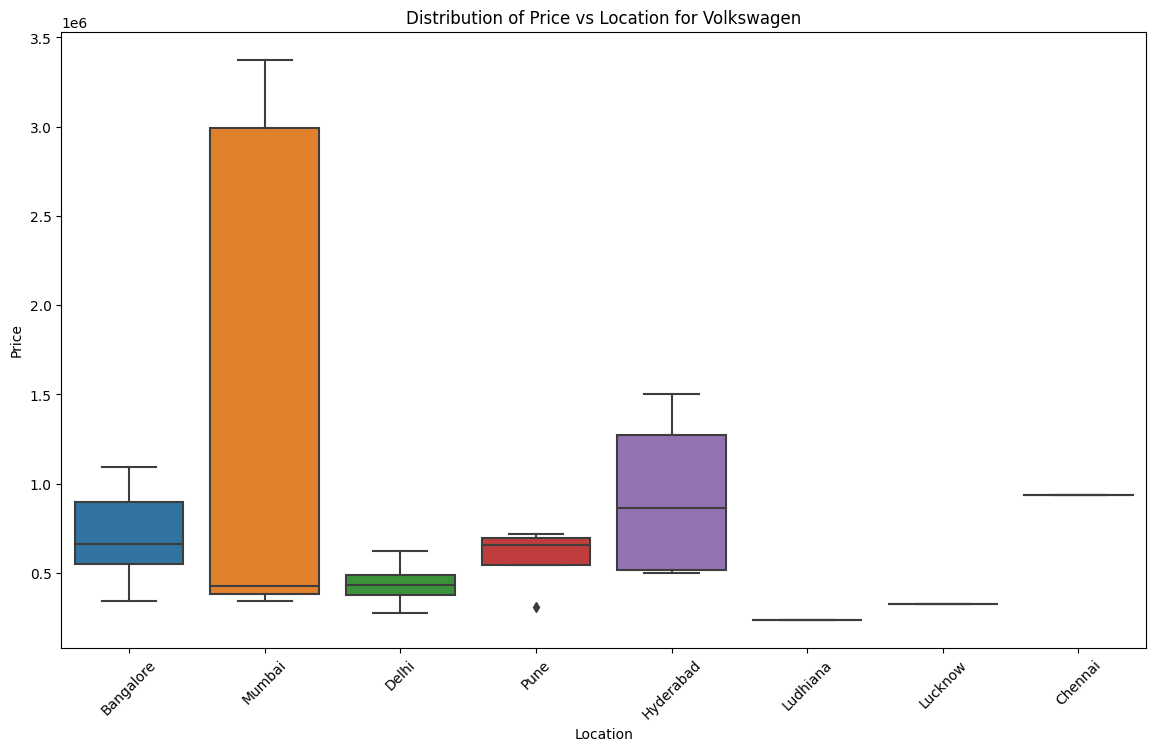

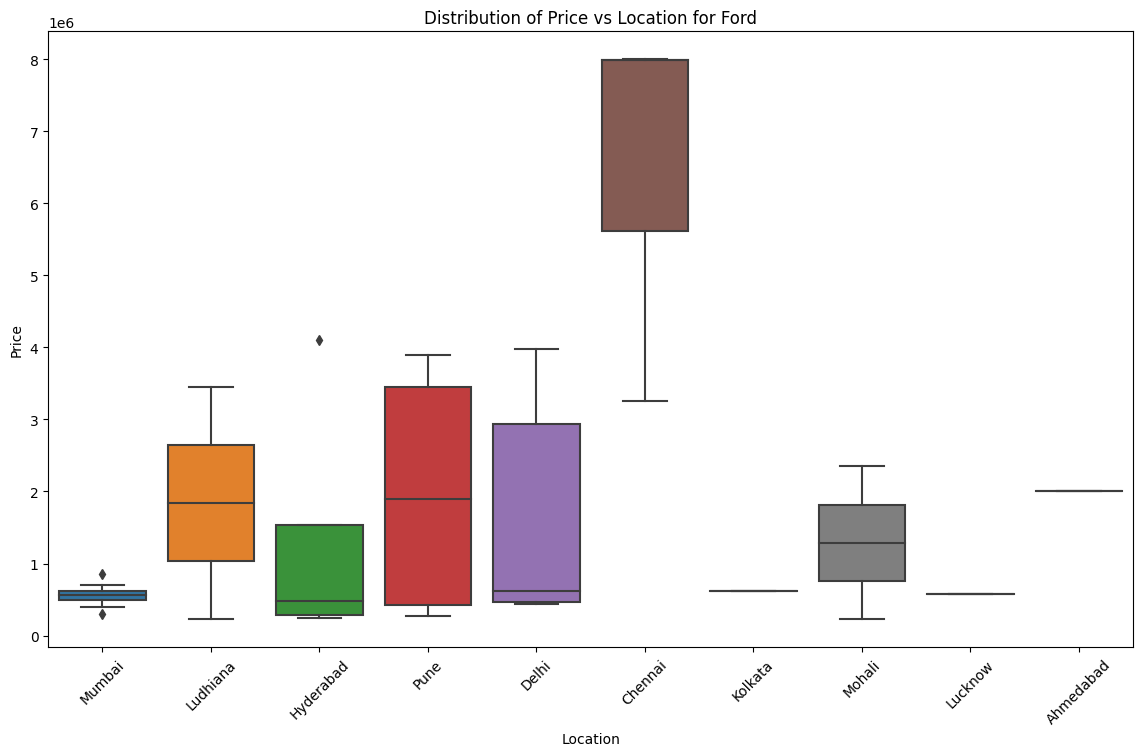

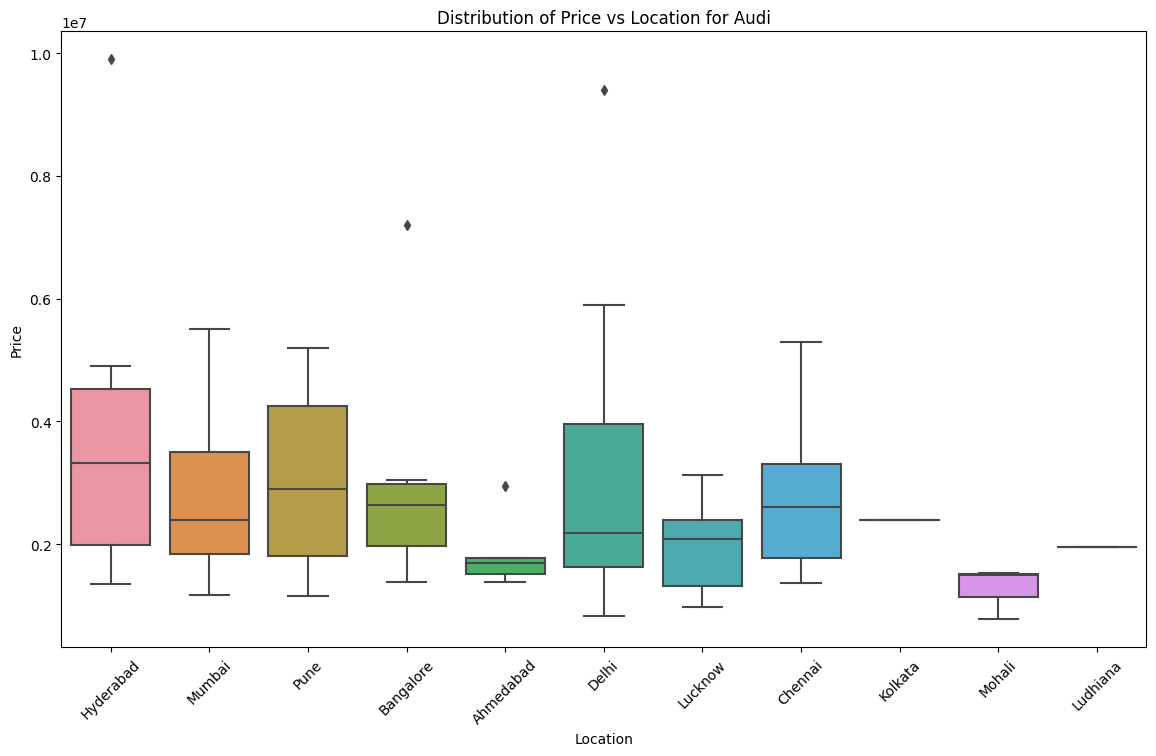

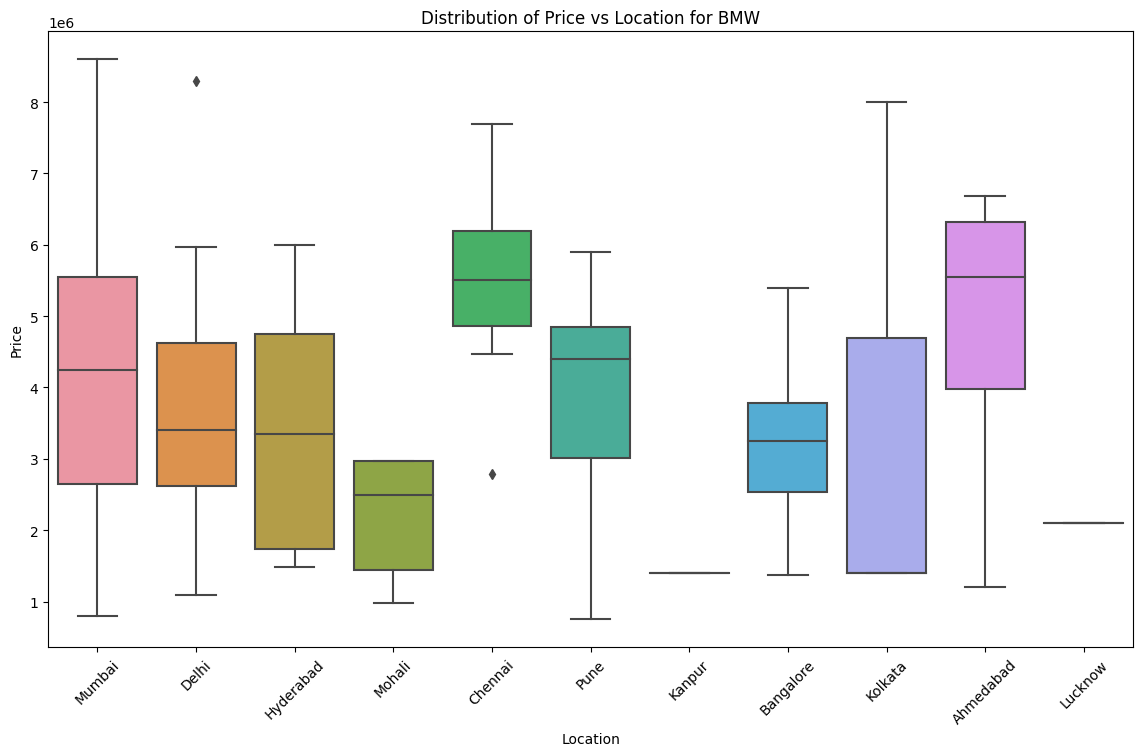

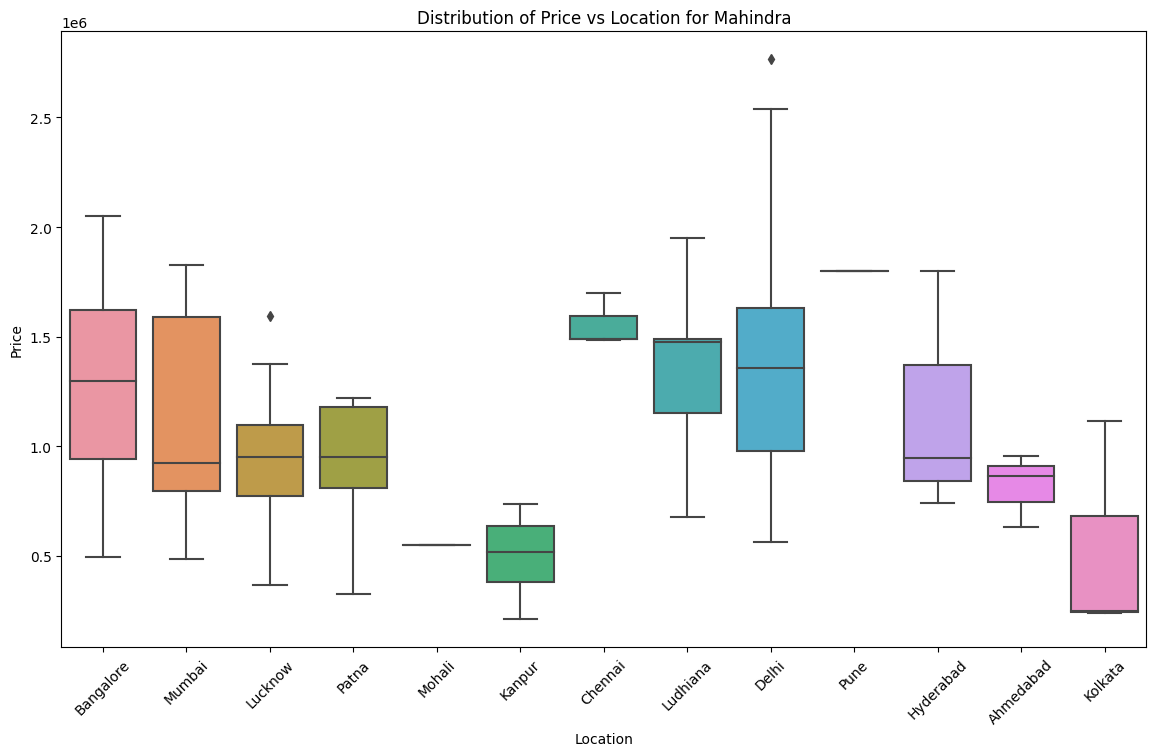

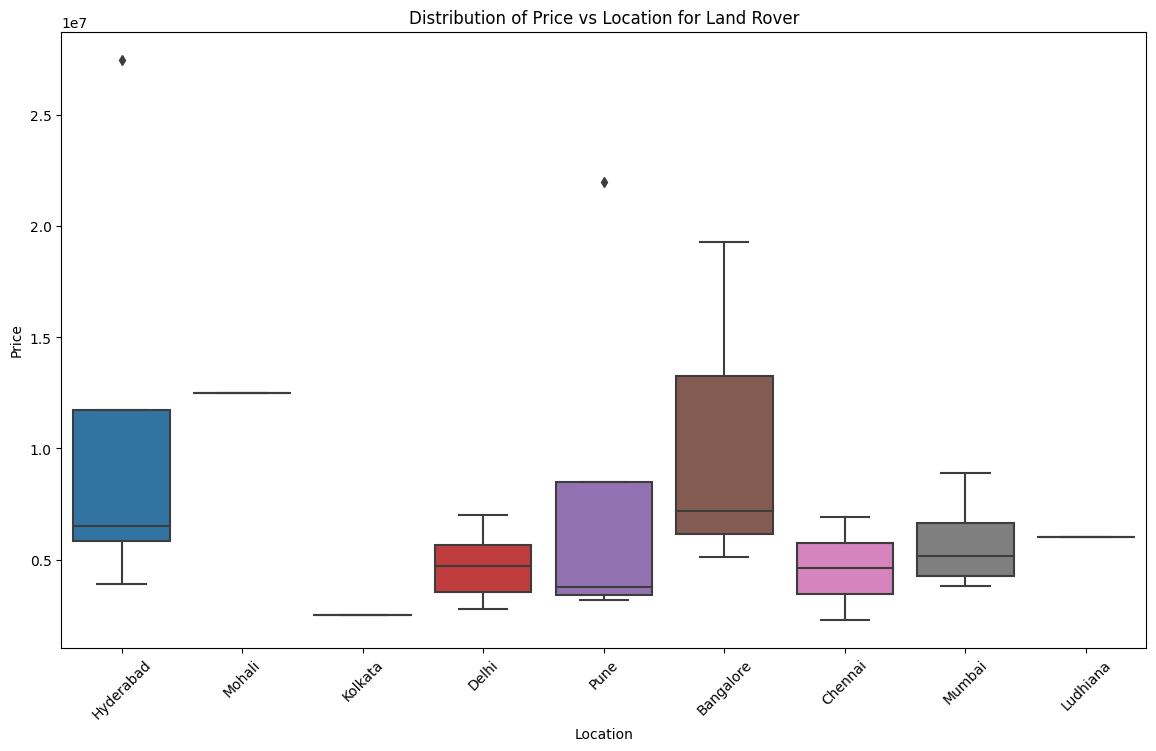

In [117]:

# Plot the distribution of Price vs Make Category for each Make Category
make_categories = filtered_car_details['Make_Category'].unique()

for make_category in make_categories:
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='Location', y='Price', data=filtered_car_details[filtered_car_details['Make_Category'] == make_category])
    plt.xlabel('Location')
    plt.ylabel('Price')
    plt.title(f'Distribution of Price vs Location for {make_category}')
    plt.xticks(rotation=45)
    plt.show()

In [118]:
# Create a new column 'Location_Category' based on the condition
car_details['Location_Category'] = car_details['Location'].apply(lambda x: x if location_counts[x] > 30 else 'Other')

# Display the first few rows to verify the changes
car_details[['Location', 'Location_Category']].head()


Location Location_Category
0       Pune              Pune
1   Ludhiana          Ludhiana
2    Lucknow           Lucknow
3  Mangalore             Other
4     Mumbai            Mumbai

In [119]:
# Create dummy variables for 'Location_Category'
location_category_dummies = pd.get_dummies(car_details['Location_Category'], drop_first=True)

# Combine the dummy variables with the existing features
X_combined_location = pd.concat([X_combined_transmission, location_category_dummies], axis=1)

# Ensure the indices match
X_combined_location = X_combined_location.loc[numerical_cols.index]

# Define the dependent variable
y = numerical_cols['Price']

# Fit the linear regression model
model_location = LinearRegression()
model_location.fit(X_combined_location, y)

# Predict the prices
y_pred_location = model_location.predict(X_combined_location)

# Print the coefficients
print(pd.DataFrame(model_location.coef_, X_combined_location.columns, columns=['Coefficients']))

# Print the R-squared value
r_squared_location = model_location.score(X_combined_location, y)
print("R-squared:", r_squared_location)

# Calculate and print the adjusted R-squared value
n = X_combined_location.shape[0]
p = X_combined_location.shape[1]
adj_r_squared_location = 1 - (1 - r_squared_location) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adj_r_squared_location)

# Calculate and print the mean squared error (MSE)
mse_location = mean_squared_error(y, y_pred_location)
print("Mean Squared Error:", mse_location)

                    Coefficients
Year                    0.824549
Kilometer              -0.000050
Length                  0.003608
Width                   0.000518
Height                  0.003841
Seating Capacity        0.389742
Fuel Tank Capacity      0.123445
Other                  -1.093333
Petrol                 -1.782558
BMW                     2.782041
Ford                   -6.638389
Honda                  -7.588223
Hyundai                -7.836433
Land Rover              9.377401
Mahindra               -9.721505
Maruti Suzuki          -8.235473
Mercedes-Benz           0.334848
Other                  -4.900004
Renault                -9.513254
Skoda                  -5.456434
Tata                   -8.809429
Toyota                 -4.308021
Volkswagen             -8.005069
Manual                 -2.999063
Bangalore               1.731395
Chennai                 1.507108
Delhi                   0.802754
Hyderabad               1.605637
Kanpur                  0.554987
Kolkata   

In [120]:
print(categorical_cols.columns)

Index(['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Color',
       'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque',
       'Drivetrain', 'Make_Category', 'Fuel_Type_Category',
       'Location_Category'],
      dtype='object')


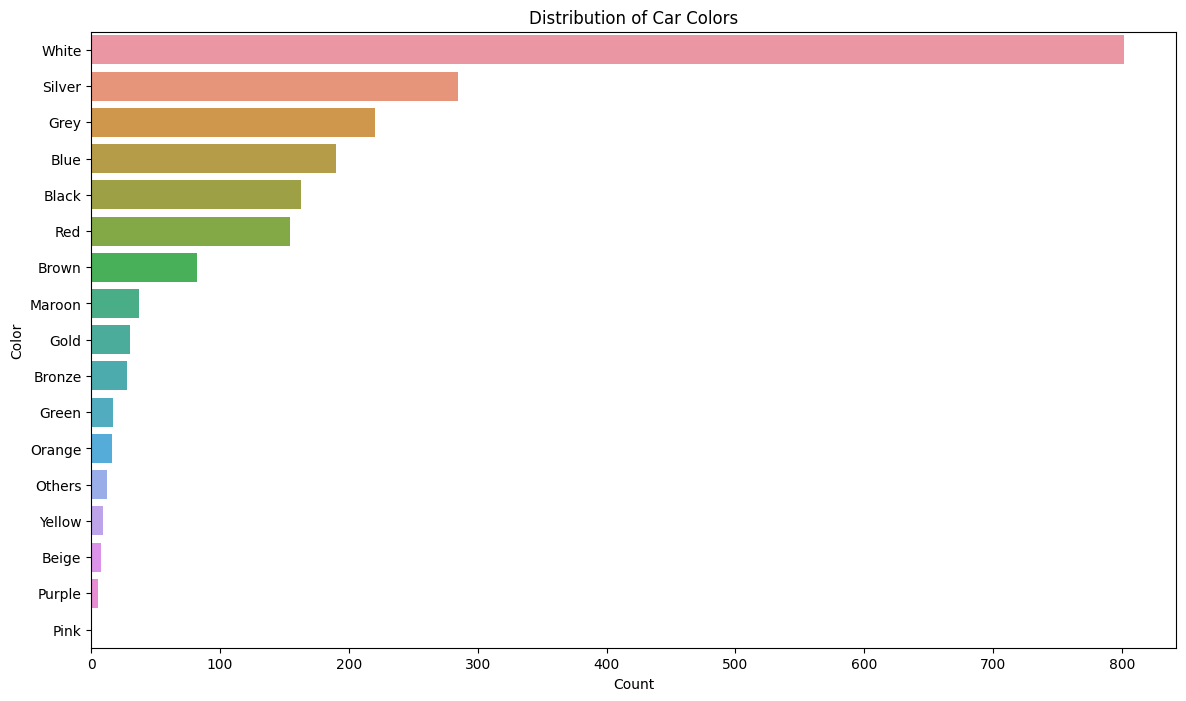

In [121]:
plt.figure(figsize=(14, 8))
sns.countplot(y='Color', data=car_details, order=car_details['Color'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Color')
plt.title('Distribution of Car Colors')
plt.show()

In [124]:
color_counts = car_details['Color'].value_counts()
print(color_counts)

White     802
Silver    285
Grey      220
Blue      190
Black     163
Red       154
Brown      82
Maroon     37
Gold       30
Bronze     28
Green      17
Orange     16
Others     12
Yellow      9
Beige       8
Purple      5
Pink        1
Name: Color, dtype: int64


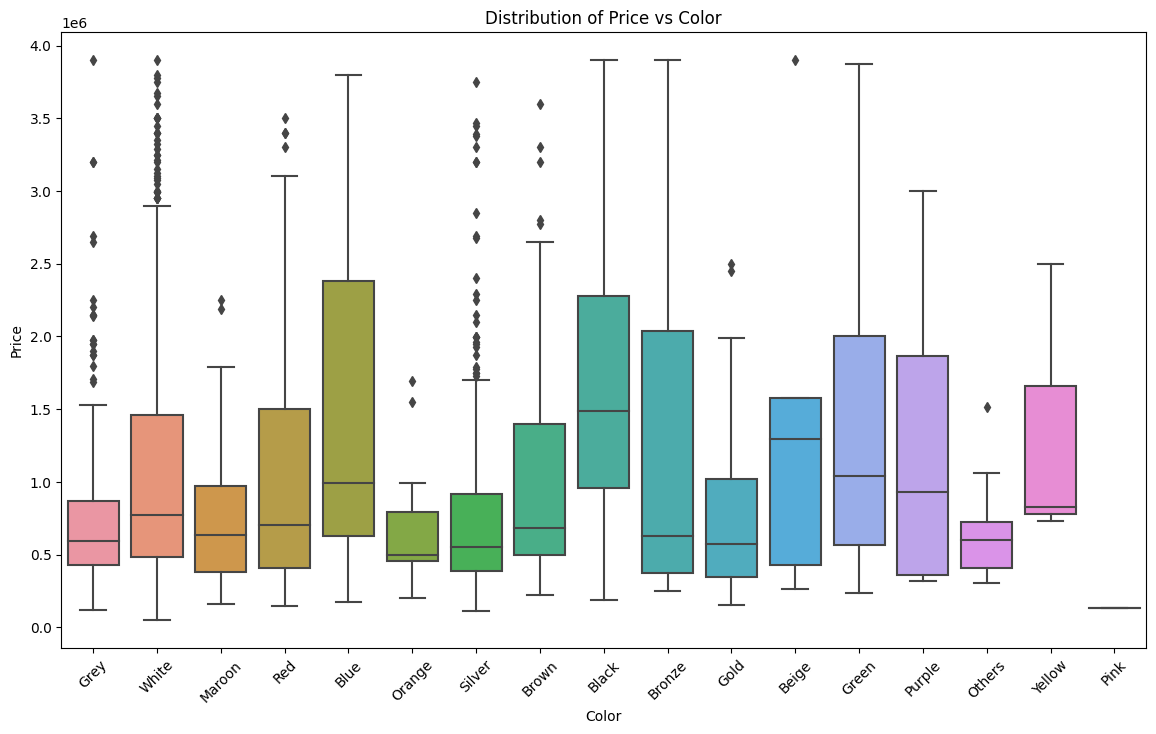

In [123]:
# Filter car_details to include only the records that are in numerical_cols
filtered_car_details = car_details.loc[numerical_cols.index]

# Plot the distribution of Price vs Color
plt.figure(figsize=(14, 8))
sns.boxplot(x='Color', y='Price', data=filtered_car_details)
plt.xlabel('Color')
plt.ylabel('Price')
plt.title('Distribution of Price vs Color')
plt.xticks(rotation=45)
plt.show()

In [127]:
# Create a new column 'Color_Category' based on the condition
car_details['Color_Category'] = car_details['Color'].apply(lambda x: x if color_counts[x] > 100 else 'Other')

# Display the first few rows to verify the changes
car_details[['Color', 'Color_Category']].head()

Color Color_Category
0    Grey           Grey
1   White          White
2  Maroon          Other
3     Red            Red
4    Grey           Grey

In [129]:
# Create dummy variables for 'Color_Category'
color_category_dummies = pd.get_dummies(car_details['Color'], drop_first=True)

# Combine the dummy variables with the existing features
X_combined_color = pd.concat([X_combined_location, color_category_dummies], axis=1)

# Ensure the indices match
X_combined_color = X_combined_color.loc[numerical_cols.index]

# Define the dependent variable
y = numerical_cols['Price']

# Fit the linear regression model
model_color = LinearRegression()
model_color.fit(X_combined_color, y)

# Predict the prices
y_pred_color = model_color.predict(X_combined_color)

# Print the coefficients
print(pd.DataFrame(model_color.coef_, X_combined_color.columns, columns=['Coefficients']))

# Print the R-squared value
r_squared_color = model_color.score(X_combined_color, y)
print("R-squared:", r_squared_color)

# Calculate and print the adjusted R-squared value
n = X_combined_color.shape[0]
p = X_combined_color.shape[1]
adj_r_squared_color = 1 - (1 - r_squared_color) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adj_r_squared_color)

# Calculate and print the mean squared error (MSE)
mse_color = mean_squared_error(y, y_pred_color)
print("Mean Squared Error:", mse_color)

                    Coefficients
Year                    0.826272
Kilometer              -0.000049
Length                  0.003524
Width                   0.000384
Height                  0.003648
Seating Capacity        0.407949
Fuel Tank Capacity      0.123838
Other                  -1.081279
Petrol                 -1.788940
BMW                     2.688153
Ford                   -6.486938
Honda                  -7.445404
Hyundai                -7.692130
Land Rover              9.406057
Mahindra               -9.816550
Maruti Suzuki          -8.141399
Mercedes-Benz           0.471033
Other                  -4.899523
Renault                -9.549421
Skoda                  -5.345341
Tata                   -8.776922
Toyota                 -4.237564
Volkswagen             -7.844140
Manual                 -2.897234
Bangalore               1.751461
Chennai                 1.602732
Delhi                   0.835171
Hyderabad               1.646884
Kanpur                  0.457197
Kolkata   

In [130]:
categorical_columns = car_details.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Color',
       'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque',
       'Drivetrain', 'Make_Category', 'Fuel_Type_Category',
       'Location_Category', 'Color_Category'],
      dtype='object')


In [131]:
for column in categorical_cols.columns:
    print(f"Value counts for {column}:\n{categorical_cols[column].value_counts()}\n")

Value counts for Make:
Maruti Suzuki    440
Hyundai          349
Mercedes-Benz    171
Honda            158
Toyota           132
Audi             127
BMW              121
Mahindra         119
Tata              57
Volkswagen        50
Ford              48
Renault           43
Skoda             40
Land Rover        33
Kia               23
Jeep              18
Jaguar            17
MG                17
Nissan            16
Volvo             16
Porsche           15
MINI              11
Datsun             8
Chevrolet          7
Lexus              6
Mitsubishi         4
Ssangyong          3
Rolls-Royce        3
Isuzu              2
Fiat               2
Maserati           1
Ferrari            1
Lamborghini        1
Name: Make, dtype: int64

Value counts for Model:
X1 sDrive20d xLine                 15
Swift DZire VDI                    14
City V                             13
Fortuner 2.8 4x2 AT [2016-2020]    13
Swift DZire VXI                    12
                                   ..
XF R 5

In [132]:
# Create dummy variables for 'Drivetrain', 'Owner', and 'Seller Type'
drivetrain_dummies = pd.get_dummies(car_details['Drivetrain'], drop_first=True)
owner_dummies = pd.get_dummies(car_details['Owner'], drop_first=True)
seller_type_dummies = pd.get_dummies(car_details['Seller Type'], drop_first=True)

# Combine the dummy variables with the existing features
X_combined_dummies = pd.concat([X_combined_color, drivetrain_dummies, owner_dummies, seller_type_dummies], axis=1)

# Ensure the indices match
X_combined_dummies = X_combined_dummies.loc[numerical_cols.index]

# Define the dependent variable
y = numerical_cols['Price']

# Fit the linear regression model
model_dummies = LinearRegression()
model_dummies.fit(X_combined_dummies, y)

# Predict the prices
y_pred_dummies = model_dummies.predict(X_combined_dummies)

# Print the coefficients
print(pd.DataFrame(model_dummies.coef_, X_combined_dummies.columns, columns=['Coefficients']))

# Print the R-squared value
r_squared_dummies = model_dummies.score(X_combined_dummies, y)
print("R-squared:", r_squared_dummies)

# Calculate and print the adjusted R-squared value
n = X_combined_dummies.shape[0]
p = X_combined_dummies.shape[1]
adj_r_squared_dummies = 1 - (1 - r_squared_dummies) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adj_r_squared_dummies)

# Calculate and print the mean squared error (MSE)
mse_dummies = mean_squared_error(y, y_pred_dummies)
print("Mean Squared Error:", mse_dummies)

                  Coefficients
Year                  0.880572
Kilometer            -0.000046
Length                0.003772
Width                 0.001749
Height               -0.000806
...                        ...
Second               -1.652563
Third                -1.466179
UnRegistered Car     -3.399291
Corporate             2.630866
Individual            1.467476

[62 rows x 1 columns]
R-squared: 0.8086543754215715
Adjusted R-squared: 0.8014073206116371
Mean Squared Error: 14.084769013838448


In [143]:
# Calculate the mode of the 'Engine' column
engine_mode = car_details['Engine'].mode()[0]

# Replace null values in the 'Engine' column with the mode
car_details['Engine'].fillna(engine_mode, inplace=True)

# Display the first few rows to verify the changes
car_details[['Engine']].head()

Engine
0  1198 cc
1  1248 cc
2  1197 cc
3  1197 cc
4  2393 cc

In [145]:
# Calculate the mode of the 'Max Power' column
max_power_mode = car_details['Max Power'].mode()[0]

# Replace null values in the 'Max Power' column with the mode
car_details['Max Power'].fillna(max_power_mode, inplace=True)

# Display the first few rows to verify the changes
car_details[['Max Power']].head()

Max Power
0   87 bhp @ 6000 rpm
1   74 bhp @ 4000 rpm
2   79 bhp @ 6000 rpm
3   82 bhp @ 6000 rpm
4  148 bhp @ 3400 rpm

In [147]:
# Calculate the mode of the 'Max Torque' column
max_torque_mode = car_details['Max Torque'].mode()[0]

# Replace null values in the 'Max Torque' column with the mode
car_details['Max Torque'].fillna(max_torque_mode, inplace=True)

# Display the first few rows to verify the changes
car_details[['Max Torque']].head()

Max Torque
0       109 Nm @ 4500 rpm
1       190 Nm @ 2000 rpm
2  112.7619 Nm @ 4000 rpm
3       113 Nm @ 4200 rpm
4       343 Nm @ 1400 rpm

In [148]:
# Filter values based on their counts
engine_counts = car_details['Engine'].value_counts()
max_power_counts = car_details['Max Power'].value_counts()
max_torque_counts = car_details['Max Torque'].value_counts()

# Replace values with "Other" if their count is less than or equal to 30
car_details['Engine_Category'] = car_details['Engine'].apply(lambda x: x if engine_counts[x] > 30 else 'Other')
car_details['Max_Power_Category'] = car_details['Max Power'].apply(lambda x: x if max_power_counts[x] > 30 else 'Other')
car_details['Max_Torque_Category'] = car_details['Max Torque'].apply(lambda x: x if max_torque_counts[x] > 30 else 'Other')

# Create dummy variables
engine_dummies = pd.get_dummies(car_details['Engine_Category'], drop_first=True)
max_power_dummies = pd.get_dummies(car_details['Max_Power_Category'], drop_first=True)
max_torque_dummies = pd.get_dummies(car_details['Max_Torque_Category'], drop_first=True)

# Combine the dummy variables with the existing features
X_combined_engine_power_torque = pd.concat([X_combined_dummies, engine_dummies, max_power_dummies, max_torque_dummies], axis=1)

# Ensure the indices match
X_combined_engine_power_torque = X_combined_engine_power_torque.loc[numerical_cols.index]

# Define the dependent variable
y = numerical_cols['Price']

# Fit the linear regression model
model_engine_power_torque = LinearRegression()
model_engine_power_torque.fit(X_combined_engine_power_torque, y)

# Predict the prices
y_pred_engine_power_torque = model_engine_power_torque.predict(X_combined_engine_power_torque)

# Print the coefficients
print(pd.DataFrame(model_engine_power_torque.coef_, X_combined_engine_power_torque.columns, columns=['Coefficients']))

# Print the R-squared value
r_squared_engine_power_torque = model_engine_power_torque.score(X_combined_engine_power_torque, y)
print("R-squared:", r_squared_engine_power_torque)

# Calculate and print the adjusted R-squared value
n = X_combined_engine_power_torque.shape[0]
p = X_combined_engine_power_torque.shape[1]
adj_r_squared_engine_power_torque = 1 - (1 - r_squared_engine_power_torque) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adj_r_squared_engine_power_torque)

# Calculate and print the mean squared error (MSE)
mse_engine_power_torque = mean_squared_error(y, y_pred_engine_power_torque)
print("Mean Squared Error:", mse_engine_power_torque)

                   Coefficients
Year                   0.879581
Kilometer             -0.000044
Length                 0.002533
Width                  0.008560
Height                -0.001774
...                         ...
350 Nm @ 1750 rpm      1.390722
380 Nm @ 1750 rpm     -6.419007
400 Nm @ 1750 rpm      2.008333
90 Nm @ 3500 rpm       1.139870
Other                 -1.308502

[100 rows x 1 columns]
R-squared: 0.8425714182415607
Adjusted R-squared: 0.8327259784818084
Mean Squared Error: 11.588167825258822


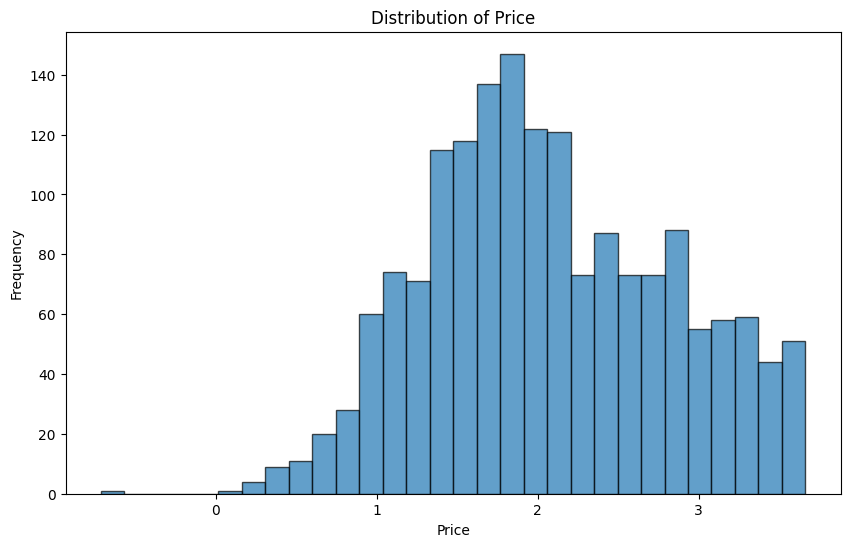

In [152]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(np.log(numerical_cols['Price']), bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

In [150]:
# Show statistics of the 'Price' column
price_stats = numerical_cols['Price'].describe()
print(price_stats)

count    1700.000000
mean       10.595870
std         8.582096
min         0.490000
25%         4.500000
50%         7.250000
75%        14.312500
max        39.000000
Name: Price, dtype: float64


In [153]:
import numpy as np

import statsmodels.api as sm

# Transform the dependent variable to log(Price)
y_log = np.log(y)

# Fit the linear regression model
model_log = sm.OLS(y_log, X_combined_engine_power_torque).fit()

# Show the model results
print(model_log.summary())

# Get the p-values
p_values_log = model_log.pvalues
print("P-values:\n", p_values_log)

# Get the R-squared and adjusted R-squared values
r_squared_log = model_log.rsquared
adjusted_r_squared_log = model_log.rsquared_adj
print("R-squared:", r_squared_log)
print("Adjusted R-squared:", adjusted_r_squared_log)

# Calculate and print the mean squared error (MSE)
y_log_pred = model_log.predict(X_combined_engine_power_torque)
mse_log = mean_squared_error(y_log, y_log_pred)
print("Mean Squared Error:", mse_log)

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              830.9
Date:                Sun, 10 Nov 2024   Prob (F-statistic):                        0.00
Time:                        02:15:01   Log-Likelihood:                         -383.04
No. Observations:                1700   AIC:                                      966.1
Df Residuals:                    1600   BIC:                                      1510.
Df Model:                         100                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------